In [ ]:
import os
import json
import time
import datetime
import numpy as np
import pandas as pd
import openai
import scipy.optimize as sco
from typing import List, Dict, Tuple
from concurrent.futures import ThreadPoolExecutor, as_completed

# Replace with your actual OpenAI API key
openai.api_key = os.environ.get("OPENAI_API_KEY")

# -----------------------------------------------------------------------------
# 1. Analyst Agents
# -----------------------------------------------------------------------------

# class AnalystAgent:
#     """
#     Base class for analyst agents.
#     """
#     def __init__(self, name: str, description: str):
#         self.name = name
#         self.description = description

#     def analyze(self, data: any) -> str:
#         """
#         Analyzes the given data and returns insights.
#         This method should be overridden by subclasses.
#         """
#         raise NotImplementedError("Subclasses must implement the analyze method")

# class NewsSentimentAnalyst(AnalystAgent):
#     """
#     Analyzes news articles and extracts sentiment.
#     """
#     def __init__(self):
#         super().__init__(name="NewsSentimentAnalyst",
#                          description="Extracts sentiment from news articles.")

#     def analyze(self, news_article: str) -> str:
#         """
#         Analyzes the news article and returns the sentiment.
#         """
#         try:
#             response = openai.Completion.create(
#                 engine="text-davinci-003",
#                 prompt=f"What is the sentiment of this news article? Positive, negative, or neutral?\n\n{news_article}\n\Sentiment:",
#                 max_tokens=50,
#                 n=1,
#                 stop=None,
#                 temperature=0.2,
#             )
#             sentiment = response.choices[0].text.strip()
#             return f"News sentiment: {sentiment}"
#         except Exception as e:
#             print(f"Error analyzing news sentiment: {e}")
#             return "News sentiment analysis failed."


# class FinancialReportAnalyst(AnalystAgent):
#     """
#     Analyzes financial reports and extracts key insights.
#     """
#     def __init__(self):
#         super().__init__(name="FinancialReportAnalyst",
#                          description="Extracts insights from financial reports.")

#     def analyze(self, financial_report: str) -> str:
#         """
#         Analyzes the financial report and returns key insights.
#         """
#         try:
#             response = openai.Completion.create(
#                 engine="text-davinci-003",
#                 prompt=f"Extract key insights from the following financial report:\n\n{financial_report}\n\nInsights:",
#                 max_tokens=150,
#                 n=1,
#                 stop=None,
#                 temperature=0.3,
#             )
#             insights = response.choices[0].text.strip()
#             return f"Financial report insights: {insights}"
#         except Exception as e:
#             print(f"Error analyzing financial report: {e}")
#             return "Financial report analysis failed."


class EarningsCallAnalyst(AnalystAgent):
    """
    Analyzes earnings call transcripts and extracts investment signals.
    """
    def __init__(self):
        super().__init__(name="EarningsCallAnalyst",
                         description="Interprets investment signals from earnings call recordings.")

    def analyze(self, earnings_call_transcript: str) -> str:
        """
        Analyzes the earnings call transcript and returns investment signals.
        """
        try:
            response = openai.Completion.create(
                engine="text-davinci-003",
                prompt=f"Identify potential investment signals (positive or negative) from the following earnings call transcript:\n\n{earnings_call_transcript}\n\nInvestment Signals:",
                max_tokens=100,
                n=1,
                stop=None,
                temperature=0.3,
            )
            signals = response.choices[0].text.strip()
            return f"Earnings call signals: {signals}"
        except Exception as e:
            print(f"Error analyzing earnings call: {e}")
            return "Earnings call analysis failed."


# class DataAnalysisAnalyst(AnalystAgent):
#     """
#     Computes financial metrics from tabular time series data.
#     """
#     def __init__(self):
#         super().__init__(name="DataAnalysisAnalyst",
#                          description="Computes financial metrics from tabular time series data.")

#     def analyze(self, time_series_data: pd.DataFrame) -> str:
#         """
#         Computes momentum and CVaR from the time series data.
#         """
#         try:
#             # Calculate momentum (example: 3-month momentum)
#             momentum = time_series_data['Close'].iloc[-1] / time_series_data['Close'].iloc[-60] - 1  # Roughly 3 months

#             # Calculate CVaR (Conditional Value at Risk)
#             returns = time_series_data['Close'].pct_change().dropna()
#             cvar = self.calculate_cvar(returns, alpha=0.05)

#             return f"Momentum: {momentum:.4f}, CVaR (95%): {cvar:.4f}"
#         except Exception as e:
#             print(f"Error analyzing time series data: {e}")
#             return "Data analysis failed."

#     def calculate_cvar(self, returns: pd.Series, alpha: float = 0.05) -> float:
#         """
#         Calculates the Conditional Value at Risk (CVaR).
#         """
#         var = np.percentile(returns, alpha * 100)
#         cvar = returns[returns <= var].mean()
#         return cvar


# class StockSelectionAnalyst(AnalystAgent):
#     """
#     Oversees portfolio selection and applies risk diversification methods.
#     """
#     def __init__(self):
#         super().__init__(name="StockSelectionAnalyst",
#                          description="Oversees portfolio selection using risk diversification methods.")

#     def analyze(self, stock_data: Dict[str, pd.DataFrame]) -> str:
#         """
#         Selects stocks for the portfolio based on risk diversification.
#         """
#         try:
#             # For simplicity, select top 3 stocks with lowest volatility
#             volatilities = {ticker: data['Close'].pct_change().std() for ticker, data in stock_data.items()}
#             sorted_stocks = sorted(volatilities.items(), key=lambda x: x[1])
#             selected_stocks = [ticker for ticker, _ in sorted_stocks[:3]]

#             return f"Selected stocks: {', '.join(selected_stocks)}"
#         except Exception as e:
#             print(f"Error selecting stocks: {e}")
#             return "Stock selection failed."

# # -----------------------------------------------------------------------------
# # 2. Manager Agent
# # -----------------------------------------------------------------------------

# class ManagerAgent:
#     """
#     The manager agent responsible for making trading decisions.
#     """
#     def __init__(self):
#         self.analysts = {
#             "news": NewsSentimentAnalyst(),
#             "financial_report": FinancialReportAnalyst(),
#             "earnings_call": EarningsCallAnalyst(),
#             "data_analysis": DataAnalysisAnalyst(),
#             "stock_selection": StockSelectionAnalyst()
#         }
#         self.investment_beliefs = {}  # Store beliefs about information sources


#     def consolidate_insights(self, insights: List[str]) -> str:
#         """
#         Consolidates insights from multiple analyst agents.
#         """
#         return "\n".join(insights)

#     def make_trading_decision(self, consolidated_insights: str, risk_alerts: str = "") -> str:
#         """
#         Makes a trading decision based on consolidated insights and risk alerts.
#         """
#         prompt = f"Based on the following insights and risk alerts, what trading decision should be made (buy, sell, or hold)?\n\nInsights:\n{consolidated_insights}\n\nRisk Alerts:\n{risk_alerts}\n\nDecision:"

#         try:
#             response = openai.Completion.create(
#                 engine="text-davinci-003",
#                 prompt=prompt,
#                 max_tokens=50,
#                 n=1,
#                 stop=None,
#                 temperature=0.4,
#             )
#             decision = response.choices[0].text.strip()
#             return decision
#         except Exception as e:
#             print(f"Error making trading decision: {e}")
#             return "Unable to make trading decision."

#     def calculate_portfolio_weights(self, expected_returns: pd.Series, covariance_matrix: pd.DataFrame, trading_decisions: Dict[str, str]) -> np.ndarray:
#         """
#         Calculates portfolio weights using mean-variance optimization.
#         """
#         num_assets = len(expected_returns)

#         def objective_function(weights, expected_returns, covariance_matrix):
#             portfolio_return = np.sum(expected_returns * weights)
#             portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
#             # Sharpe ratio with a negative sign (we want to minimize the negative Sharpe ratio)
#             return -portfolio_return / portfolio_volatility

#         # Initial weights (equal allocation)
#         initial_weights = np.array([1/num_assets] * num_assets)

#         # Constraints based on trading decisions
#         constraints = []
#         bounds = []

#         for i, ticker in enumerate(expected_returns.index):
#             decision = trading_decisions.get(ticker, "hold").lower()

#             if decision == "buy":
#                 bounds.append((0, 1))  # Weight between 0 and 1
#             elif decision == "sell":
#                 bounds.append((-1, 0)) # Weight between -1 and 0 (short selling)
#             else:  # hold
#                 bounds.append((0, 0))  # Weight must be 0

#             # Constraint: Sum of weights must be 1 (or close to 1) for buy/sell
#             constraints.append({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

#         # Optimization
#         options = {'maxiter': 1000}
#         result = sco.minimize(objective_function, initial_weights, args=(expected_returns, covariance_matrix),
#                                 method='SLSQP', bounds=bounds, constraints=constraints, options=options)

#         if result.success:
#             return result.x
#         else:
#             print("Optimization failed:", result.message)
#             return initial_weights  # Return initial weights if optimization fails


#     def refine_investment_beliefs(self, outcome: float, insights: List[str], decision: str):
#         """
#         Refines investment beliefs based on the outcome of the trading decision.
#         """
#         for insight in insights:
#             if insight not in self.investment_beliefs:
#                 self.investment_beliefs[insight] = {"correct": 0, "incorrect": 0}

#             if (outcome > 0 and decision == "buy") or (outcome < 0 and decision == "sell"):
#                 self.investment_beliefs[insight]["correct"] += 1
#             else:
#                 self.investment_beliefs[insight]["incorrect"] += 1

#     def self_reflect(self, previous_decisions: List[Tuple[str, str, float]]) -> str:
#         """
#         Conducts self-reflection by reviewing reasoning outcomes from previous trading actions.
#         """
#         reflection = "Reviewing previous trading decisions:\n"
#         for i, (insights, decision, outcome) in enumerate(previous_decisions):
#             reflection += f"Decision {i + 1}: Insights - {insights}, Decision - {decision}, Outcome - {outcome}\n"
#             if (outcome > 0 and decision == "buy") or (outcome < 0 and decision == "sell"):
#                 reflection += "This was a good decision.\n"
#             else:
#                 reflection += "This was a bad decision.\n"
#         return reflection

# -----------------------------------------------------------------------------
# 3. Risk Control Component
# -----------------------------------------------------------------------------

class RiskControlComponent:
    """
    Manages risk at two levels: within-episode and over-episode.
    """
    def __init__(self):
        self.investment_beliefs = {}  # Store beliefs about information sources

    def detect_market_risk(self, portfolio_returns: pd.Series, cvar_threshold: float = -0.02) -> str:
        """
        Detects market risk within a single episode using CVaR.
        """
        cvar = self.calculate_cvar(portfolio_returns)
        if cvar < cvar_threshold:
            return f"High market risk detected (CVaR = {cvar:.4f}). Consider reducing exposure."
        else:
            return "Market risk is within acceptable limits."

    def calculate_cvar(self, returns: pd.Series, alpha: float = 0.05) -> float:
        """
        Calculates the Conditional Value at Risk (CVaR).
        """
        var = np.percentile(returns, alpha * 100)
        cvar = returns[returns <= var].mean()
        return cvar

    def update_investment_beliefs(self, outcome: float, insights: List[str], decision: str):
        """
        Updates investment beliefs based on reasoning trajectories and PnL trends.
        """
        for insight in insights:
            if insight not in self.investment_beliefs:
                self.investment_beliefs[insight] = {"correct": 0, "incorrect": 0}

            if (outcome > 0 and decision == "buy") or (outcome < 0 and decision == "sell"):
                self.investment_beliefs[insight]["correct"] += 1
            else:
                self.investment_beliefs[insight]["incorrect"] += 1

    def provide_prompt_optimization_guidance(self) -> str:
        """
        Provides prompt optimization guidance based on updated investment beliefs.
        """
        if not self.investment_beliefs:
            return "No investment beliefs to provide guidance."

        guidance = "Based on recent performance, consider the following:\n"
        for insight, counts in self.investment_beliefs.items():
            correct_ratio = counts["correct"] / (counts["correct"] + counts["incorrect"] + 1e-9)
            if correct_ratio > 0.7:
                guidance += f"- Emphasize insights from '{insight}' as they have been reliable.\n"
            elif correct_ratio < 0.3:
                guidance += f"- De-emphasize insights from '{insight}' as they have been unreliable.\n"
        return guidance


# -----------------------------------------------------------------------------
# 4. Main Execution
# -----------------------------------------------------------------------------

def simulate_trading(manager: ManagerAgent, risk_control: RiskControlComponent, historical_data: Dict[str, pd.DataFrame], news_articles: Dict[str, List[str]], financial_reports: Dict[str, List[str]], earnings_call_transcripts: Dict[str, List[str]], num_episodes: int = 10) -> None:
    """
    Simulates the trading process over a series of episodes.
    """
    previous_decisions = []
    all_portfolio_returns = pd.Series()

    for episode in range(num_episodes):
        print(f"Starting Episode {episode + 1}/{num_episodes}")

        # Simulate a trading day (using the last day of available data for simplicity)
        trading_day = historical_data[list(historical_data.keys())[0]].index[-1]
        print(f"Trading Day: {trading_day}")

        # 1. Analyst Insights
        insights = []
        trading_decisions = {}

        # --- News Analysis ---
        for ticker, articles in news_articles.items():
            if articles:
                news_analysis = manager.analysts["news"].analyze(articles[-1])  # Analyze the latest article
                insights.append(f"{ticker} - {news_analysis}")

        # --- Financial Report Analysis ---
        for ticker, reports in financial_reports.items():
            if reports:
                report_analysis = manager.analysts["financial_report"].analyze(reports[-1])  # Analyze the latest report
                insights.append(f"{ticker} - {report_analysis}")

        # --- Earnings Call Analysis ---
        for ticker, transcripts in earnings_call_transcripts.items():
            if transcripts:
                earnings_analysis = manager.analysts["earnings_call"].analyze(transcripts[-1])  # Analyze the latest transcript
                insights.append(f"{ticker} - {earnings_analysis}")

        # --- Data Analysis ---
        stock_data_subset = {ticker: data.loc[:trading_day] for ticker, data in historical_data.items()}
        data_analysis = manager.analysts["data_analysis"].analyze(stock_data_subset[list(stock_data_subset.keys())[0]])
        insights.append(data_analysis)

        # --- Stock Selection ---
        stock_selection = manager.analysts["stock_selection"].analyze(stock_data_subset)
        insights.append(stock_selection)

        # 2. Manager Consolidates Insights
        consolidated_insights = manager.consolidate_insights(insights)
        print("Consolidated Insights:")
        print(consolidated_insights)

        # 3. Risk Assessment and Prompt Optimization
        prompt_guidance = risk_control.provide_prompt_optimization_guidance()
        print("Prompt Optimization Guidance:")
        print(prompt_guidance)

        # 4. Make Trading Decisions for each stock
        trading_decisions = {}
        for ticker in historical_data.keys():
            decision = manager.make_trading_decision(consolidated_insights, prompt_guidance)
            trading_decisions[ticker] = decision
            print(f"Trading Decision for {ticker}: {decision}")

        # 5. Portfolio Weight Calculation (using dummy expected returns and covariance matrix)
        expected_returns = pd.Series({ticker: 0.001 for ticker in historical_data.keys()})  # Example
        covariance_matrix = pd.DataFrame(np.eye(len(historical_data)), index=expected_returns.index, columns=expected_returns.index)  # Example

        portfolio_weights = manager.calculate_portfolio_weights(expected_returns, covariance_matrix, trading_decisions)
        print("Portfolio Weights:", portfolio_weights)

        # 6. Simulate Outcome (using random returns for simplicity)
        daily_returns = pd.Series(np.random.normal(0, 0.01, len(historical_data)), index=historical_data.keys())  # Example
        portfolio_return = np.sum(portfolio_weights * daily_returns)
        print("Portfolio Return:", portfolio_return)

        # 7. Update Risk Control and Investment Beliefs
        all_portfolio_returns = pd.concat([all_portfolio_returns, pd.Series(portfolio_return, index=[trading_day])])
        market_risk_alert = risk_control.detect_market_risk(all_portfolio_returns)
        print("Market Risk Alert:", market_risk_alert)

        risk_control.update_investment_beliefs(portfolio_return, insights, decision)

        # 8. Self-Reflection
        reflection = manager.self_reflect(previous_decisions)
        print("Self-Reflection:")
        print(reflection)

        # Store decision and outcome for future self-reflection
        previous_decisions.append((consolidated_insights, decision, portfolio_return))

        print(f"Ending Episode {episode + 1}/{num_episodes}\n")

# -----------------------------------------------------------------------------
# 5. Data Loading and Preparation
# -----------------------------------------------------------------------------

def load_sample_data(tickers: List[str]) -> Dict[str, pd.DataFrame]:
    """
    Loads sample historical data for the given tickers.
    For demonstration purposes, this function generates synthetic data.
    In a real application, you would load data from a reliable source.
    """
    historical_data = {}
    for ticker in tickers:
        # Generate a date range for the last 100 days
        end_date = datetime.datetime.now()
        start_date = end_date - datetime.timedelta(days=100)
        dates = pd.date_range(start_date, end_date)

        # Generate random closing prices
        prices = np.random.rand(len(dates)) * 100

        # Create a DataFrame
        df = pd.DataFrame({'Close': prices}, index=dates)
        historical_data[ticker] = df
    return historical_data

def generate_sample_news(tickers: List[str]) -> Dict[str, List[str]]:
    """
    Generates sample news articles for the given tickers.
    """
    news_articles = {}
    for ticker in tickers:
        news_articles[ticker] = [f"Positive news about {ticker}: Stock price surged!",
                                 f"Analyst upgrades {ticker}, citing strong growth potential."]
    return news_articles

def generate_sample_reports(tickers: List[str]) -> Dict[str, List[str]]:
    """
    Generates sample financial reports for the given tickers.
    """
    financial_reports = {}
    for ticker in tickers:
        financial_reports[ticker] = [f"{ticker} reports strong earnings, exceeding expectations.",
                                      f"{ticker}'s annual report shows increased revenue and profit."]
    return financial_reports

def generate_sample_earnings_calls(tickers: List[str]) -> Dict[str, List[str]]:
    """
    Generates sample earnings call transcripts for the given tickers.
    """
    earnings_call_transcripts = {}
    for ticker in tickers:
        earnings_call_transcripts[ticker] = [f"[Transcript] {ticker}'s CEO expresses confidence in future growth.",
                                             f"[Transcript] Analysts question {ticker}'s CFO about rising costs."]
    return earnings_call_transcripts

# -----------------------------------------------------------------------------
# 6. Initialization and Execution
# -----------------------------------------------------------------------------

if __name__ == "__main__":
    # Define the tickers
    tickers = ["AAPL", "GOOG", "MSFT"]

    # Load sample data
    historical_data = load_sample_data(tickers)
    news_articles = generate_sample_news(tickers)
    financial_reports = generate_sample_reports(tickers)
    earnings_call_transcripts = generate_sample_earnings_calls(tickers)

    # Initialize the agents and components
    manager = ManagerAgent()
    risk_control = RiskControlComponent()

    # Run the simulation
    simulate_trading(manager, risk_control, historical_data, news_articles, financial_reports, earnings_call_transcripts)


Starting Episode 1/10
Trading Day: 2025-04-20 18:27:18.617710
Error analyzing news sentiment: 

You tried to access openai.Completion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742

Error analyzing news sentiment: 

You tried to access openai.Completion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https

<ipython-input-18-4fb19284be02>:231: RuntimeWarning: invalid value encountered in scalar divide
  return -portfolio_return / portfolio_volatility
<ipython-input-18-4fb19284be02>:429: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  all_portfolio_returns = pd.concat([all_portfolio_returns, pd.Series(portfolio_return, index=[trading_day])])
<ipython-input-18-4fb19284be02>:231: RuntimeWarning: invalid value encountered in scalar divide
  return -portfolio_return / portfolio_volatility
<ipython-input-18-4fb19284be02>:231: RuntimeWarning: invalid value encountered in scalar divide
  return -portfolio_return / portfolio_volatility
<ipython-input-18-4fb19284be02>:231: RuntimeWarning: invalid value encountered in scalar divide
  return -portfolio_return / portfolio_volatility
<ipy

In [ ]:
import yfinance as yf
import pandas as pd

# Get data for Apple (AAPL)
ticker = "AAPL"
data = yf.download(ticker, start="2024-01-01", end="2024-04-20")

# Print the data
print(data.head())

# Save to CSV
data.to_csv("AAPL_data.csv")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  184.532089  187.315382  182.792533  186.033072  82488700
2024-01-03  183.150391  184.770668  182.335277  183.120571  58414500
2024-01-04  180.824356  181.997307  179.800504  181.062914  71983600
2024-01-05  180.098709  181.669281  179.094742  180.903888  62303300
2024-01-08  184.452560  184.492330  180.416793  181.003268  59144500


# Load data

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import openai

# Replace with your actual OpenAI API key
openai.api_key = os.environ.get("OPENAI_API_KEY")

In [ ]:
# Эта функция использует библиотеку yfinance для загрузки исторических данных о ценах акций из Yahoo Finance.

def get_stock_data(ticker: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Gets historical stock data from Yahoo Finance.
    """
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        return data
    except Exception as e:
        print(f"Error getting stock data for {ticker}: {e}")
        return None



In [ ]:
ticker = "AAPL"

get_stock_data(ticker, "2024-01-01", "2024-04-20")

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.532089,187.315382,182.792533,186.033072,82488700
2024-01-03,183.150391,184.770668,182.335277,183.120571,58414500
2024-01-04,180.824356,181.997307,179.800504,181.062914,71983600
2024-01-05,180.098709,181.669281,179.094742,180.903888,62303300
2024-01-08,184.452560,184.492330,180.416793,181.003268,59144500
...,...,...,...,...,...
2024-04-15,171.878418,175.799904,171.689308,174.535868,73531800
2024-04-16,168.583984,172.943390,167.479200,170.942841,73711200


????

In [ ]:
# Эта функция использует News API для получения последних новостей о конкретной акции. Вам нужно получить API ключ из News API.

def get_financial_news(ticker: str, api_key: str) -> list:
    """
    Gets financial news articles from News API.
    """
    url = f"https://newsapi.org/v2/everything?q={ticker}&sortBy=relevancy&apiKey={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes
        data = response.json()
        articles = [article['content'] for article in data['articles'] if article['content']]  # Extract content
        return articles
    except requests.exceptions.RequestException as e:
        print(f"Error getting news for {ticker}: {e}")
        return []
    except KeyError:
        print(f"Error parsing news data for {ticker}: Invalid response format")
        return []

In [ ]:
ticker = "AAPL"

get_financial_news(ticker, "fb63178174ab47459a26782d7f798d0e")

['Apple opened trading on Monday, April 14, 2025, at its highest price since President Donald Trump first announced tariffs — despite White House officials warning that exemptions are temporary.\r\nAfter… [+2038 chars]',
 'Apple is a US-based company that relies heavily on a global supply chain to manufacture its products. As a result, the tech firms stock seems to be getting hit especially hard by the new tariffs just… [+1633 chars]',
 "After a brief respite on Wednesday, Apple's stock restarted its downward trajectory triggered by President Trump's accelerating tariff battle with China. \r\nOn Wednesday, Apple ended the day at $198.8… [+2672 chars]",
 'Apple Stores could be rather empty if this actually happened ...\r\nThe Trump administration yesterday announced punishing import tariffs on a long list of countries, including all of Apple’s key manuf… [+3155 chars]',
 'Two Microsoft employees have been fired after publicly protesting the companys contracts with the Israeli military.\

In [ ]:
# def get_alpaca_news(ticker: str, alpaca_api_key: str, alpaca_secret_key: str, start_date: str, end_date: str) -> list:
def get_alpaca_news(ticker: str, alpaca_api_key: str, start_date: str, end_date: str) -> list:
    """
    Gets news articles from the Alpaca News API.
    """
    url = "https://data.alpaca.markets/v1beta1/news"
    headers = {
        "APCA-API-KEY-ID": alpaca_api_key,
        # "APCA-API-SECRET-KEY": alpaca_secret_key
    }
    params = {
        "symbols": ticker,
        "start": start_date,
        "end": end_date
    }

    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()
        news_data = response.json()
        articles = [article['headline'] + " " + article['summary'] for article in news_data['news']]
        return articles
    except requests.exceptions.RequestException as e:
        print(f"Error getting Alpaca news for {ticker}: {e}")
        return []
    except (KeyError, TypeError) as e:
        print(f"Error parsing Alpaca news data for {ticker}: {e}")
        return []


In [ ]:
ticker = "AAPL"

get_alpaca_news(ticker, "fb63178174ab47459a26782d7f798d0e", "2024-01-01", "2024-04-20")

Error getting Alpaca news for AAPL: 403 Client Error: Forbidden for url: https://data.alpaca.markets/v1beta1/news?symbols=AAPL&start=2024-01-01&end=2024-04-20


[]

In [ ]:
# Эта функция пытается извлечь транскрипты earnings call с веб-сайта (Seeking Alpha). Web scraping может быть сложным, поскольку структура веб-сайтов может меняться.

def get_earnings_call_transcript(ticker: str) -> str:
    """
    Scrapes earnings call transcripts from a website (example: Seeking Alpha).
    This is a simplified example and might need adjustments based on the website structure.
    """
    url = f"https://seekingalpha.com/symbol/{ticker}/earnings/transcripts"  # Example URL structure
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Example: Find the transcript content (adjust based on actual HTML structure)
        transcript_div = soup.find('div', class_='article-body')  # Replace with actual class
        if transcript_div:
            transcript = transcript_div.get_text(separator='\n', strip=True)
            return transcript
        else:
            return "Transcript not found on the page."

    except requests.exceptions.RequestException as e:
        print(f"Error getting earnings call transcript for {ticker}: {e}")
        return "Error fetching transcript."
    except Exception as e:
        print(f"Error processing earnings call transcript for {ticker}: {e}")
        return "Error processing transcript."

In [ ]:
ticker = "AAPL"

get_earnings_call_transcript(ticker)

Error getting earnings call transcript for AAPL: 403 Client Error: Forbidden for url: https://seekingalpha.com/symbol/AAPL/earnings/transcripts


'Error fetching transcript.'

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

def get_financial_report(ticker: str, filing_type: str = '10-K', year: int = 2023, quarter: int = None) -> str:
    """
    Scrapes financial reports from SEC EDGAR database.
    """
    # 1. Construct the EDGAR search URL
    base_url = "https://www.sec.gov/cgi-bin/browse-edgar"
    params = {
        'action': 'getcompany',
        'CIK': ticker,
        'type': filing_type,
        'dateb': f'{year}1231',  # End date for the search
        'owner': 'exclude',
        'count': '100',  # Number of filings to retrieve
    }

    try:
        # 2. Fetch the search results page
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # 3. Find the filing link
        table = soup.find('table', class_='tableFile2')
        if not table:
            return "No filings found for the given criteria."

        rows = table.find_all('tr')
        if len(rows) <= 1:
            return "No filings found in the table."

        # Assuming the first filing is the one we want
        filing_link = rows[1].find_all('td')[2].find('a')['href']
        full_filing_url = f"https://www.sec.gov{filing_link}"

        # 4. Fetch the filing document page
        filing_response = requests.get(full_filing_url)
        filing_response.raise_for_status()
        filing_soup = BeautifulSoup(filing_response.content, 'html.parser')

        # 5. Find the primary document link (the actual 10-K/10-Q)
        document_table = filing_soup.find('table', class_='tableFile')
        if not document_table:
            return "Could not find document table in filing page."

        document_rows = document_table.find_all('tr')
        if len(document_rows) <= 1:
            return "No documents found in the document table."

        # Find the row with the "Document" type
        document_link = None
        for row in document_rows:
            cells = row.find_all('td')
            if len(cells) > 3 and cells[3].text.strip() == 'Document':
                document_link = cells[2].find('a')['href']
                break

        if not document_link:
            return "No primary document found in the filing."

        full_document_url = f"https://www.sec.gov{document_link}"

        # 6. Fetch the document content
        document_response = requests.get(full_document_url)
        document_response.raise_for_status()
        document_content = document_response.content

        # Try different encodings to decode the content
        for encoding in ['utf-8', 'latin-1', 'ascii', 'cp1252']:
            try:
                document_text = document_content.decode(encoding, errors='replace')
                break
            except UnicodeDecodeError:
                continue  # Try the next encoding
        else:
            return "Unable to decode document content with common encodings."

        # 7. Extract text from HTML (crude, needs improvement)
        document_soup = BeautifulSoup(document_text, 'html.parser')

        # Remove script and style elements
        for script in document_soup(["script", "style"]):
            script.extract()

        # get text
        text = document_soup.get_text()

        # break into line
        lines = (line.strip() for line in text.splitlines())
        # break multi-headlines into a line each
        chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
        # drop blank lines
        text = '\n'.join(chunk for chunk in chunks if chunk)

        return text[:10000]  # Return the first 10000 characters


    except requests.exceptions.RequestException as e:
        print(f"Error during request: {e}")
        return f"Error fetching data from SEC EDGAR: {e}"
    except Exception as e:
        print(f"Error processing the data: {e}")
        return f"Error processing SEC filing: {e}"



test

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import openai

# Replace with your actual OpenAI API key
openai.api_key = os.environ.get("OPENAI_API_KEY")

# -----------------------------------------------------------------------------
# 1. Data Sources
# -----------------------------------------------------------------------------

def get_stock_data(ticker: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Gets historical stock data from Yahoo Finance.
    """
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        return data
    except Exception as e:
        print(f"Error getting stock data for {ticker}: {e}")
        return None

def get_financial_news(ticker: str, api_key: str) -> list:
    """
    Gets financial news articles from News API.
    """
    url = f"https://newsapi.org/v2/everything?q={ticker}&sortBy=relevancy&apiKey={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes
        data = response.json()
        articles = [article['content'] for article in data['articles'] if article['content']]  # Extract content
        return articles
    except requests.exceptions.RequestException as e:
        print(f"Error getting news for {ticker}: {e}")
        return []
    except KeyError:
        print(f"Error parsing news data for {ticker}: Invalid response format")
        return []

def get_earnings_call_transcript(ticker: str) -> str:
    """
    Scrapes earnings call transcripts from a website (example: Seeking Alpha).
    This is a simplified example and might need adjustments based on the website structure.
    """
    url = f"https://seekingalpha.com/symbol/{ticker}/earnings/transcripts"  # Example URL structure
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Example: Find the transcript content (adjust based on actual HTML structure)
        transcript_div = soup.find('div', class_='article-body')  # Replace with actual class
        if transcript_div:
            transcript = transcript_div.get_text(separator='\n', strip=True)
            return transcript
        else:
            return "Transcript not found on the page."

    except requests.exceptions.RequestException as e:
        print(f"Error getting earnings call transcript for {ticker}: {e}")
        return "Error fetching transcript."
    except Exception as e:
        print(f"Error processing earnings call transcript for {ticker}: {e}")
        return "Error processing transcript."

def get_financial_report(ticker: str, filing_type: str = '10-K', year: int = 2023, quarter: int = None) -> str:
    """
    Scrapes financial reports from SEC EDGAR database.
    """
    # 1. Construct the EDGAR search URL
    base_url = "https://www.sec.gov/cgi-bin/browse-edgar"
    params = {
        'action': 'getcompany',
        'CIK': ticker,
        'type': filing_type,
        'dateb': f'{year}1231',  # End date for the search
        'owner': 'exclude',
        'count': '100',  # Number of filings to retrieve
    }

    try:
        # 2. Fetch the search results page
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # 3. Find the filing link
        table = soup.find('table', class_='tableFile2')
        if not table:
            return "No filings found for the given criteria."

        rows = table.find_all('tr')
        if len(rows) <= 1:
            return "No filings found in the table."

        # Assuming the first filing is the one we want
        filing_link = rows[1].find_all('td')[2].find('a')['href']
        full_filing_url = f"https://www.sec.gov{filing_link}"

        # 4. Fetch the filing document page
        filing_response = requests.get(full_filing_url)
        filing_response.raise_for_status()
        filing_soup = BeautifulSoup(filing_response.content, 'html.parser')

        # 5. Find the primary document link (the actual 10-K/10-Q)
        document_table = filing_soup.find('table', class_='tableFile')
        if not document_table:
            return "Could not find document table in filing page."

        document_rows = document_table.find_all('tr')
        if len(document_rows) <= 1:
            return "No documents found in the document table."

        # Find the row with the "Document" type
        document_link = None
        for row in document_rows:
            cells = row.find_all('td')
            if len(cells) > 3 and cells[3].text.strip() == 'Document':
                document_link = cells[2].find('a')['href']
                break

        if not document_link:
            return "No primary document found in the filing."

        full_document_url = f"https://www.sec.gov{document_link}"

        # 6. Fetch the document content
        document_response = requests.get(full_document_url)
        document_response.raise_for_status()
        document_content = document_response.content

        # Try different encodings to decode the content
        for encoding in ['utf-8', 'latin-1', 'ascii', 'cp1252']:
            try:
                document_text = document_content.decode(encoding, errors='replace')
                break
            except UnicodeDecodeError:
                continue  # Try the next encoding
        else:
            return "Unable to decode document content with common encodings."

        # 7. Extract text from HTML (crude, needs improvement)
        document_soup = BeautifulSoup(document_text, 'html.parser')

        # Remove script and style elements
        for script in document_soup(["script", "style"]):
            script.extract()

        # get text
        text = document_soup.get_text()

        # break into line
        lines = (line.strip() for line in text.splitlines())
        # break multi-headlines into a line each
        chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
        # drop blank lines
        text = '\n'.join(chunk for chunk in chunks if chunk)

        return text[:10000]  # Return the first 10000 characters


    except requests.exceptions.RequestException as e:
        print(f"Error during request: {e}")
        return f"Error fetching data from SEC EDGAR: {e}"
    except Exception as e:
        print(f"Error processing the data: {e}")
        return f"Error processing SEC filing: {e}"

def get_alpaca_news(ticker: str, alpaca_api_key: str, alpaca_secret_key: str, start_date: str, end_date: str) -> list:
    """
    Gets news articles from the Alpaca News API.
    """
    url = "https://data.alpaca.markets/v1beta1/news"
    headers = {
        "APCA-API-KEY-ID": alpaca_api_key,
        "APCA-API-SECRET-KEY": alpaca_secret_key
    }
    params = {
        "symbols": ticker,
        "start": start_date,
        "end": end_date
    }

    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()
        news_data = response.json()
        articles = [article['headline'] + " " + article['summary'] for article in news_data['news']]
        return articles
    except requests.exceptions.RequestException as e:
        print(f"Error getting Alpaca news for {ticker}: {e}")
        return []
    except (KeyError, TypeError) as e:
        print(f"Error parsing Alpaca news data for {ticker}: {e}")
        return []


# -----------------------------------------------------------------------------
# 2. Main Execution
# -----------------------------------------------------------------------------

if __name__ == "__main__":
    # Define the ticker and date range
    ticker = "AAPL"
    start_date = "2024-01-01"
    end_date = "2024-04-20"

    # 1. Get stock data
    stock_data = get_stock_data(ticker, start_date, end_date)
    if stock_data is not None:
        print(f"Stock Data for {ticker}:\n", stock_data.head())

    # 2. Get financial news (replace with your News API key)
    news_api_key = "fb63178174ab47459a26782d7f798d0e"
    news_articles = get_financial_news(ticker, news_api_key)
    if news_articles:
        print(f"News Articles for {ticker}:\n", news_articles[:2])  # Print first 2 articles

    # 3. Get earnings call transcript
    transcript = get_earnings_call_transcript(ticker)
    print(f"Earnings Call Transcript for {ticker}:\n", transcript[:500])  # Print first 500 characters

    # 4. Get financial report
    financial_report = get_financial_report(ticker, filing_type='10-K', year=2023)
    print(f"Financial Report for {ticker}:\n", financial_report)

    # 5. Get Alpaca news (replace with your Alpaca API keys)
    alpaca_api_key = "fb63178174ab47459a26782d7f798d0e"
    alpaca_secret_key = "fb63178174ab47459a26782d7f798d0e"
    alpaca_news = get_alpaca_news(ticker, alpaca_api_key, alpaca_secret_key, start_date, end_date)
    if alpaca_news:
        print(f"Alpaca News for {ticker}:\n", alpaca_news[:2])



[*********************100%***********************]  1 of 1 completed


Stock Data for AAPL:
 Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  184.532089  187.315382  182.792533  186.033072  82488700
2024-01-03  183.150391  184.770668  182.335277  183.120571  58414500
2024-01-04  180.824356  181.997307  179.800504  181.062914  71983600
2024-01-05  180.098709  181.669281  179.094742  180.903888  62303300
2024-01-08  184.452560  184.492330  180.416793  181.003268  59144500
News Articles for AAPL:
 ['Apple opened trading on Monday, April 14, 2025, at its highest price since President Donald Trump first announced tariffs — despite White House officials warning that exemptions are temporary.\r\nAfter… [+2038 chars]', 'Apple is a US-based company that relies heavily on a global supply chain to manufacture its products. As a result, the tech firms stock seems to be getting hit especially hard by 

In [ ]:
stock_data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.532089,187.315382,182.792533,186.033072,82488700
2024-01-03,183.150391,184.770668,182.335277,183.120571,58414500
2024-01-04,180.824356,181.997307,179.800504,181.062914,71983600
2024-01-05,180.098709,181.669281,179.094742,180.903888,62303300
2024-01-08,184.452560,184.492330,180.416793,181.003268,59144500
...,...,...,...,...,...
2024-04-15,171.878418,175.799904,171.689308,174.535868,73531800
2024-04-16,168.583984,172.943390,167.479200,170.942841,73711200


# Data load

42 stocks:

META

PFE

JPM

TSLA

XOM

GS

BA

C

CVX

MRNA

GM

F

AAPL

ВАВА

MS

AAL

BAC

NVDA

JNJ

WMT

AMZN

DIS

MSFT

INTC

DAL

WFC

MRK

BLK

GOOG

UAL

UBER

BX

COIN

NFLX

NIO

BKR

T

AMD

LLY

OXY

LUV

LMT

historical_data = load_sample_data(tickers)

news_articles = generate_sample_news(tickers)

financial_reports = generate_sample_reports(tickers)

earnings_call_transcripts = generate_sample_earnings_calls(tickers)


In [ ]:
!pip install openai==0.28
!pip install edgartools

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import openai
import numpy as np
import httpx
import pandas as pd
from typing import List, Dict
import chardet
from edgar import *

class AnalystAgent:
    """
    Base class for analyst agents.
    """
    def __init__(self, name: str, description: str):
        self.name = name
        self.description = description

    def analyze(self, data: any) -> str:
        """
        Analyzes the given data and returns insights.
        This method should be overridden by subclasses.
        """
        raise NotImplementedError("Subclasses must implement the analyze method")


class StockSelectionAnalyst(AnalystAgent):
    """
    Oversees portfolio selection and applies risk diversification methods.
    """
    def __init__(self):
        super().__init__(name="StockSelectionAnalyst",
                         description="Oversees portfolio selection using risk diversification methods.")

    def analyze(self, stock_data: dict[str, pd.DataFrame]) -> str:
        """
        Selects stocks for the portfolio based on risk diversification.
        """
        try:
            # For simplicity, select top 5 stocks with lowest volatility
            volatilities = {ticker: float(data['Close'].pct_change().std().iloc[0]) for ticker, data in stock_data.items()}
            sorted_stocks = sorted(volatilities.items(), key=lambda x: x[1])
            selected_stocks = [ticker for ticker, _ in sorted_stocks[:5]]

            # For simplicity, select top 3 stocks with lowest volatility
            # volatilities = {ticker: data['Close'].pct_change().std() for ticker, data in stock_data.items()}
            # sorted_stocks = sorted(volatilities.items(), key=lambda x: x[1])
            # selected_stocks = [ticker for ticker, _ in sorted_stocks[:3]]

            # return f"Selected stocks: {', '.join(selected_stocks)}"
            return selected_stocks
        except Exception as e:
            print(f"Error selecting stocks: {e}")
            return "Stock selection failed."

class DataAnalysisAnalyst(AnalystAgent):
    """
    Computes financial metrics from tabular time series data.
    """
    def __init__(self):
        super().__init__(name="DataAnalysisAnalyst",
                         description="Computes financial metrics from tabular time series data.")

    def analyze(self, time_series_data: dict[str, pd.DataFrame]) -> dict:
        """
        Computes momentum and CVaR from the time series data.
        """
        try:
            momentum = {}
            # returns = {}
            cvar = {}
            time_series_data = stock_prices
            for ticker, data in time_series_data.items():
                if len(data['Close']) > 0:
                  momentum_one_ticker =  float(data['Close'].iloc[-1].iloc[0]) / float(data['Close'].iloc[-20].iloc[0]) - 1.0
                  momentum.update([(ticker, momentum_one_ticker)])

                  returns_one_ticker = data['Close'].pct_change().dropna()
                  cvar_one_ticker = float(calculate_cvar(returns_one_ticker, alpha=0.05).iloc[0])
                  cvar.update([(ticker, cvar_one_ticker)])

                elif len(data['Close']) == 0:
                  pass

            # Calculate momentum (example: 3-month momentum)
            # momentum = {ticker: (data['Close'].iloc[-1] / data['Close'].iloc[-60] - 1) for ticker, data in time_series_data.items()}
            # momentum = time_series_data['Close'].iloc[-1] / time_series_data['Close'].iloc[-60] - 1  # Roughly 3 months

            # Calculate CVaR (Conditional Value at Risk)

            # returns = time_series_data['Close'].pct_change().dropna()
            # cvar = self.calculate_cvar(returns, alpha=0.05)

            # return f"Momentum: {momentum:.4f}, CVaR (95%): {cvar:.4f}"
            return momentum, cvar

        except Exception as e:
            print(f"Error analyzing time series data: {e}")
            return "Data analysis failed."

    def calculate_cvar(self, returns: pd.Series, alpha: float = 0.05) -> float:
        """
        Calculates the Conditional Value at Risk (CVaR).
        """
        var = np.percentile(returns, alpha * 100)
        cvar = returns[returns <= var].mean()
        return cvar

class NewsSentimentAnalyst(AnalystAgent):
    """
    Analyzes news articles and extracts insights and sentiment.
    """
    def __init__(self):
        super().__init__(name="NewsSentimentAnalyst",
                         description="Extracts sentiment from news articles.")

    def analyze(self, news: dict[str, pd.DataFrame]) -> dict:
          """
          Analyzes the news article, extracts insights and sentiments from daily news
          and returns the insights and sentiment.
          """

          insights = {}
          sentiment = {}
          print(news.keys())

          for ticker, data in news.items():
            # print(ticker)
            insights_one_ticker = []
            sentiment_one_ticker = []
            for row_idx in range(data['content'].shape[0]):
            # for row_idx in range(5):
                news_article = data['content'].iloc[row_idx]

                response_insights = openai.Completion.create(
                    engine="gpt-3.5-turbo-instruct",
                    prompt=f"You are the investment analysts for news. Your responsibilities are to distill investment insights and other indicators like financial sentiment for {ticker}. Extract insights from this news article\n\n{news_article}\n",
                    max_tokens=50,
                    n=1,
                    stop=None,
                    temperature=0.2,
                )

                # chat = client.chat.completions.create(
                #     model="gpt-3.5-turbo",
                #     messages=[ {"role": "user", "content": f"You are the investment analysts for news. Your responsibilities are to distill investment insights and other indicators like financial sentiment for {ticker}. Extract insights from this news article\n\n{news_article}\n"} ]
                #     )

                insights_one_ticker_one_row = response_insights.choices[0].text.strip()
                insights_one_ticker.append(insights_one_ticker_one_row)

                response_sentiment = openai.Completion.create(
                    engine="gpt-3.5-turbo-instruct",
                    prompt=f"You are the investment analysts for news. Your responsibilities are to distill investment insights and other indicators like financial sentiment for {ticker}. What is the sentiment (positive, negative, or neutral) of this news article?\n\n{news_article}\n",
                    max_tokens=50,
                    n=1,
                    stop=None,
                    temperature=0.2,
                )
                sentiment_one_ticker_one_row = response_sentiment.choices[0].text.strip()
                sentiment_one_ticker.append(sentiment_one_ticker_one_row)

            insights_one_ticker = pd.DataFrame(insights_one_ticker)
            insights.update([(ticker, insights_one_ticker)])

            sentiment_one_ticker = pd.DataFrame(sentiment_one_ticker)
            sentiment.update([(ticker, sentiment_one_ticker)])

          return insights, sentiment


class FilingDataAnalyst(AnalystAgent):
    """
    Analyzes 10-K, 10-K Company Forms and extracts insights and sentiments from them.
    """
    def __init__(self):
        super().__init__(name="FilingDataAnalyst",
                         description="Extracts insights and sentiments from 10-Q, 10-K filing data.")

    def analyze(self, filing_data: str) -> str:
        """
        Analyzes 10-K, 10-K Company Forms and returns insights and sentiments from them.
        """


        insights = {}
        sentiment = {}

        for ticker, data in filing_data.items():
            # print(ticker)
            insights_one_ticker = []
            sentiment_one_ticker = []
            for row_idx in range(data['content'].shape[0]):
            # for row_idx in range(5):
                news_article = data['content'].iloc[row_idx]

                response_insights = openai.Completion.create(
                    engine="gpt-3.5-turbo-instruct",
                    prompt=f"You are the investment analysts for news. Your responsibilities are to distill investment insights and other indicators like financial sentiment for {ticker}. Extract insights from this news article\n\n{news_article}\n",
                    max_tokens=50,
                    n=1,
                    stop=None,
                    temperature=0.2,
                )

                # chat = client.chat.completions.create(
                #     model="gpt-3.5-turbo",
                #     messages=[ {"role": "user", "content": f"You are the investment analysts for news. Your responsibilities are to distill investment insights and other indicators like financial sentiment for {ticker}. Extract insights from this news article\n\n{news_article}\n"} ]
                #     )

                insights_one_ticker_one_row = response_insights.choices[0].text.strip()
                insights_one_ticker.append(insights_one_ticker_one_row)

                response_sentiment = openai.Completion.create(
                    engine="gpt-3.5-turbo-instruct",
                    prompt=f"You are the investment analysts for news. Your responsibilities are to distill investment insights and other indicators like financial sentiment for {ticker}. What is the sentiment (positive, negative, or neutral) of this news article?\n\n{news_article}\n",
                    max_tokens=50,
                    n=1,
                    stop=None,
                    temperature=0.2,
                )
                sentiment_one_ticker_one_row = response_sentiment.choices[0].text.strip()
                sentiment_one_ticker.append(sentiment_one_ticker_one_row)

            insights_one_ticker = pd.DataFrame(insights_one_ticker)
            insights.update([(ticker, insights_one_ticker)])

            sentiment_one_ticker = pd.DataFrame(sentiment_one_ticker)
            sentiment.update([(ticker, sentiment_one_ticker)])

        return insights, sentiment


        # try:
        #     response = openai.Completion.create(
        #         engine="text-davinci-003",
        #         prompt=f"Extract key insights from the following financial report:\n\n{financial_report}\n\nInsights:",
        #         max_tokens=150,
        #         n=1,
        #         stop=None,
        #         temperature=0.3,
        #     )
        #     insights = response.choices[0].text.strip()
        #     return f"Financial report insights: {insights}"
        # except Exception as e:
        #     print(f"Error analyzing financial report: {e}")
        #     return "Financial report analysis failed."

# class FinancialReportAnalyst(AnalystAgent):
#     """
#     Analyzes financial reports and extracts key insights.
#     """
#     def __init__(self):
#         super().__init__(name="FinancialReportAnalyst",
#                          description="Extracts insights from financial reports.")

#     def analyze(self, financial_report: str) -> str:
#         """
#         Analyzes the financial report and returns key insights.
#         """
#         try:
#             response = openai.Completion.create(
#                 engine="text-davinci-003",
#                 prompt=f"Extract key insights from the following financial report:\n\n{financial_report}\n\nInsights:",
#                 max_tokens=150,
#                 n=1,
#                 stop=None,
#                 temperature=0.3,
#             )
#             insights = response.choices[0].text.strip()
#             return f"Financial report insights: {insights}"
#         except Exception as e:
#             print(f"Error analyzing financial report: {e}")
#             return "Financial report analysis failed."


# -----------------------------------------------------------------------------
# 2. Manager Agent
# -----------------------------------------------------------------------------

class ManagerAgent:
    """
    The manager agent responsible for making trading decisions.
    """
    def __init__(self):
        self.analysts = {
            "data_analysis": DataAnalysisAnalyst(),
            "financial_news": NewsSentimentAnalyst(),
            "filing_data": FilingDataAnalyst(),
            # "financial_report": FinancialReportAnalyst(),
            # "earnings_call": EarningsCallAnalyst(),
            "stock_selection": StockSelectionAnalyst()
        }
        self.investment_beliefs = {}  # Store beliefs about information sources


    def consolidate_insights(self, insights: List[str]) -> str:
        """
        Consolidates insights from multiple analyst agents.
        """
        return "\n".join(insights)

    def make_trading_decision(self, consolidated_insights: str, risk_alerts: str = "") -> str:
        """
        Makes a trading decision based on consolidated insights and risk alerts.
        """
        prompt = f"Based on the following insights and risk alerts, what trading decision should be made (buy, sell, or hold)?\n\nInsights:\n{consolidated_insights}\n\nRisk Alerts:\n{risk_alerts}\n\nDecision:"

        try:
            response = openai.Completion.create(
                engine="text-davinci-003",
                prompt=prompt,
                max_tokens=50,
                n=1,
                stop=None,
                temperature=0.4,
            )
            decision = response.choices[0].text.strip()
            return decision
        except Exception as e:
            print(f"Error making trading decision: {e}")
            return "Unable to make trading decision."

    def calculate_portfolio_weights(self, expected_returns: pd.Series, covariance_matrix: pd.DataFrame, trading_decisions: Dict[str, str]) -> np.ndarray:
        """
        Calculates portfolio weights using mean-variance optimization.
        """
        num_assets = len(expected_returns)

        def objective_function(weights, expected_returns, covariance_matrix):
            portfolio_return = np.sum(expected_returns * weights)
            portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
            # Sharpe ratio with a negative sign (we want to minimize the negative Sharpe ratio)
            return -portfolio_return / portfolio_volatility

        # Initial weights (equal allocation)
        initial_weights = np.array([1/num_assets] * num_assets)

        # Constraints based on trading decisions
        constraints = []
        bounds = []

        for i, ticker in enumerate(expected_returns.index):
            decision = trading_decisions.get(ticker, "hold").lower()

            if decision == "buy":
                bounds.append((0, 1))  # Weight between 0 and 1
            elif decision == "sell":
                bounds.append((-1, 0)) # Weight between -1 and 0 (short selling)
            else:  # hold
                bounds.append((0, 0))  # Weight must be 0

            # Constraint: Sum of weights must be 1 (or close to 1) for buy/sell
            constraints.append({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

        # Optimization
        options = {'maxiter': 1000}
        result = sco.minimize(objective_function, initial_weights, args=(expected_returns, covariance_matrix),
                                method='SLSQP', bounds=bounds, constraints=constraints, options=options)

        if result.success:
            return result.x
        else:
            print("Optimization failed:", result.message)
            return initial_weights  # Return initial weights if optimization fails


    def refine_investment_beliefs(self, outcome: float, insights: List[str], decision: str):
        """
        Refines investment beliefs based on the outcome of the trading decision.
        """
        for insight in insights:
            if insight not in self.investment_beliefs:
                self.investment_beliefs[insight] = {"correct": 0, "incorrect": 0}

            if (outcome > 0 and decision == "buy") or (outcome < 0 and decision == "sell"):
                self.investment_beliefs[insight]["correct"] += 1
            else:
                self.investment_beliefs[insight]["incorrect"] += 1

    def self_reflect(self, previous_decisions: List[Tuple[str, str, float]]) -> str:
        """
        Conducts self-reflection by reviewing reasoning outcomes from previous trading actions.
        """
        reflection = "Reviewing previous trading decisions:\n"
        for i, (insights, decision, outcome) in enumerate(previous_decisions):
            reflection += f"Decision {i + 1}: Insights - {insights}, Decision - {decision}, Outcome - {outcome}\n"
            if (outcome > 0 and decision == "buy") or (outcome < 0 and decision == "sell"):
                reflection += "This was a good decision.\n"
            else:
                reflection += "This was a bad decision.\n"
        return reflection


# Эта функция использует библиотеку yfinance для загрузки исторических данных о ценах акций из Yahoo Finance.

def get_stock_data(tickers: list[str], start_date: str, end_date: str) -> dict[str, pd.DataFrame]:
    """
    Gets historical stock data from Yahoo Finance.
    """
    try:
        historical_data = {}
        for ticker in tickers:

          data = yf.download(ticker, start=start_date, end=end_date)
          historical_data[ticker] = data

        return historical_data
    except Exception as e:
        print(f"Error getting stock data for {ticker}: {e}")
        return None

# Эта функция использует News API для получения последних новостей о конкретной акции. Вам нужно получить API ключ из News API.

def get_financial_news(tickers: List[str], api_key: str, start_date: str, end_date: str) -> Dict[str, pd.DataFrame]:
    """
    Gets financial news articles from News API with automatic encoding detection.
    """
    news_data = {}

    for ticker in tickers:
        url = f"https://newsapi.org/v2/everything?q={ticker}&from={start_date}&to={end_date}&sortBy=publishedAt&apiKey={api_key}"

        try:
            response = requests.get(url)
            response.raise_for_status()

            # Detect encoding
            encoding = chardet.detect(response.content)['encoding']
            response.encoding = encoding if encoding else 'utf-8'

            articles = response.json().get('articles', [])

            df = pd.DataFrame([{
                'title': a.get('title', ''),
                'content': a.get('content', ''),
                'publishedAt': pd.to_datetime(a.get('publishedAt', '')),
                'source': a.get('source', {}).get('name', '')
            } for a in articles if a.get('content')])

            news_data[ticker] = df

        except requests.exceptions.RequestException as e:
            print(f"HTTP Error for {ticker}: {e}")
        except UnicodeDecodeError:
            print(f"Encoding error for {ticker}, trying fallback...")
            try:
                response.encoding = 'latin-1'
                articles = response.json().get('articles', [])
                # ... rest of processing ...
            except Exception as e:
                print(f"Fallback failed for {ticker}: {e}")
        except Exception as e:
            print(f"General error for {ticker}: {e}")

    return news_data

# Эта функция использует библиотеку edgartools для загрузки company form 10-Q, 10-K из SEC.

def get_filings_data(tickers: list[str], start_date: str, end_date: str) -> dict[str, pd.DataFrame]:
    """
    Gets 10-Q/ 10-K forms from SEC.
    """
    # 2. Tell the SEC who you are
    set_identity("mike@indigo.com")

    try:
        filing_data = {}
        for ticker in tickers:

          filings_10_q = Company(ticker).get_filings(form="10-Q", date=f"{start_date}:{end_date}")
          filings_10_k = Company(ticker).get_filings(form="10-K", date=f"{start_date}:{end_date}")

          filing_data[ticker] = {
                                  "10-K": pd.DataFrame(filings_10_k),
                                  "10-Q": pd.DataFrame(filings_10_q)
                                }

        return filing_data
    except Exception as e:
        print(f"Error getting stock data for {ticker}: {e}")
        return None

all_stocks = ["META", "PFE", "JPM", "TSLA", "XOM", "GS", "BA", "C", "CVX", "MRNA", "GM", "F", "AAPL", "ВАВА", "MS",
               "AAL", "BAC", "NVDA", "JNJ", "WMT", "AMZN", "DIS", "MSFT", "INTC", "DAL", "WFC", "MRK", "BLK", "GOOG",
               "UAL", "UBER", "BX", "COIN", "NFLX", "NIO", "BKR", "T", "AMD", "LLY", "OXY", "LUV", "LMT"]


# start_date = "2022-01-03"
# end_date = "2022-06-10"

start_date = "2025-03-22"
end_date = "2025-04-22"


news_api_key = "fb63178174ab47459a26782d7f798d0e"
# news_api_key = "0deba4bb75a443c18bcf6e97359e3f39"

openai.api_key = "sk-proj-ppMoAqZfoX35JduabVIST3BlbkFJEzhAS21mxB5wMemtX5N7"

# Yahoo Finance
stock_prices = get_stock_data(all_stocks, start_date, end_date)
# print(stock_prices)

# Alpaca News, Refinit Real-time news
# financial_news = get_financial_news(select_stocks, news_api_key, start_date, end_date)
# print(financial_news)

# Zacks Equity Research
# IR_reports =

# ECC
# ECC_audio_records =

# SEC
# company_form_10_Q =
# SEC API, EDGAR
# company_form_10_K =

# Agents

# 1) Stock selection agent (compute momentum and CVaR,
# oversees portfolio selection by applying the classic risk diversification method in quantitative finance) +

stock_selection_agent = StockSelectionAnalyst()
select_stocks_labels = stock_selection_agent.analyze(stock_prices)
print(f"Selected stocks: {select_stocks_labels}")

# News API (Alpaca News, Refinit Real-time news)
financial_news = get_financial_news(select_stocks_labels, news_api_key, start_date, end_date)
# print(financial_news)

# SEC
filing_data = get_filings_data(select_stocks_labels, start_date, end_date)

select_stocks = {}
for key in stock_prices.keys():
  if key in select_stocks_labels:
    select_stocks.update([(key, stock_prices[key])])

# 2) Data agent (compute momentum and CVaR)
data_agent = DataAnalysisAnalyst()
momentums, cvars = data_agent.analyze(select_stocks)
print(f"Momentums: {momentums},\n CVaRs (95%): {cvars}")

# 3) News agent (extract insights and sentiments from daily news)
news_agent = NewsSentimentAnalyst()
insights, sentiment = news_agent.analyze(financial_news)
print(f"Insights: {insights},\n Sentiments: {sentiment}")
# 4) 10-Q/ 10-K Filing agent extract insights and sentiments from forms)
# filing_agent =

# 5) Analyst reports agent (extract insights and sentiments from financial reports)

# 6) ECC agent (uses the Whisper API to interpret investment signals from earnings call recordings)


  Using cached edgartools-3.15.1-py3-none-any.whl.metadata (17 kB)
  Using cached rank_bm25-0.2.2-py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 9.0 MB/s eta 0:00:00


NameError: name 'Tuple' is not defined

In [ ]:
print(select_stocks)
print(financial_news.keys())
financial_news["LMT"]

NameError: name 'select_stocks' is not defined

In [ ]:
# # from openai import OpenAI

# class NewsSentimentAnalyst(AnalystAgent):
#     """
#     Analyzes news articles and extracts sentiment.
#     """
#     def __init__(self):
#         super().__init__(name="NewsSentimentAnalyst",
#                          description="Extracts sentiment from news articles.")

#     def analyze(self, news: dict[str, pd.DataFrame]) -> dict:
#           """
#           Analyzes the news article, extracts insights and sentiments from daily news
#           and returns the insights and sentiment.
#           """

#           insights = {}
#           sentiment = {}
#           print(news.keys())

#           for ticker, data in news.items():
#             # print(ticker)
#             insights_one_ticker = []
#             sentiment_one_ticker = []
#             for row_idx in range(data['content'].shape[0]):
#             # for row_idx in range(5):
#                 news_article = data['content'].iloc[row_idx]

#                 response_insights = openai.Completion.create(
#                     engine="gpt-3.5-turbo-instruct",
#                     prompt=f"You are the investment analysts for news. Your responsibilities are to distill investment insights and other indicators like financial sentiment for {ticker}. Extract insights from this news article\n\n{news_article}\n",
#                     max_tokens=50,
#                     n=1,
#                     stop=None,
#                     temperature=0.2,
#                 )

#                 # chat = client.chat.completions.create(
#                 #     model="gpt-3.5-turbo",
#                 #     messages=[ {"role": "user", "content": f"You are the investment analysts for news. Your responsibilities are to distill investment insights and other indicators like financial sentiment for {ticker}. Extract insights from this news article\n\n{news_article}\n"} ]
#                 #     )

#                 insights_one_ticker_one_row = response_insights.choices[0].text.strip()
#                 insights_one_ticker.append(insights_one_ticker_one_row)

#                 response_sentiment = openai.Completion.create(
#                     engine="gpt-3.5-turbo-instruct",
#                     prompt=f"You are the investment analysts for news. Your responsibilities are to distill investment insights and other indicators like financial sentiment for {ticker}. What is the sentiment (positive, negative, or neutral) of this news article?\n\n{news_article}\n",
#                     max_tokens=50,
#                     n=1,
#                     stop=None,
#                     temperature=0.2,
#                 )
#                 sentiment_one_ticker_one_row = response_sentiment.choices[0].text.strip()
#                 sentiment_one_ticker.append(sentiment_one_ticker_one_row)

#             insights_one_ticker = pd.DataFrame(insights_one_ticker)
#             insights.update([(ticker, insights_one_ticker)])

#             sentiment_one_ticker = pd.DataFrame(sentiment_one_ticker)
#             sentiment.update([(ticker, sentiment_one_ticker)])

#           return insights, sentiment

# # Replace with your actual OpenAI API key
# # openai.api_key = os.environ.get("sk-proj-ppMoAqZfoX35JduabVIST3BlbkFJEzhAS21mxB5wMemtX5N7")
# openai.api_key = "sk-proj-ppMoAqZfoX35JduabVIST3BlbkFJEzhAS21mxB5wMemtX5N7"

# # client = OpenAI(
# #     api_key= 'sk-proj-ppMoAqZfoX35JduabVIST3BlbkFJEzhAS21mxB5wMemtX5N7',
# # )

# # def search(final_text):
#   # chat = client.chat.completions.create(model="gpt-3.5-turbo", messages=[ {"role": "user", "content": f"Напиши, какое влияние на экспортный контроль оказывает эта новость: {final_text}"} ])
#   # reply = chat.choices[0].message.content

#   # return reply

# # 3) News agent (extract insights and sentiments from daily news)
# News_agent = NewsSentimentAnalyst()
# insights, sentiment = News_agent.analyze(financial_news)

dict_keys(['LMT', 'T', 'PFE', 'JNJ', 'MRK'])


In [ ]:
insights

{'LMT':                                                    0
 0  1. LMT is involved in the production of the F-...
 1  1. Lockheed Martin (LMT) is one of the top def...
 2  1. Lockheed Martin (LMT) is one of the top def...
 3  1. Lockheed Martin (LMT) is one of the top fiv...
 4  1. Geopolitical shocks have had a significant ...}

In [ ]:
sentiment

{'LMT':          0
 0  Neutral
 1  Neutral
 2  Neutral
 3  Neutral
 4  Neutral}

In [ ]:
# Only for financial news


!pip install openai==0.28
!pip install edgartools

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import openai
import numpy as np
import httpx
import pandas as pd
from typing import List, Dict
import chardet
from edgar import *

class AnalystAgent:
    """
    Base class for analyst agents.
    """
    def __init__(self, name: str, description: str):
        self.name = name
        self.description = description

    def analyze(self, data: any) -> str:
        """
        Analyzes the given data and returns insights.
        This method should be overridden by subclasses.
        """
        raise NotImplementedError("Subclasses must implement the analyze method")


class StockSelectionAnalyst(AnalystAgent):
    """
    Oversees portfolio selection and applies risk diversification methods.
    """
    def __init__(self):
        super().__init__(name="StockSelectionAnalyst",
                         description="Oversees portfolio selection using risk diversification methods.")

    def analyze(self, stock_data: dict[str, pd.DataFrame]) -> str:
        """
        Selects stocks for the portfolio based on risk diversification.
        """
        try:
            # For simplicity, select top 5 stocks with lowest volatility
            volatilities = {ticker: float(data['Close'].pct_change().std().iloc[0]) for ticker, data in stock_data.items()}
            sorted_stocks = sorted(volatilities.items(), key=lambda x: x[1])
            selected_stocks = [ticker for ticker, _ in sorted_stocks[:5]]

            # For simplicity, select top 3 stocks with lowest volatility
            # volatilities = {ticker: data['Close'].pct_change().std() for ticker, data in stock_data.items()}
            # sorted_stocks = sorted(volatilities.items(), key=lambda x: x[1])
            # selected_stocks = [ticker for ticker, _ in sorted_stocks[:3]]

            # return f"Selected stocks: {', '.join(selected_stocks)}"
            return selected_stocks
        except Exception as e:
            print(f"Error selecting stocks: {e}")
            return "Stock selection failed."

class DataAnalysisAnalyst(AnalystAgent):
    """
    Computes financial metrics from tabular time series data.
    """
    def __init__(self):
        super().__init__(name="DataAnalysisAnalyst",
                         description="Computes financial metrics from tabular time series data.")

    def analyze(self, time_series_data: dict[str, pd.DataFrame]) -> dict:
        """
        Computes momentum and CVaR from the time series data.
        """
        try:
            momentum = {}
            # returns = {}
            cvar = {}
            time_series_data = stock_prices
            for ticker, data in time_series_data.items():
                if len(data['Close']) > 0:
                  momentum_one_ticker =  float(data['Close'].iloc[-1].iloc[0]) / float(data['Close'].iloc[-20].iloc[0]) - 1.0
                  momentum.update([(ticker, momentum_one_ticker)])

                  returns_one_ticker = data['Close'].pct_change().dropna()
                  cvar_one_ticker = float(calculate_cvar(returns_one_ticker, alpha=0.05).iloc[0])
                  cvar.update([(ticker, cvar_one_ticker)])

                elif len(data['Close']) == 0:
                  pass

            # Calculate momentum (example: 3-month momentum)
            # momentum = {ticker: (data['Close'].iloc[-1] / data['Close'].iloc[-60] - 1) for ticker, data in time_series_data.items()}
            # momentum = time_series_data['Close'].iloc[-1] / time_series_data['Close'].iloc[-60] - 1  # Roughly 3 months

            # Calculate CVaR (Conditional Value at Risk)

            # returns = time_series_data['Close'].pct_change().dropna()
            # cvar = self.calculate_cvar(returns, alpha=0.05)

            # return f"Momentum: {momentum:.4f}, CVaR (95%): {cvar:.4f}"
            return momentum, cvar

        except Exception as e:
            print(f"Error analyzing time series data: {e}")
            return "Data analysis failed."

    def calculate_cvar(self, returns: pd.Series, alpha: float = 0.05) -> float:
        """
        Calculates the Conditional Value at Risk (CVaR).
        """
        var = np.percentile(returns, alpha * 100)
        cvar = returns[returns <= var].mean()
        return cvar

class NewsSentimentAnalyst(AnalystAgent):
    """
    Analyzes news articles and extracts insights and sentiment.
    """
    def __init__(self):
        super().__init__(name="NewsSentimentAnalyst",
                         description="Extracts sentiment from news articles.")

    def analyze(self, news: dict[str, pd.DataFrame]) -> dict:
          """
          Analyzes the news article, extracts insights and sentiments from daily news
          and returns the insights and sentiment.
          """

          insights = {}
          sentiment = {}
          print(news.keys())

          for ticker, data in news.items():
            # print(ticker)
            insights_one_ticker = []
            sentiment_one_ticker = []
            for row_idx in range(data['content'].shape[0]):
            # for row_idx in range(5):
                news_article = data['content'].iloc[row_idx]

                response_insights = openai.Completion.create(
                    engine="gpt-3.5-turbo-instruct",
                    prompt=f"You are the investment analysts for news. Your responsibilities are to distill investment insights and other indicators like financial sentiment for {ticker}. Extract insights from this news article\n\n{news_article}\n",
                    max_tokens=50,
                    n=1,
                    stop=None,
                    temperature=0.2,
                )

                # chat = client.chat.completions.create(
                #     model="gpt-3.5-turbo",
                #     messages=[ {"role": "user", "content": f"You are the investment analysts for news. Your responsibilities are to distill investment insights and other indicators like financial sentiment for {ticker}. Extract insights from this news article\n\n{news_article}\n"} ]
                #     )

                insights_one_ticker_one_row = response_insights.choices[0].text.strip()
                insights_one_ticker.append(insights_one_ticker_one_row)

                response_sentiment = openai.Completion.create(
                    engine="gpt-3.5-turbo-instruct",
                    prompt=f"You are the investment analysts for news. Your responsibilities are to distill investment insights and other indicators like financial sentiment for {ticker}. What is the sentiment (positive, negative, or neutral) of this news article?\n\n{news_article}\n",
                    max_tokens=50,
                    n=1,
                    stop=None,
                    temperature=0.2,
                )
                sentiment_one_ticker_one_row = response_sentiment.choices[0].text.strip()
                sentiment_one_ticker.append(sentiment_one_ticker_one_row)

            insights_one_ticker = pd.DataFrame(insights_one_ticker)
            insights.update([(ticker, insights_one_ticker)])

            sentiment_one_ticker = pd.DataFrame(sentiment_one_ticker)
            sentiment.update([(ticker, sentiment_one_ticker)])

          return insights, sentiment



# Эта функция использует библиотеку yfinance для загрузки исторических данных о ценах акций из Yahoo Finance.

def get_stock_data(tickers: list[str], start_date: str, end_date: str) -> dict[str, pd.DataFrame]:
    """
    Gets historical stock data from Yahoo Finance.
    """
    try:
        historical_data = {}
        for ticker in tickers:

          data = yf.download(ticker, start=start_date, end=end_date)
          historical_data[ticker] = data

        return historical_data
    except Exception as e:
        print(f"Error getting stock data for {ticker}: {e}")
        return None

# Эта функция использует News API для получения последних новостей о конкретной акции. Вам нужно получить API ключ из News API.

def get_financial_news(tickers: List[str], api_key: str, start_date: str, end_date: str) -> Dict[str, pd.DataFrame]:
    """
    Gets financial news articles from News API with automatic encoding detection.
    """
    news_data = {}

    for ticker in tickers:
        url = f"https://newsapi.org/v2/everything?q={ticker}&from={start_date}&to={end_date}&sortBy=publishedAt&apiKey={api_key}"

        try:
            response = requests.get(url)
            response.raise_for_status()

            # Detect encoding
            encoding = chardet.detect(response.content)['encoding']
            response.encoding = encoding if encoding else 'utf-8'

            articles = response.json().get('articles', [])

            df = pd.DataFrame([{
                'title': a.get('title', ''),
                'content': a.get('content', ''),
                'publishedAt': pd.to_datetime(a.get('publishedAt', '')),
                'source': a.get('source', {}).get('name', '')
            } for a in articles if a.get('content')])

            news_data[ticker] = df

        except requests.exceptions.RequestException as e:
            print(f"HTTP Error for {ticker}: {e}")
        except UnicodeDecodeError:
            print(f"Encoding error for {ticker}, trying fallback...")
            try:
                response.encoding = 'latin-1'
                articles = response.json().get('articles', [])
                # ... rest of processing ...
            except Exception as e:
                print(f"Fallback failed for {ticker}: {e}")
        except Exception as e:
            print(f"General error for {ticker}: {e}")

    return news_data

# Эта функция использует библиотеку edgartools для загрузки company form 10-Q, 10-K из SEC.

# def get_filings_data(tickers: list[str], start_date: str, end_date: str) -> dict[str, pd.DataFrame]:
#     """
#     Gets 10-Q/ 10-K forms from SEC.
#     """
#     # 2. Tell the SEC who you are
#     set_identity("mike@indigo.com")

#     try:
#         filing_data = {}
#         for ticker in tickers:
#           filings_10_q = Company(ticker).get_filings(form="10-Q", date=f"{start_date}:{end_date}")
#           filings_10_k = Company(ticker).get_filings(form="10-K", date=f"{start_date}:{end_date}")

#           filing_data[ticker] = pd.DataFrame({
#                                   "10-K": filings_10_k,
#                                   "10-Q": filings_10_q
#                                  })

#         return filing_data
#     except Exception as e:
#         print(f"Error getting stock data for {ticker}: {e}")
#         return None

all_stocks = ["META", "PFE", "JPM", "TSLA", "XOM", "GS", "BA", "C", "CVX", "MRNA", "GM", "F", "AAPL", "ВАВА", "MS",
               "AAL", "BAC", "NVDA", "JNJ", "WMT", "AMZN", "DIS", "MSFT", "INTC", "DAL", "WFC", "MRK", "BLK", "GOOG",
               "UAL", "UBER", "BX", "COIN", "NFLX", "NIO", "BKR", "T", "AMD", "LLY", "OXY", "LUV", "LMT"]


# start_date = "2022-01-03"
# end_date = "2022-06-10"

start_date = "2025-03-23"
end_date = "2025-04-23"


news_api_key = "fb63178174ab47459a26782d7f798d0e"
# news_api_key = "0deba4bb75a443c18bcf6e97359e3f39"
# news_api_key = "4c9e81450e18475eb7c580cf2e64f2d3"

# openai.api_key = "sk-proj-ppMoAqZfoX35JduabVIST3BlbkFJEzhAS21mxB5wMemtX5N7"

# Yahoo Finance
# stock_prices = get_stock_data(all_stocks, start_date, end_date)
# print(stock_prices)

# Alpaca News, Refinit Real-time news
# financial_news = get_financial_news(select_stocks, news_api_key, start_date, end_date)
# print(financial_news)

# Zacks Equity Research
# IR_reports =

# ECC
# ECC_audio_records =

# SEC
# company_form_10_Q =
# SEC API, EDGAR
# company_form_10_K =

# Agents

# 1) Stock selection agent (compute momentum and CVaR,
# oversees portfolio selection by applying the classic risk diversification method in quantitative finance) +

# stock_selection_agent = StockSelectionAnalyst()
# select_stocks_labels = stock_selection_agent.analyze(stock_prices)
# print(f"Selected stocks: {select_stocks_labels}")

# News API (Alpaca News, Refinit Real-time news)
financial_news = get_financial_news(all_stocks, news_api_key, start_date, end_date)
# print(financial_news)

# SEC
# filing_data = get_filings_data(select_stocks_labels, start_date, end_date)

# select_stocks = {}
# for key in stock_prices.keys():
#   if key in select_stocks_labels:
#     select_stocks.update([(key, stock_prices[key])])

# # 2) Data agent (compute momentum and CVaR)
# data_agent = DataAnalysisAnalyst()
# momentums, cvars = data_agent.analyze(select_stocks)
# print(f"Momentums: {momentums},\n CVaRs (95%): {cvars}")

# # 3) News agent (extract insights and sentiments from daily news)
# news_agent = NewsSentimentAnalyst()
# insights, sentiment = news_agent.analyze(financial_news)
# print(f"Insights: {insights},\n Sentiments: {sentiment}")
# # 4) 10-Q/ 10-K Filing agent extract insights and sentiments from forms)
# filing_agent =

# 5) Analyst reports agent (extract insights and sentiments from financial reports)

# 6) ECC agent (uses the Whisper API to interpret investment signals from earnings call recordings)


# Plotting distribution of data

In [ ]:
financial_news["BKR"]

,title,content,publishedAt,source
0,투썸·KFC·버거킹 “역대급 실적에도 대놓고 가격인상”,".\r\n .\r\n20 26 , 58 4.9% .\r\n () 37000 3900...",2025-04-20 06:02:00+00:00,Khan.co.kr
1,Baker Hughes (BKR) Projected to Post Earnings ...,Baker Hughes (NASDAQ:BKR – Get Free Report) is...,2025-04-20 05:28:46+00:00,ETF Daily News
2,Baker Hughes Company (BKR): Among Louis Navell...,We recently published a list of Louis Navellie...,2025-04-17 13:32:31+00:00,Biztoc.com
3,Baker Hughes Company (BKR): Among Louis Navell...,"If you click 'Accept all', we and our partners...",2025-04-17 13:10:46+00:00,Yahoo Entertainment
4,Stifel Nicolaus Lowers Baker Hughes (NASDAQ:BK...,Baker Hughes (NASDAQ:BKR – Get Free Report) ha...,2025-04-17 07:48:56+00:00,ETF Daily News
5,Baker Hughes (NASDAQ:BKR) Given Average Recomm...,Shares of Baker Hughes (NASDAQ:BKR – Get Free ...,2025-04-16 07:02:43+00:00,ETF Daily News
6,Susquehanna Issues Pessimistic Forecast for Ba...,Baker Hughes (NASDAQ:BKR – Get Free Report) ha...,2025-04-16 05:29:03+00:00,ETF Daily News
7,BKR International adds new member firm in Morocco,"If you click 'Accept all', we and our partners...",2025-04-15 11:11:28+00:00,Yahoo Entertainment
8,Envestnet Asset Management Inc. Raises Stake i...,Envestnet Asset Management Inc. lifted its pos...,2025-04-14 07:56:57+00:00,ETF Daily News
9,Debt mutual fund schemes deliver better return...,Thanks to uncertainty triggered by the Russian...,2025-04-12 12:51:03+00:00,BusinessLine


In [ ]:
import json

financial_news_json = financial_news.copy()
for key in financial_news.keys():
  financial_news_json[key] = financial_news[key].to_json()

with open('financial_news.json', 'w') as file:
  financial_news = json.dump(financial_news_json, file)


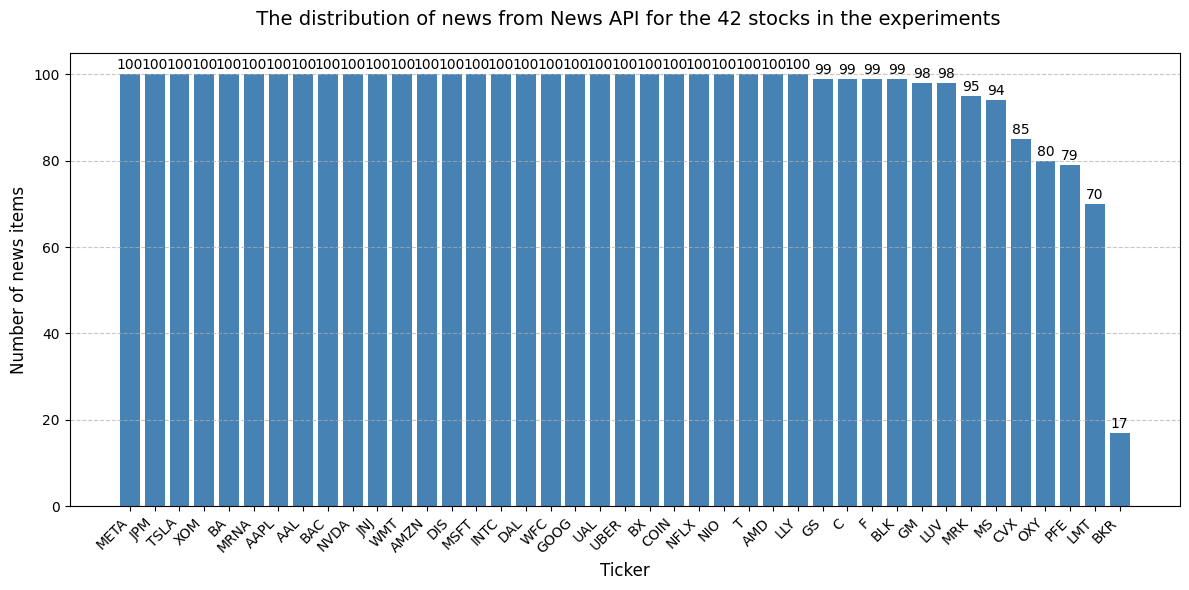

In [ ]:
#  The distribution of news from REFINITIV REAL-TIME NEWS for the 42 stocks in the experiments

import matplotlib.pyplot as plt
import pandas as pd

def plot_news_distribution(news_dict: dict):
    """
    Строит столбчатую диаграмму распределения новостей по тикерам

    Параметры:
    news_dict (dict): Словарь формата {тикер: DataFrame с новостями}
    """
    # Подготовка данных
    counts = {}
    for ticker, df in news_dict.items():
        if df is not None and not df.empty:
            counts[ticker] = len(df['content'])

    # Сортировка по убыванию количества новостей
    sorted_counts = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True))

    # Создание графика
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_counts.keys(), sorted_counts.values(), color='steelblue')

    # Настройка оформления
    plt.title(' The distribution of news from News API for the 42 stocks in the experiments', fontsize=14, pad=20)
    plt.xlabel('Ticker', fontsize=12)
    plt.ylabel('Number of news items', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Добавление значений на столбцы
    for i, (ticker, count) in enumerate(sorted_counts.items()):
        plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

plot_news_distribution(financial_news)

In [ ]:
#  The distribution of 10k10q from Securities and Exchange Commission (SEC) for the 42 stocks in the experiments


start_date = "2022-01-03"
end_date = "2022-06-10"

all_stocks = ["META", "PFE", "JPM", "TSLA", "XOM", "GS", "BA", "C", "CVX", "MRNA", "GM", "F", "AAPL", "MS",
               "AAL", "BAC", "NVDA", "JNJ", "WMT", "AMZN", "DIS", "MSFT", "INTC", "DAL", "WFC", "MRK", "BLK", "GOOG",
               "UAL", "UBER", "BX", "COIN", "NFLX", "NIO", "BKR", "T", "AMD", "LLY", "OXY", "LUV", "LMT"]

# 2. Tell the SEC who you are
# set_identity("mike@indigo.com")

# filing_data = {}
# for ticker in all_stocks:
#   print(ticker)
#   print(Company(ticker))
#   filings_10_q = Company(ticker).get_filings(form="10-Q", date=f"{start_date}:{end_date}")
#   filings_10_k = Company(ticker).get_filings(form="10-K", date=f"{start_date}:{end_date}")

#   filing_data[ticker] = {
#                           "10-K": pd.DataFrame(filings_10_k),
#                           "10-Q": pd.DataFrame(filings_10_q)
#                         }


# Get 10-Q, 10-K Company Forms from SEC
filing_data = get_filings_data(all_stocks, start_date, end_date)
# print(filing_data)

In [ ]:
for key in filing_data.keys():
  print(key)
  print(len(filing_data[key]['10-K']))

META
1
PFE
1
JPM
1
TSLA
1
XOM
1
GS
1
BA
1
C
1
CVX
1
MRNA
1
GM
1
F
1
AAPL
0
MS
1
AAL
1
BAC
1
NVDA
1
JNJ
1
WMT
1
AMZN
1
DIS
0
MSFT
0
INTC
1
DAL
1
WFC
1
MRK
1
BLK
0
GOOG
1
UAL
1
UBER
1
BX
1
COIN
1
NFLX
1
NIO
0
BKR
1
T
1
AMD
1
LLY
1
OXY
1
LUV
1
LMT
1


<Figure size 1200x600 with 0 Axes>

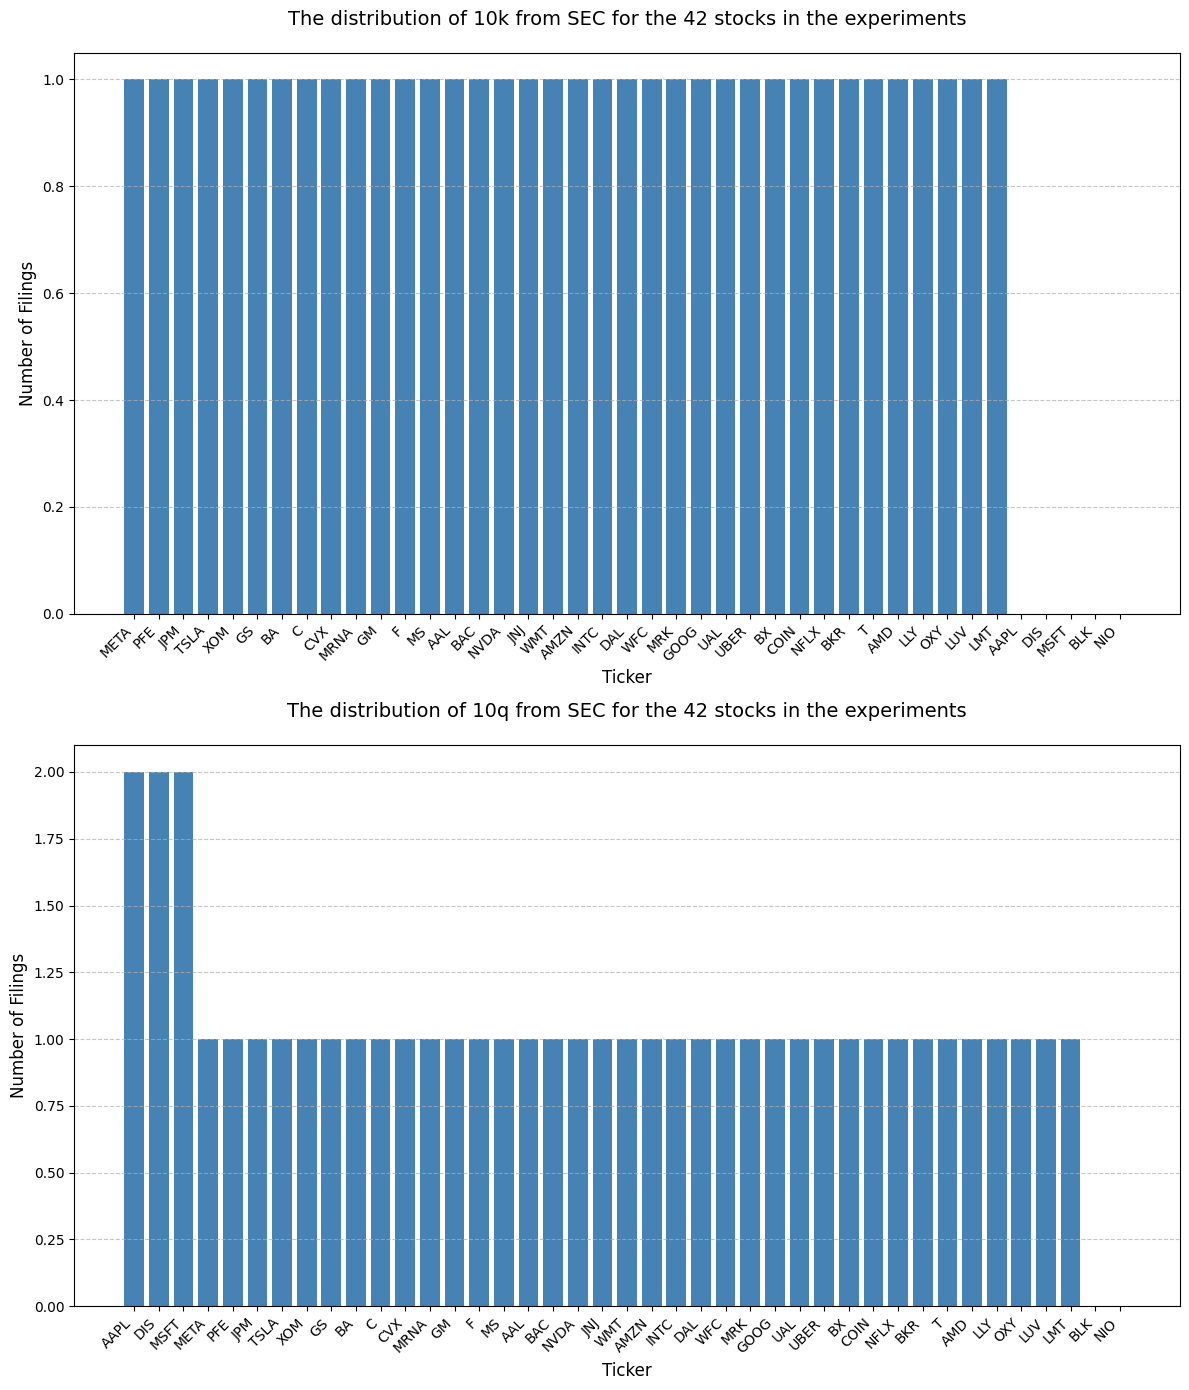

In [ ]:
def plot_filing_distribution(filing_dict: dict):
    """
    Строит столбчатую диаграмму распределения новостей по тикерам

    Параметры:
    news_dict (dict): Словарь формата {тикер: DataFrame с новостями}
    """
    # Подготовка данных
    counts_10_K = {}
    counts_10_Q = {}
    for ticker, dict_q_k in filing_dict.items():
        # if dict_q_k['10-K'] is not None and not dict_q_k['10-K'].empty:
        counts_10_K[ticker] = len(dict_q_k['10-K'])

        # if dict_q_k['10-Q'] is not None and not dict_q_k['10-Q'].empty:
        counts_10_Q[ticker] = len(dict_q_k['10-Q'])

    # Сортировка по убыванию количества новостей
    sorted_counts_10_K = dict(sorted(counts_10_K.items(), key=lambda x: x[1], reverse=True))
    sorted_counts_10_Q = dict(sorted(counts_10_Q.items(), key=lambda x: x[1], reverse=True))

    # Создание графика
    plt.figure(figsize=(12, 6))
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 14))
    plt.sca(ax[0])
    plt.bar(sorted_counts_10_K.keys(), sorted_counts_10_K.values(), color='steelblue')
    plt.title('The distribution of 10k from SEC for the 42 stocks in the experiments', fontsize=14, pad=20)
    plt.xlabel('Ticker', fontsize=12)
    plt.ylabel('Number of Filings', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.sca(ax[1])
    plt.bar(sorted_counts_10_Q.keys(), sorted_counts_10_Q.values(), color='steelblue')
    plt.title('The distribution of 10q from SEC for the 42 stocks in the experiments', fontsize=14, pad=20)
    plt.xlabel('Ticker', fontsize=12)
    plt.ylabel('Number of Filings', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # # Добавление значений на столбцы
    # for i, (ticker, count) in enumerate(sorted_counts_10_K.items()):
    #     plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

plot_filing_distribution(filing_data)

In [ ]:
start_date = "2025-03-22"
end_date = "2025-04-22"

filing_data_new = get_filings_data(all_stocks, start_date, end_date)

In [ ]:
filing_data

{'META': {'10-K':                                                    0
  0  Filing(company='Meta Platforms, Inc.', cik=132...,
  '10-Q':                                                    0
  0  Filing(company='Meta Platforms, Inc.', cik=132...},
 'PFE': {'10-K':                                                    0
  0  Filing(company='PFIZER INC', cik=78003, form='...,
  '10-Q':                                                    0
  0  Filing(company='PFIZER INC', cik=78003, form='...},
 'JPM': {'10-K':                                                    0
  0  Filing(company='JPMORGAN CHASE & CO', cik=1961...,
  '10-Q':                                                    0
  0  Filing(company='JPMORGAN CHASE & CO', cik=1961...},
 'TSLA': {'10-K':                                                    0
  0  Filing(company='Tesla, Inc.', cik=1318605, for...,
  '10-Q':                                                    0
  0  Filing(company='Tesla, Inc.', cik=1318605, for...},
 'XOM': {'10-K

In [ ]:
filing_data["META"]["10-Q"][0][0]

╭──────────── Form 10-Q Meta Platforms, Inc. [1326801] META ────────────╮
│                                                                       │
│   Accession Number       Filing Date   Period of Report   Documents   │
│  ───────────────────────────────────────────────────────────────────  │
│   0001326801-22-000057   2022-04-28    2022-03-31         102         │
│                                                                       │
│                                                                       │
│                                                                       │
│                                                                       │
╰──────────────── Quarterly report for public companies ────────────────╯

In [ ]:
# # Save collected filing_data to json file
# filing_data_json = filing_data.copy()
# for key in filing_data.keys():
#   for sec_key in filing_data[key]:
#     # print(type(filing_data[key][sec_key][0][0]))
#     print(filing_data_json[key][sec_key])
#     filing_data_json[key][sec_key] = filing_data[key][sec_key][0][0]


# with open('filing_data.json', 'w') as file:
#   json.dump(filing_data_json, file)


Filing(company='Meta Platforms, Inc.', cik=1326801, form='10-K', filing_date='2022-02-03', accession_no='0001326801-22-000018')


TypeError: 'EntityFiling' object is not subscriptable

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import openai
import re
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib
from typing import Dict, List

# Replace with your actual OpenAI API key
openai.api_key = os.environ.get("OPENAI_API_KEY")

# Choose a currently available OpenAI model.  "gpt-3.5-turbo-instruct" is a good alternative.
MODEL_NAME = "gpt-3.5-turbo-instruct"

# -----------------------------------------------------------------------------
# 1. Data Sources (SEC EDGAR remains from prior code)
# -----------------------------------------------------------------------------

def get_financial_report(ticker: str, filing_type: str = '10-K', year: int = 2023) -> str:
    """
    Получает финансовые отчеты из базы данных SEC EDGAR с обходом защиты от ботов.
    """
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
        'Accept-Encoding': 'gzip, deflate'
    }

    try:
        # 1. Поиск отчетов
        base_url = "https://www.sec.gov/cgi-bin/browse-edgar"
        params = {
            'action': 'getcompany',
            'CIK': ticker,
            'type': filing_type,
            'dateb': f'{year}1231',
            'owner': 'exclude',
            'count': '100'
        }

        response = requests.get(base_url, headers=headers, params=params, timeout=10)
        response.raise_for_status()

        # 2. Парсинг страницы результатов
        soup = BeautifulSoup(response.text, 'html.parser')
        filing_link = soup.select_one('table.tableFile2 td a[href*="/Archives/edgar/data/"]')
        if not filing_link:
            return "Отчет не найден"

        # 3. Получение документа
        doc_response = requests.get(
            f"https://www.sec.gov{filing_link['href']}",
            headers=headers,
            timeout=10
        )
        doc_response.raise_for_status()

        # 4. Извлечение текста
        doc_soup = BeautifulSoup(doc_response.text, 'html.parser')
        return doc_soup.get_text(separator='\n', strip=True)[:10000]

    except requests.exceptions.RequestException as e:
        return f"Ошибка запроса: {str(e)}"
    except Exception as e:
        return f"Ошибка обработки: {str(e)}"

def get_stock_data(ticker: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Gets historical stock data from Yahoo Finance and returns a DataFrame.
    """
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if not data.empty:
            # Ensure the DataFrame has a DatetimeIndex
            data.index = pd.to_datetime(data.index)
            data.index.name = 'Date'
            return data
        else:
            print(f"No stock data found for {ticker} in the specified date range.")
            return None
    except Exception as e:
        print(f"Error getting stock data for {ticker}: {e}")
        return None

def get_financial_news(ticker: str, api_key: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Gets financial news articles from News API and returns a DataFrame.
    """
    url = f"https://newsapi.org/v2/everything?q={ticker}&from={start_date}&to={end_date}&sortBy=relevancy&apiKey={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        articles = data['articles']
        df = pd.DataFrame(articles)

        if not df.empty:
            # Select and rename columns
            df = df[['title', 'description', 'content', 'publishedAt']]
            df.rename(columns={'title': 'Title', 'description': 'Description', 'content': 'Content', 'publishedAt': 'PublishedAt'}, inplace=True)

            # Convert 'PublishedAt' to datetime
            df['PublishedAt'] = pd.to_datetime(df['PublishedAt'])

            return df
        else:
            print(f"No news articles found for {ticker} in the specified date range.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error getting news for {ticker}: {e}")
        return None
    except KeyError:
        print(f"Error parsing news data for {ticker}: Invalid response format")
        return None

def get_earnings_call_transcript(ticker: str) -> str:
    """
    Scrapes earnings call transcripts from a website (example: Seeking Alpha).
    This is a simplified example and might need adjustments based on the website structure.
    Returns raw text.
    """
    url = f"https://seekingalpha.com/symbol/{ticker}/earnings/transcripts"  # Example URL structure
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Example: Find the transcript content (adjust based on actual HTML structure)
        transcript_div = soup.find('div', class_='article-body')  # Replace with actual class
        if transcript_div:
            transcript = transcript_div.get_text(separator='\n', strip=True)
            return transcript
        else:
            return "Transcript not found on the page."

    except requests.exceptions.RequestException as e:
        print(f"Error getting earnings call transcript for {ticker}: {e}")
        return "Error fetching transcript."
    except Exception as e:
        print(f"Error processing earnings call transcript for {ticker}: {e}")
        return "Error processing transcript."

def get_alpaca_news(ticker: str, alpaca_api_key: str, alpaca_secret_key: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Gets news articles from the Alpaca News API and returns a DataFrame.
    """
    url = "https://data.alpaca.markets/v1beta1/news"
    headers = {
        "APCA-API-KEY-ID": alpaca_api_key,
        "APCA-API-SECRET-KEY": alpaca_secret_key
    }
    params = {
        "symbols": ticker,
        "start": start_date,
        "end": end_date
    }

    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()
        news_data = response.json()

        articles = news_data.get('news', [])  # Safely get the 'news' list
        df = pd.DataFrame(articles)

        if not df.empty:
            # Select and rename columns
            df = df[['headline', 'summary', 'created_at', 'source']]
            df.rename(columns={'headline': 'Title', 'summary': 'Description', 'created_at': 'PublishedAt', 'source': 'Source'}, inplace=True)

            # Convert 'PublishedAt' to datetime
            df['PublishedAt'] = pd.to_datetime(df['PublishedAt'])
            return df
        else:
            print(f"No Alpaca news found for {ticker} in the specified date range.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error getting Alpaca news for {ticker}: {e}")
        return None
    except (KeyError, TypeError) as e:
        print(f"Error parsing Alpaca news data for {ticker}: {e}")
        return None

# -----------------------------------------------------------------------------
# 2. Analyst Agents
# -----------------------------------------------------------------------------

class DataAnalysisAnalyst:
    """
    Computes financial metrics from tabular time series data.
    """
    def __init__(self):
        self.name = "DataAnalysisAnalyst"
        self.description = "Computes financial metrics from tabular time series data."

    def analyze(self, time_series_data: pd.DataFrame) -> dict:  # Return a dict
        """
        Computes momentum from the time series data.
        """
        try:
            # Calculate momentum (example: 3-month momentum)
            momentum = self.calculate_momentum(time_series_data['Close'], window=60)  # Roughly 3 months
            return {"momentum": momentum} # Return as a dictionary
        except Exception as e:
            print(f"Error analyzing time series data: {e}")
            return {"momentum": None} # Return None if there's an error

    def calculate_momentum(self, prices: pd.Series, window: int) -> float:
        """
        Calculates momentum over a given window.
        """
        if len(prices) < window:
            return 0.0  # Not enough data

        return prices.iloc[-1] / prices.iloc[-window] - 1

class NewsSentimentAnalyst:
    """
    Analyzes news articles and extracts sentiment using OpenAI.
    """
    def __init__(self):
        self.name = "NewsSentimentAnalyst"
        self.description = "Extracts sentiment from news articles using OpenAI."

    def analyze(self, news_headline: str) -> float:
        """
        Analyzes the news headline and returns a sentiment score (-1 to 1).
        """
        try:
            response = openai.completions.create(
                model=MODEL_NAME,  # Use the chosen model
                prompt=f"What is the sentiment of this news headline: {news_headline}? Answer strictly with one of these words: Positive, Negative, or Neutral.",
                max_tokens=10,  # Reduced max_tokens
                n=1,
                stop=None,
                temperature=0.2,
            )
            sentiment_text = response.choices[0].text.strip().lower()

            if "positive" in sentiment_text:
                return 1.0
            elif "negative" in sentiment_text:
                return -1.0
            else:
                return 0.0 # Neutral
        except Exception as e:
            print(f"Error analyzing sentiment: {e}")
            return 0.0  # Default to neutral on error

class FilingAnalysisAgent:
    """
    Analyzes 10-Q/10-K filings and extracts key information.
    """
    def __init__(self):
        self.name = "FilingAnalysisAgent"
        self.description = "Extracts key information from 10-Q/10-K filings using LLMs."

    def analyze(self, filing_text: str) -> Dict[str, str]:
        """
        Analyzes the filing text and returns key information in a dictionary.
        """
        try:
            # 1. Extract Key Financial Metrics (Example)
            revenue = self.extract_financial_metric(filing_text, "Revenue")
            net_income = self.extract_financial_metric(filing_text, "Net Income")

            # 2. Extract Management Discussion (Example)
            management_discussion = self.extract_management_discussion(filing_text)

            # 3. Extract Risk Factors (Example)
            risk_factors = self.extract_risk_factors(filing_text)

            return {
                "Revenue": revenue,
                "Net Income": net_income,
                "Management Discussion": management_discussion,
                "Risk Factors": risk_factors,
            }

        except Exception as e:
            print(f"Error analyzing filing: {e}")
            return {}

    def extract_financial_metric(self, filing_text: str, metric_name: str) -> str:
        """
        Extracts a specific financial metric from the filing text using LLMs.
        """
        try:
            response = openai.completions.create(
                model=MODEL_NAME,
                prompt=f"Extract the value of {metric_name} from the following financial report:\n\n{filing_text}\n\nValue:",
                max_tokens=50,
                n=1,
                stop=None,
                temperature=0.3,
            )
            return response.choices[0].text.strip()
        except Exception as e:
            print(f"Error extracting {metric_name}: {e}")
            return "N/A"

    def extract_management_discussion(self, filing_text: str) -> str:
          """
          Extracts key points from the Management Discussion and Analysis (MD&A) section.
          """
          try:
              response = openai.completions.create(
                  model=MODEL_NAME,
                  prompt=f"Summarize the key points from the Management Discussion and Analysis (MD&A) section of the following financial report:\n\n{filing_text}\n\nSummary:",
                  max_tokens=200,
                  n=1,
                  stop=None,
                  temperature=0.4,
              )
              return response.choices[0].text.strip()
          except Exception as e:
              print(f"Error extracting MD&A: {e}")
              return "N/A"

    def extract_risk_factors(self, filing_text: str) -> str:
        """
        Identifies and lists the key risk factors discussed in the filing.
        """
        try:
            response = openai.completions.create(
                model=MODEL_NAME,
                prompt=f"List the key risk factors discussed in the following financial report:\n\n{filing_text}\n\nRisk Factors:",
                max_tokens=150,
                n=1,
                stop=None,
                temperature=0.3,
            )
            return response.choices[0].text.strip()
        except Exception as e:
            print(f"Error extracting risk factors: {e}")
            return "N/A"

# -----------------------------------------------------------------------------
# 3. Trading Strategies
# -----------------------------------------------------------------------------

def random_trading_strategy(data: pd.DataFrame) -> pd.DataFrame:
    """
    A random trading strategy for comparison.
    """
    signals = np.random.choice([-1, 0, 1], size=len(data)) # -1: sell, 0: hold, 1: buy
    data['Signal'] = signals
    return data

def moving_average_strategy(data: pd.DataFrame, short_window: int, long_window: int) -> pd.DataFrame:
    """
    A simple moving average crossover strategy.
    """
    data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window).mean()
    data['Signal'] = 0.0
    data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1.0, 0.0)
    data['Position'] = data['Signal'].diff()
    return data

# def fincon_trading_strategy(data: pd.DataFrame, momentum: float, news_sentiment: float) -> pd.DataFrame:
#     """
#     A simplified FINCON trading strategy that uses momentum and news sentiment.
#     """
#     data['Signal'] = 0.0  # Default to hold

#     # Check if data['Signal'] is a Series or a single value before evaluating
#     if isinstance(data['Signal'], pd.Series):
#         if (momentum is not None) and (news_sentiment is not None):
#             combined_signal = momentum + news_sentiment  # Simple combination

#             # Use .loc to set the 'Signal' column based on the combined_signal
#             data.loc[combined_signal > 0.2, 'Signal'] = 1  # Buy
#             data.loc[combined_signal < -0.2, 'Signal'] = -1  # Sell
#     else:
#         print("Warning: data['Signal'] is not a Pandas Series.")

#     return data


def fincon_trading_strategy(data: pd.DataFrame, momentum: float, news_sentiment: float) -> pd.DataFrame:
    """
    A simplified FINCON trading strategy that uses momentum and news sentiment.
    """
    data['Signal'] = 0.0  # Default to hold

    # Combine momentum and sentiment
    if momentum is not None and news_sentiment is not None:
        # Create a combined signal Series with the same index as the data DataFrame
        combined_signal = pd.Series(momentum + news_sentiment, index=data.index) # Changed this line!

        # Use .loc to set the 'Signal' column based on the combined_signal
        data.loc[combined_signal > 0.2, 'Signal'] = 1  # Buy
        data.loc[combined_signal < -0.2, 'Signal'] = -1  # Sell

    return data



# -----------------------------------------------------------------------------
# 4. Performance Evaluation
# -----------------------------------------------------------------------------

# def evaluate_strategy(data: pd.DataFrame, initial_capital: float = 100000) -> dict:
#     """
#     Evaluates the performance of a trading strategy.
#     """
#     positions = pd.DataFrame(index=data.index, data={'Holdings': np.zeros(len(data))})
#     portfolio = pd.DataFrame(index=data.index, data={'Cash': np.zeros(len(data)), 'Total': np.zeros(len(data))})
#     portfolio['Cash'][0] = initial_capital
#     portfolio['Total'][0] = initial_capital

#     # Add a 'Shares' column
#     data['Shares'] = 0

#     shares = 0
#     for i in range(1, len(data)):
#         signal = data['Signal'][i]
#         closing_price = data['Close'][i]

#         if signal == 1:  # Buy
#             shares_to_buy = int(portfolio['Cash'][i-1] / closing_price)
#             shares += shares_to_buy
#             portfolio['Cash'][i] = portfolio['Cash'][i-1] - shares_to_buy * closing_price
#             data['Shares'][i] = shares_to_buy  # Record the number of shares bought
#         elif signal == -1: # Sell
#             portfolio['Cash'][i] = portfolio['Cash'][i-1] + shares * closing_price
#             shares = 0
#             data['Shares'][i] = -shares # Record selling all shares (negative value)
#         else: # Hold
#             portfolio['Cash'][i] = portfolio['Cash'][i-1]

#         positions['Holdings'][i] = shares * closing_price
#         portfolio['Total'][i] = portfolio['Cash'][i] + positions['Holdings'][i]

#     returns = portfolio['Total'].pct_change()
#     sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std()) if returns.std() > 0 else 0

#     # Calculate drawdown
#     peak = portfolio['Total'].expanding().max()
#     drawdown = (portfolio['Total'] - peak) / peak
#     max_drawdown = drawdown.min()

#     final_portfolio_value = portfolio['Total'].iloc[-1]
#     profit = final_portfolio_value - initial_capital

#     return {
#         'Final Portfolio Value': final_portfolio_value,
#         'Profit': profit,
#         'Sharpe Ratio': sharpe_ratio,
#         'Max Drawdown': max_drawdown,
#         'Portfolio': portfolio, # Return the portfolio DataFrame
#         'Data': data # Return the trading data DataFrame
#     }

def evaluate_strategy(data: pd.DataFrame, initial_capital: float = 100000) -> dict:
    """
    Evaluates the performance of a trading strategy.
    """
    positions = pd.DataFrame(index=data.index, data={'Holdings': np.zeros(len(data))})
    portfolio = pd.DataFrame(index=data.index, data={'Cash': np.zeros(len(data)), 'Total': np.zeros(len(data))})
    portfolio['Cash'].iloc[0] = initial_capital  # Use .iloc to set value at the first position
    portfolio['Total'].iloc[0] = initial_capital  # Use .iloc to set value at the first position

    # Add a 'Shares' column
    data['Shares'] = 0

    shares = 0
    for i in range(1, len(data)):
        signal = data['Signal'][i]
        closing_price = data['Close'][i]

        if signal == 1:  # Buy
            shares_to_buy = int(portfolio['Cash'].iloc[i-1] / closing_price)  # Use .iloc for accessing previous value
            shares += shares_to_buy
            portfolio['Cash'].iloc[i] = portfolio['Cash'].iloc[i-1] - shares_to_buy * closing_price  # Use .iloc for assignment
            data['Shares'].iloc[i] = shares_to_buy  # Record the number of shares bought # Use .iloc for assignment
        elif signal == -1: # Sell
            portfolio['Cash'].iloc[i] = portfolio['Cash'].iloc[i-1] + shares * closing_price  # Use .iloc for assignment
            shares = 0
            data['Shares'].iloc[i] = -shares # Record selling all shares (negative value) # Use .iloc for assignment
        else: # Hold
            portfolio['Cash'].iloc[i] = portfolio['Cash'].iloc[i-1] # Use .iloc for assignment

        positions['Holdings'].iloc[i] = shares * closing_price # Use .iloc for assignment
        portfolio['Total'].iloc[i] = portfolio['Cash'].iloc[i] + positions['Holdings'].iloc[i] # Use .iloc for assignment

    returns = portfolio['Total'].pct_change()
    sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std()) if returns.std() > 0 else 0

    # Calculate drawdown
    peak = portfolio['Total'].expanding().max()
    drawdown = (portfolio['Total'] - peak) / peak
    max_drawdown = drawdown.min()

    final_portfolio_value = portfolio['Total'].iloc[-1]
    profit = final_portfolio_value - initial_capital

    return {
        'Final Portfolio Value': final_portfolio_value,
        'Profit': profit,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown,
        'Portfolio': portfolio, # Return the portfolio DataFrame
        'Data': data # Return the trading data DataFrame
    }


# -----------------------------------------------------------------------------
# 5. Plotting Function
# -----------------------------------------------------------------------------

def plot_trading_results(strategy_name: str, results: dict):
    """
    Plots the portfolio value and daily returns for a given trading strategy.
    """
    portfolio = results['Portfolio']
    data = results['Data']

    # Create figure and axes
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    # Plot portfolio value
    axes[0].plot(portfolio['Total'], label=strategy_name, color='blue')
    axes[0].set_title(f'{strategy_name} - Portfolio Value Over Time')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Portfolio Value ($)')
    axes[0].grid(True)

    # Plot daily returns
    returns = portfolio['Total'].pct_change()
    axes[1].plot(returns, label=strategy_name, color='green')
    axes[1].set_title(f'{strategy_name} - Daily Returns')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Daily Return')
    axes[1].grid(True)

    # Add trade markers
    for i in range(1, len(data)):
        if data['Shares'][i] != 0:  # If a trade occurred
            axes[0].axvline(x=data.index[i], color='red', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------------
# 6. Main Execution
# -----------------------------------------------------------------------------

if __name__ == "__main__":
    # Define the ticker and date range
    ticker = "AAPL"
    start_date = "2023-01-01"
    end_date = "2024-01-01"

    # 1. Get stock data
    stock_data = get_stock_data(ticker, start_date, end_date)
    if stock_data is not None:
        print(f"Stock Data for {ticker}:\n", stock_data.head())

        # 2. Get financial news
        news_api_key = "YOUR_NEWS_API_KEY"
        news_articles = get_financial_news(ticker, news_api_key, start_date, end_date)

        # 3. Get 10K filing
        filing_agent = FilingAnalysisAgent()
        filing_text = get_financial_report(ticker, filing_type='10-K', year=2023)

        # 4. Analyze the filing
        filing_data = filing_agent.analyze(filing_text)
        print(f"Filing Data: {filing_data}")

        # 5. Data Analysis with DataAnalysisAnalyst
        data_analysis_analyst = DataAnalysisAnalyst()
        analysis_result = data_analysis_analyst.analyze(stock_data)
        momentum = analysis_result["momentum"] # Extract momentum
        print(f"Momentum: {momentum}")

        # 6. News Sentiment Analysis
        news_sentiment = 0.0  # Default
        if news_articles is not None and not news_articles.empty:
            news_sentiment_analyst = NewsSentimentAnalyst()
            #  For simplicity, use sentiment of the *latest* article.  A more robust approach would average over multiple articles.
            news_sentiment = news_sentiment_analyst.analyze(news_articles['Title'].iloc[-1])  # Analyze the latest headline
            print(f"News Sentiment: {news_sentiment}")

        # 7. Implement Trading Strategies
        # a. Random Trading Strategy
        random_data = stock_data.copy()
        random_data = random_trading_strategy(random_data)

        # b. Moving Average Strategy
        ma_data = stock_data.copy()
        ma_data = moving_average_strategy(ma_data, short_window=20, long_window=50)

        # c. FINCON (Simplified)
        fincon_data = stock_data.copy()
        fincon_data = fincon_trading_strategy(fincon_data, momentum, news_sentiment)

        # 8. Evaluate Strategies
        print("\nEvaluating Random Trading Strategy:")
        random_results = evaluate_strategy(random_data)
        print(random_results)

        print("\nEvaluating Moving Average Strategy:")
        ma_results = evaluate_strategy(ma_data)
        print(ma_results)

        print("\nEvaluating FINCON (Simplified) Strategy:")
        fincon_results = evaluate_strategy(fincon_data)
        print(fincon_results)

        # 9. Plot Results
        plot_trading_results("Random Strategy", random_results)
        plot_trading_results("Moving Average Strategy", ma_results)
        plot_trading_results("FINCON Strategy", fincon_results)


[*********************100%***********************]  1 of 1 completed


Stock Data for AAPL:
 Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.632538  129.395526  122.742880  128.782657  112117500
2023-01-04  124.907684  127.181252  123.642397  125.431592   89113600
2023-01-05  123.583107  126.301500  123.326101  125.668857   80962700
2023-01-06  128.130203  128.792501  123.454572  124.561702   87754700
2023-01-09  128.654129  131.876670  128.397123  128.970458   70790800
Error getting news for AAPL: 401 Client Error: Unauthorized for url: https://newsapi.org/v2/everything?q=AAPL&from=2023-01-01&to=2024-01-01&sortBy=relevancy&apiKey=YOUR_NEWS_API_KEY
Error extracting Revenue: module 'openai' has no attribute 'completions'
Error extracting Net Income: module 'openai' has no attribute 'completions'
Error extracting MD&A: module 'openai' has no attribute 'completions'
Error extracting 

<ipython-input-6-cfd67d47d9e0>:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1.0, 0.0)
<ipython-input-6-cfd67d47d9e0>:467: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perfor

KeyError: 1

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Stock Data for AAPL:
 Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.632530  129.395518  122.742873  128.782649  112117500
2023-01-04  124.907700  127.181268  123.642412  125.431607   89113600
2023-01-05  123.583099  126.301493  123.326093  125.668849   80962700
2023-01-06  128.130219  128.792516  123.454587  124.561717   87754700
2023-01-09  128.654144  131.876686  128.397138  128.970474   70790800
Error getting news for AAPL: 426 Client Error: Upgrade Required for url: https://newsapi.org/v2/everything?q=AAPL&from=2023-01-01&to=2024-01-01&sortBy=relevancy&apiKey=fb63178174ab47459a26782d7f798d0e
Filing Data: {'Revenue': 'Unable to extract value as the link provided is not accessible.', 'Net Income': 'N/A', 'Management Discussion': "The Management Discussion and Analysis (MD&A) section of the financial report 

<ipython-input-1-2746861a9ce1>:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1.0, 0.0)
<ipython-input-1-2746861a9ce1>:396: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perfor

{'Final Portfolio Value': np.float64(101386.96435546875), 'Profit': np.float64(1386.96435546875), 'Sharpe Ratio': np.float64(0.1702009883195775), 'Max Drawdown': -0.142402216169762, 'Portfolio':                      Cash          Total
Date                                    
2023-01-03  100000.000000  100000.000000
2023-01-04  100000.000000  100000.000000
2023-01-05  100000.000000  100000.000000
2023-01-06  100000.000000  100000.000000
2023-01-09  100000.000000  100000.000000
...                   ...            ...
2023-12-22  101660.408020  101660.408020
2023-12-26     146.433243  101660.408020
2023-12-27     146.433243  101712.988373
2023-12-28     146.433243  101939.106491
2023-12-29  101386.964355  101386.964355

[250 rows x 2 columns], 'Data': Price            Close        High         Low        Open     Volume Signal  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL          
Date                                                                           

<ipython-input-1-2746861a9ce1>:396: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  portfolio['Cash'].iloc[0] = initial_capital
<ipython-input-1-2746861a9ce1>:397: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You

{'Final Portfolio Value': np.float64(100000.0), 'Profit': np.float64(0.0), 'Sharpe Ratio': 0, 'Max Drawdown': 0.0, 'Portfolio':                 Cash     Total
Date                          
2023-01-03  100000.0  100000.0
2023-01-04  100000.0  100000.0
2023-01-05  100000.0  100000.0
2023-01-06  100000.0  100000.0
2023-01-09  100000.0  100000.0
...              ...       ...
2023-12-22  100000.0  100000.0
2023-12-26  100000.0  100000.0
2023-12-27  100000.0  100000.0
2023-12-28  100000.0  100000.0
2023-12-29  100000.0  100000.0

[250 rows x 2 columns], 'Data': Price            Close        High         Low        Open     Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL   
Date                                                                    
2023-01-03  123.632530  129.395518  122.742873  128.782649  112117500   
2023-01-04  124.907700  127.181268  123.642412  125.431607   89113600   
2023-01-05  123.583099  126.301493  123.326093  125.668849   80962700  

<ipython-input-1-2746861a9ce1>:396: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  portfolio['Cash'].iloc[0] = initial_capital
<ipython-input-1-2746861a9ce1>:397: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You

{'Final Portfolio Value': np.float64(100000.0), 'Profit': np.float64(0.0), 'Sharpe Ratio': 0, 'Max Drawdown': 0.0, 'Portfolio':                 Cash     Total
Date                          
2023-01-03  100000.0  100000.0
2023-01-04  100000.0  100000.0
2023-01-05  100000.0  100000.0
2023-01-06  100000.0  100000.0
2023-01-09  100000.0  100000.0
...              ...       ...
2023-12-22  100000.0  100000.0
2023-12-26  100000.0  100000.0
2023-12-27  100000.0  100000.0
2023-12-28  100000.0  100000.0
2023-12-29  100000.0  100000.0

[250 rows x 2 columns], 'Data': Price            Close        High         Low        Open     Volume Signal  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL          
Date                                                                           
2023-01-03  123.632530  129.395518  122.742873  128.782649  112117500    0.0   
2023-01-04  124.907700  127.181268  123.642412  125.431607   89113600    0.0   
2023-01-05  123.583099  126.301493  

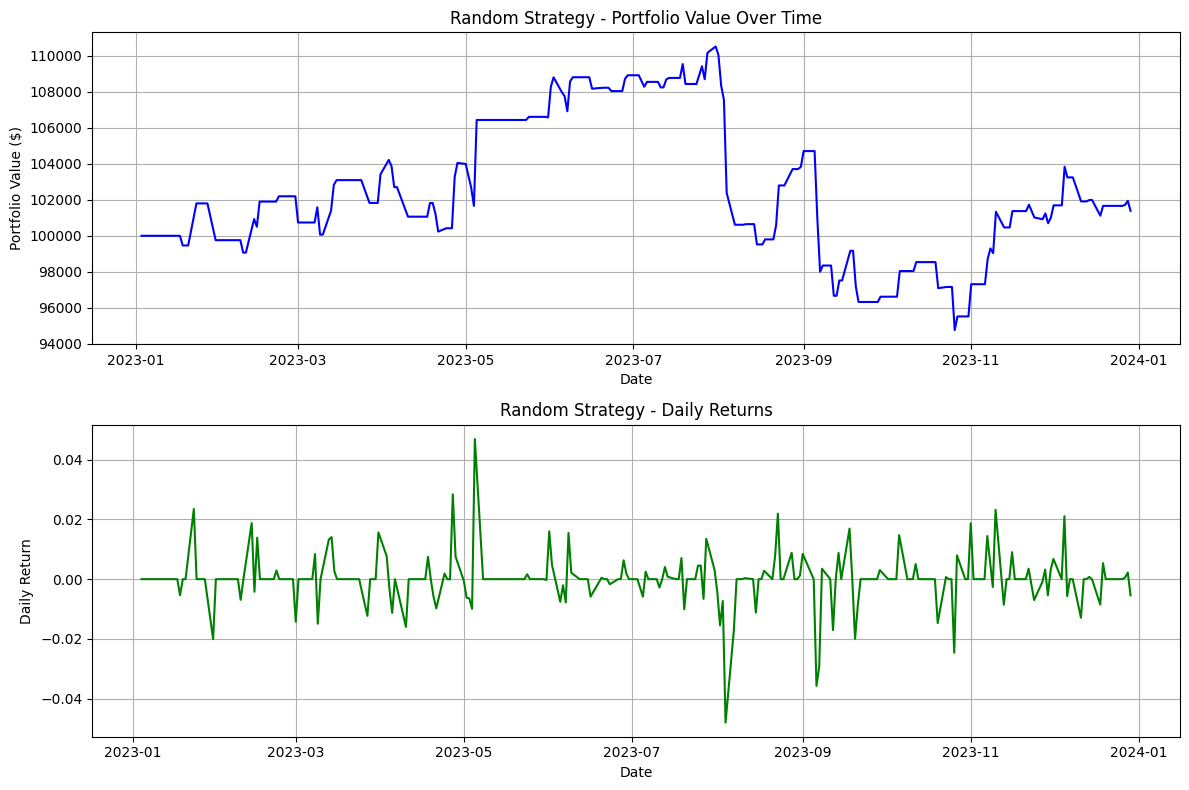

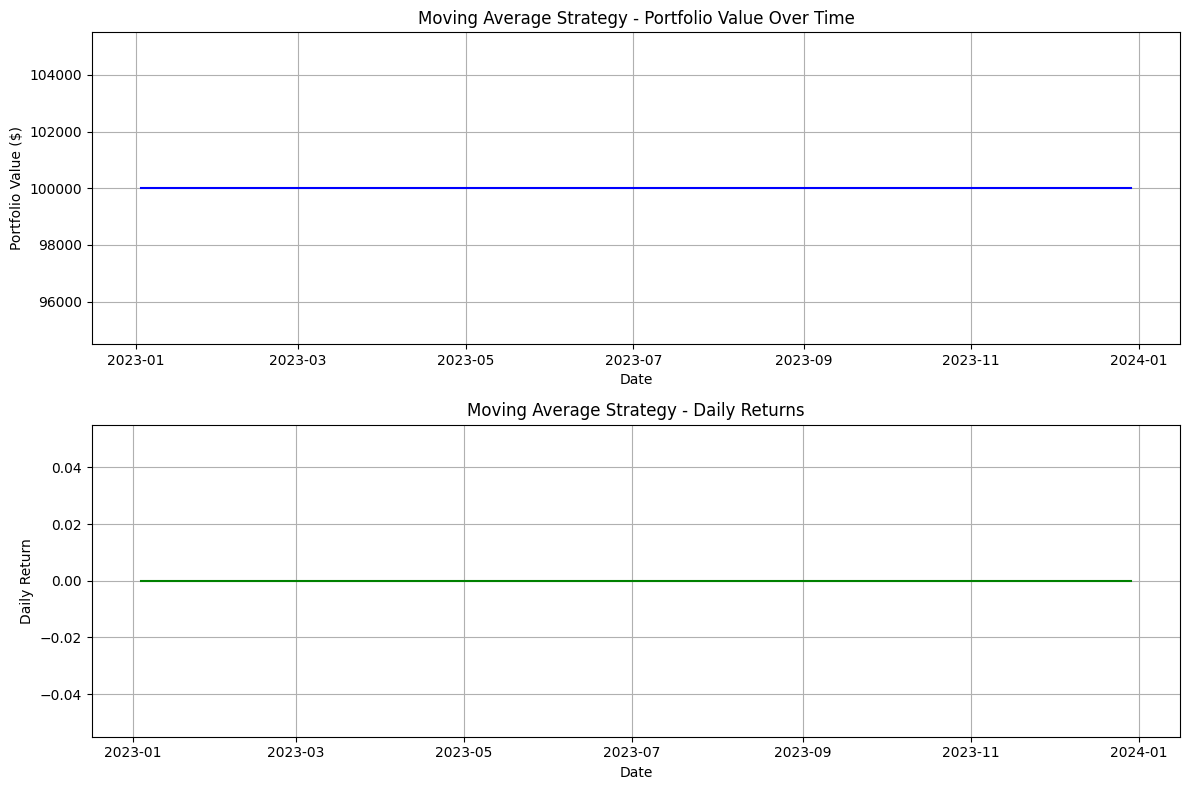

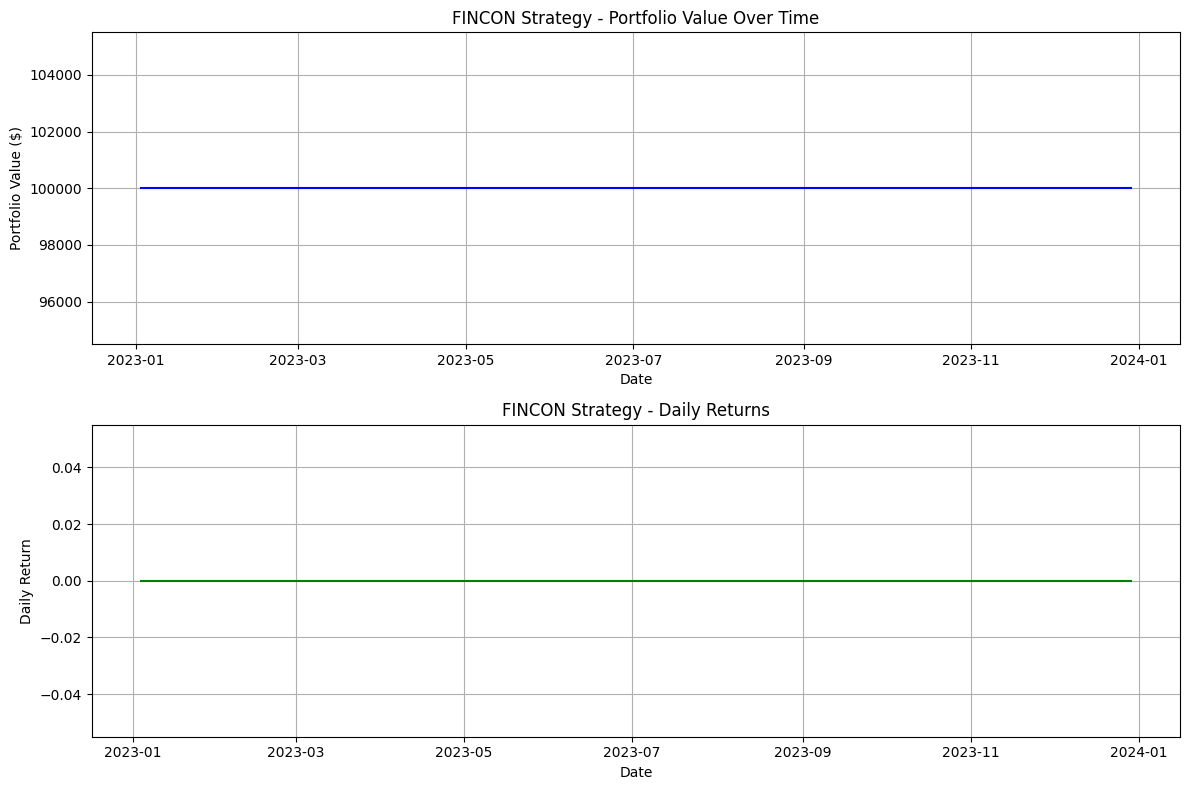

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import openai
import re
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib
from typing import Dict, List

# Replace with your actual OpenAI API key
# openai.api_key = os.environ.get("OPENAI_API_KEY")
openai.api_key = "sk-proj-ppMoAqZfoX35JduabVIST3BlbkFJEzhAS21mxB5wMemtX5N7"
# Choose a currently available OpenAI model.  "gpt-3.5-turbo-instruct" is a good alternative.
MODEL_NAME = "gpt-3.5-turbo-instruct"

# -----------------------------------------------------------------------------
# 1. Data Sources (SEC EDGAR remains from prior code)
# -----------------------------------------------------------------------------

def get_financial_report(ticker: str, filing_type: str = '10-K', year: int = 2023) -> str:
    """
    Получает финансовые отчеты из базы данных SEC EDGAR с обходом защиты от ботов.
    """
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
        'Accept-Encoding': 'gzip, deflate'
    }

    try:
        # 1. Поиск отчетов
        base_url = "https://www.sec.gov/cgi-bin/browse-edgar"
        params = {
            'action': 'getcompany',
            'CIK': ticker,
            'type': filing_type,
            'dateb': f'{year}1231',
            'owner': 'exclude',
            'count': '100'
        }

        response = requests.get(base_url, headers=headers, params=params, timeout=10)
        response.raise_for_status()

        # 2. Парсинг страницы результатов
        soup = BeautifulSoup(response.text, 'html.parser')
        filing_link = soup.select_one('table.tableFile2 td a[href*="/Archives/edgar/data/"]')
        if not filing_link:
            return "Отчет не найден"

        # 3. Получение документа
        doc_response = requests.get(
            f"https://www.sec.gov{filing_link['href']}",
            headers=headers,
            timeout=10
        )
        doc_response.raise_for_status()

        # 4. Извлечение текста
        doc_soup = BeautifulSoup(doc_response.text, 'html.parser')
        return doc_soup.get_text(separator='\n', strip=True)[:10000]

    except requests.exceptions.RequestException as e:
        return f"Ошибка запроса: {str(e)}"
    except Exception as e:
        return f"Ошибка обработки: {str(e)}"

def get_stock_data(ticker: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Gets historical stock data from Yahoo Finance and returns a DataFrame.
    """
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if not data.empty:
            # Ensure the DataFrame has a DatetimeIndex
            data.index = pd.to_datetime(data.index)
            data.index.name = 'Date'
            return data
        else:
            print(f"No stock data found for {ticker} in the specified date range.")
            return None
    except Exception as e:
        print(f"Error getting stock data for {ticker}: {e}")
        return None

def get_financial_news(ticker: str, api_key: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Gets financial news articles from News API and returns a DataFrame.
    """
    url = f"https://newsapi.org/v2/everything?q={ticker}&from={start_date}&to={end_date}&sortBy=relevancy&apiKey={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        articles = data['articles']
        df = pd.DataFrame(articles)

        if not df.empty:
            # Select and rename columns
            df = df[['title', 'description', 'content', 'publishedAt']]
            df.rename(columns={'title': 'Title', 'description': 'Description', 'content': 'Content', 'publishedAt': 'PublishedAt'}, inplace=True)

            # Convert 'PublishedAt' to datetime
            df['PublishedAt'] = pd.to_datetime(df['PublishedAt'])

            return df
        else:
            print(f"No news articles found for {ticker} in the specified date range.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error getting news for {ticker}: {e}")
        return None
    except KeyError:
        print(f"Error parsing news data for {ticker}: Invalid response format")
        return None

def get_earnings_call_transcript(ticker: str) -> str:
    """
    Scrapes earnings call transcripts from a website (example: Seeking Alpha).
    This is a simplified example and might need adjustments based on the website structure.
    Returns raw text.
    """
    url = f"https://seekingalpha.com/symbol/{ticker}/earnings/transcripts"  # Example URL structure
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Example: Find the transcript content (adjust based on actual HTML structure)
        transcript_div = soup.find('div', class_='article-body')  # Replace with actual class
        if transcript_div:
            transcript = transcript_div.get_text(separator='\n', strip=True)
            return transcript
        else:
            return "Transcript not found on the page."

    except requests.exceptions.RequestException as e:
        print(f"Error getting earnings call transcript for {ticker}: {e}")
        return "Error fetching transcript."
    except Exception as e:
        print(f"Error processing earnings call transcript for {ticker}: {e}")
        return "Error processing transcript."

def get_alpaca_news(ticker: str, alpaca_api_key: str, alpaca_secret_key: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Gets news articles from the Alpaca News API and returns a DataFrame.
    """
    url = "https://data.alpaca.markets/v1beta1/news"
    headers = {
        "APCA-API-KEY-ID": alpaca_api_key,
        "APCA-API-SECRET-KEY": alpaca_secret_key
    }
    params = {
        "symbols": ticker,
        "start": start_date,
        "end": end_date
    }

    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()
        news_data = response.json()

        articles = news_data.get('news', [])  # Safely get the 'news' list
        df = pd.DataFrame(articles)

        if not df.empty:
            # Select and rename columns
            df = df[['headline', 'summary', 'created_at', 'source']]
            df.rename(columns={'headline': 'Title', 'summary': 'Description', 'created_at': 'PublishedAt', 'source': 'Source'}, inplace=True)

            # Convert 'PublishedAt' to datetime
            df['PublishedAt'] = pd.to_datetime(df['PublishedAt'])
            return df
        else:
            print(f"No Alpaca news found for {ticker} in the specified date range.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error getting Alpaca news for {ticker}: {e}")
        return None
    except (KeyError, TypeError) as e:
        print(f"Error parsing Alpaca news data for {ticker}: {e}")
        return None

# -----------------------------------------------------------------------------
# 2. Analyst Agents
# -----------------------------------------------------------------------------

class DataAnalysisAnalyst:
    """
    Computes financial metrics from tabular time series data.
    """
    def __init__(self):
        self.name = "DataAnalysisAnalyst"
        self.description = "Computes financial metrics from tabular time series data."

    def analyze(self, time_series_data: pd.DataFrame) -> dict:  # Return a dict
        """
        Computes momentum from the time series data.
        """
        try:
            # Calculate momentum (example: 3-month momentum)
            momentum = self.calculate_momentum(time_series_data['Close'], window=60)  # Roughly 3 months
            return {"momentum": momentum} # Return as a dictionary
        except Exception as e:
            print(f"Error analyzing time series data: {e}")
            return {"momentum": None} # Return None if there's an error

    def calculate_momentum(self, prices: pd.Series, window: int) -> float:
        """
        Calculates momentum over a given window.
        """
        if len(prices) < window:
            return 0.0  # Not enough data

        return prices.iloc[-1] / prices.iloc[-window] - 1

class NewsSentimentAnalyst:
    """
    Analyzes news articles and extracts sentiment using OpenAI.
    """
    def __init__(self):
        self.name = "NewsSentimentAnalyst"
        self.description = "Extracts sentiment from news articles using OpenAI."

    def analyze(self, news_headline: str) -> float:
        """
        Analyzes the news headline and returns a sentiment score (-1 to 1).
        """
        try:
            response = openai.completions.create(
                model=MODEL_NAME,  # Use the chosen model
                prompt=f"What is the sentiment of this news headline: {news_headline}? Answer strictly with one of these words: Positive, Negative, or Neutral.",
                max_tokens=10,  # Reduced max_tokens
                n=1,
                stop=None,
                temperature=0.2,
            )
            sentiment_text = response.choices[0].text.strip().lower()

            if "positive" in sentiment_text:
                return 1.0
            elif "negative" in sentiment_text:
                return -1.0
            else:
                return 0.0 # Neutral
        except Exception as e:
            print(f"Error analyzing sentiment: {e}")
            return 0.0  # Default to neutral on error

class FilingAnalysisAgent:
    """
    Analyzes 10-Q/10-K filings and extracts key information.
    """
    def __init__(self):
        self.name = "FilingAnalysisAgent"
        self.description = "Extracts key information from 10-Q/10-K filings using LLMs."

    def analyze(self, filing_text: str) -> Dict[str, str]:
        """
        Analyzes the filing text and returns key information in a dictionary.
        """
        try:
            # 1. Extract Key Financial Metrics (Example)
            revenue = self.extract_financial_metric(filing_text, "Revenue")
            net_income = self.extract_financial_metric(filing_text, "Net Income")

            # 2. Extract Management Discussion (Example)
            management_discussion = self.extract_management_discussion(filing_text)

            # 3. Extract Risk Factors (Example)
            risk_factors = self.extract_risk_factors(filing_text)

            return {
                "Revenue": revenue,
                "Net Income": net_income,
                "Management Discussion": management_discussion,
                "Risk Factors": risk_factors,
            }

        except Exception as e:
            print(f"Error analyzing filing: {e}")
            return {}

    def extract_financial_metric(self, filing_text: str, metric_name: str) -> str:
        """
        Extracts a specific financial metric from the filing text using LLMs.
        """
        try:
            response = openai.completions.create(
                model=MODEL_NAME,
                prompt=f"Extract the value of {metric_name} from the following financial report:\n\n{filing_text}\n\nValue:",
                max_tokens=50,
                n=1,
                stop=None,
                temperature=0.3,
            )
            return response.choices[0].text.strip()
        except Exception as e:
            print(f"Error extracting {metric_name}: {e}")
            return "N/A"

    def extract_management_discussion(self, filing_text: str) -> str:
          """
          Extracts key points from the Management Discussion and Analysis (MD&A) section.
          """
          try:
              response = openai.completions.create(
                  model=MODEL_NAME,
                  prompt=f"Summarize the key points from the Management Discussion and Analysis (MD&A) section of the following financial report:\n\n{filing_text}\n\nSummary:",
                  max_tokens=200,
                  n=1,
                  stop=None,
                  temperature=0.4,
              )
              return response.choices[0].text.strip()
          except Exception as e:
              print(f"Error extracting MD&A: {e}")
              return "N/A"

    def extract_risk_factors(self, filing_text: str) -> str:
        """
        Identifies and lists the key risk factors discussed in the filing.
        """
        try:
            response = openai.completions.create(
                model=MODEL_NAME,
                prompt=f"List the key risk factors discussed in the following financial report:\n\n{filing_text}\n\nRisk Factors:",
                max_tokens=150,
                n=1,
                stop=None,
                temperature=0.3,
            )
            return response.choices[0].text.strip()
        except Exception as e:
            print(f"Error extracting risk factors: {e}")
            return "N/A"

# -----------------------------------------------------------------------------
# 3. Trading Strategies
# -----------------------------------------------------------------------------

def random_trading_strategy(data: pd.DataFrame) -> pd.DataFrame:
    """
    A random trading strategy for comparison.
    """
    signals = np.random.choice([-1, 0, 1], size=len(data)) # -1: sell, 0: hold, 1: buy
    data['Signal'] = signals
    return data

def moving_average_strategy(data: pd.DataFrame, short_window: int, long_window: int) -> pd.DataFrame:
    """
    A simple moving average crossover strategy.
    """
    data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window).mean()
    data['Signal'] = 0.0
    data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1.0, 0.0)
    data['Position'] = data['Signal'].diff()
    return data

def fincon_trading_strategy(data: pd.DataFrame, momentum: float, news_sentiment: float) -> pd.DataFrame:
    """
    A simplified FINCON trading strategy that uses momentum and news sentiment.
    """
    data['Signal'] = 0.0  # Default to hold

    # Combine momentum and sentiment
    if momentum is not None and news_sentiment is not None:
        # Create a combined signal Series with the same index as the data DataFrame
        combined_signal = pd.Series(momentum + news_sentiment, index=data.index) # Changed this line!

        # Use .loc to set the 'Signal' column based on the combined_signal
        data.loc[combined_signal > 0.2, 'Signal'] = 1  # Buy
        data.loc[combined_signal < -0.2, 'Signal'] = -1  # Sell

    return data

# -----------------------------------------------------------------------------
# 4. Performance Evaluation
# -----------------------------------------------------------------------------

def evaluate_strategy(data: pd.DataFrame, initial_capital: float = 100000) -> dict:
    """
    Evaluates the performance of a trading strategy.
    """
    # Initialize positions and portfolio DataFrames
    positions = pd.DataFrame(index=data.index, data={'Holdings': np.zeros(len(data))})
    portfolio = pd.DataFrame(index=data.index, data={'Cash': np.zeros(len(data)), 'Total': np.zeros(len(data))})

    # Set initial portfolio values
    portfolio['Cash'].iloc[0] = initial_capital
    portfolio['Total'].iloc[0] = initial_capital

    # Add a 'Shares' column
    data['Shares'] = 0

    shares = 0
    for i in range(1, len(data)):
        signal = data['Signal'].iloc[i]
        closing_price = data['Close'].iloc[i]

        if signal == 1:  # Buy
            shares_to_buy = int(portfolio['Cash'].iloc[i-1] / closing_price)
            shares += shares_to_buy
            portfolio['Cash'].iloc[i] = portfolio['Cash'].iloc[i-1] - shares_to_buy * closing_price
            data['Shares'].iloc[i] = shares_to_buy  # Record the number of shares bought
        elif signal == -1: # Sell
            portfolio['Cash'].iloc[i] = portfolio['Cash'].iloc[i-1] + shares * closing_price
            shares = 0
            data['Shares'].iloc[i] = -shares # Record selling all shares (negative value)
        else: # Hold
            portfolio['Cash'].iloc[i] = portfolio['Cash'].iloc[i-1]

        positions['Holdings'].iloc[i] = shares * closing_price
        portfolio['Total'].iloc[i] = portfolio['Cash'].iloc[i] + positions['Holdings'].iloc[i]

    returns = portfolio['Total'].pct_change()
    sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std()) if returns.std() > 0 else 0

    # Calculate drawdown
    peak = portfolio['Total'].expanding().max()
    drawdown = (portfolio['Total'] - peak) / peak
    max_drawdown = drawdown.min()

    final_portfolio_value = portfolio['Total'].iloc[-1]
    profit = final_portfolio_value - initial_capital

    return {
        'Final Portfolio Value': final_portfolio_value,
        'Profit': profit,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown,
        'Portfolio': portfolio, # Return the portfolio DataFrame
        'Data': data # Return the trading data DataFrame
    }

# -----------------------------------------------------------------------------
# 5. Plotting Function
# -----------------------------------------------------------------------------

def plot_trading_results(strategy_name: str, results: dict):
    """
    Plots the portfolio value and daily returns for a given trading strategy.
    """
    portfolio = results['Portfolio']
    data = results['Data']

    # Create figure and axes
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    # Plot portfolio value
    axes[0].plot(portfolio['Total'], label=strategy_name, color='blue')
    axes[0].set_title(f'{strategy_name} - Portfolio Value Over Time')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Portfolio Value ($)')
    axes[0].grid(True)

    # Plot daily returns
    returns = portfolio['Total'].pct_change()
    axes[1].plot(returns, label=strategy_name, color='green')
    axes[1].set_title(f'{strategy_name} - Daily Returns')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Daily Return')
    axes[1].grid(True)

    # Add trade markers
    for i in range(1, len(data)):
        if data['Shares'].iloc[i] != 0:  # If a trade occurred
            axes[0].axvline(x=data.index[i], color='red', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------------
# 6. Main Execution
# -----------------------------------------------------------------------------

if __name__ == "__main__":
    # Define the ticker and date range
    ticker = "AAPL"
    start_date = "2023-01-01"
    end_date = "2024-01-01"

    # 1. Get stock data
    stock_data = get_stock_data(ticker, start_date, end_date)
    if stock_data is not None:
        print(f"Stock Data for {ticker}:\n", stock_data.head())

        # 2. Get financial news
        news_api_key = "fb63178174ab47459a26782d7f798d0e"
        news_articles = get_financial_news(ticker, news_api_key, start_date, end_date)

        # 3. Get 10K filing
        filing_agent = FilingAnalysisAgent()
        filing_text = get_financial_report(ticker, filing_type='10-K', year=2023)

        # 4. Analyze the filing
        filing_data = filing_agent.analyze(filing_text)
        print(f"Filing Data: {filing_data}")

        # 5. Data Analysis with DataAnalysisAnalyst
        data_analysis_analyst = DataAnalysisAnalyst()
        analysis_result = data_analysis_analyst.analyze(stock_data)
        momentum = analysis_result["momentum"] # Extract momentum
        print(f"Momentum: {momentum}")

        # 6. News Sentiment Analysis
        news_sentiment = 0.0  # Default
        if news_articles is not None and not news_articles.empty:
            news_sentiment_analyst = NewsSentimentAnalyst()
            #  For simplicity, use sentiment of the *latest* article.  A more robust approach would average over multiple articles.
            news_sentiment = news_sentiment_analyst.analyze(news_articles['Title'].iloc[-1])  # Analyze the latest headline
            print(f"News Sentiment: {news_sentiment}")

        # 7. Implement Trading Strategies
        # a. Random Trading Strategy
        random_data = stock_data.copy()
        random_data = random_trading_strategy(random_data)

        # b. Moving Average Strategy
        ma_data = stock_data.copy()
        ma_data = moving_average_strategy(ma_data, short_window=20, long_window=50)

        # c. FINCON (Simplified)
        fincon_data = stock_data.copy()
        fincon_data = fincon_trading_strategy(fincon_data, momentum, news_sentiment)

        # 8. Evaluate Strategies
        print("\nEvaluating Random Trading Strategy:")
        random_results = evaluate_strategy(random_data)
        print(random_results)

        print("\nEvaluating Moving Average Strategy:")
        ma_results = evaluate_strategy(ma_data)
        print(ma_results)

        print("\nEvaluating FINCON (Simplified) Strategy:")
        fincon_results = evaluate_strategy(fincon_data)
        print(fincon_results)

        # 9. Plot Results
        plot_trading_results("Random Strategy", random_results)
        plot_trading_results("Moving Average Strategy", ma_results)
        plot_trading_results("FINCON Strategy", fincon_results)


[*********************100%***********************]  1 of 1 completed


Stock Data for AAPL:
 Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.632530  129.395518  122.742873  128.782649  112117500
2023-01-04  124.907700  127.181268  123.642412  125.431607   89113600
2023-01-05  123.583099  126.301493  123.326093  125.668849   80962700
2023-01-06  128.130219  128.792516  123.454587  124.561717   87754700
2023-01-09  128.654144  131.876686  128.397138  128.970474   70790800
Error getting news for AAPL: 426 Client Error: Upgrade Required for url: https://newsapi.org/v2/everything?q=AAPL&from=2023-01-01&to=2024-01-01&sortBy=relevancy&apiKey=fb63178174ab47459a26782d7f798d0e
Filing Data: {'Revenue': 'Unable to access website', 'Net Income': 'N/A', 'Management Discussion': "The Management Discussion and Analysis (MD&A) section of the financial report for Apple Inc. highlights the company's

<ipython-input-3-db721f4409c7>:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1.0, 0.0)
<ipython-input-3-db721f4409c7>:396: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perfor

{'Final Portfolio Value': np.float64(109217.06846618652), 'Profit': np.float64(9217.068466186523), 'Sharpe Ratio': np.float64(0.8412465032032905), 'Max Drawdown': -0.05780231292320364, 'Portfolio':                      Cash          Total
Date                                    
2023-01-03  100000.000000  100000.000000
2023-01-04  100000.000000  100000.000000
2023-01-05  100000.000000  100000.000000
2023-01-06  100000.000000  100000.000000
2023-01-09  100000.000000  100000.000000
...                   ...            ...
2023-12-22      46.420914  110124.729446
2023-12-26  109812.004227  109812.004227
2023-12-27  109812.004227  109812.004227
2023-12-28     129.917740  109812.004227
2023-12-29     129.917740  109217.068466

[250 rows x 2 columns], 'Data': Price            Close        High         Low        Open     Volume Signal  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL          
Date                                                                        

<ipython-input-3-db721f4409c7>:396: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  portfolio['Cash'].iloc[0] = initial_capital
<ipython-input-3-db721f4409c7>:397: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You

{'Final Portfolio Value': np.float64(100000.0), 'Profit': np.float64(0.0), 'Sharpe Ratio': 0, 'Max Drawdown': 0.0, 'Portfolio':                 Cash     Total
Date                          
2023-01-03  100000.0  100000.0
2023-01-04  100000.0  100000.0
2023-01-05  100000.0  100000.0
2023-01-06  100000.0  100000.0
2023-01-09  100000.0  100000.0
...              ...       ...
2023-12-22  100000.0  100000.0
2023-12-26  100000.0  100000.0
2023-12-27  100000.0  100000.0
2023-12-28  100000.0  100000.0
2023-12-29  100000.0  100000.0

[250 rows x 2 columns], 'Data': Price            Close        High         Low        Open     Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL   
Date                                                                    
2023-01-03  123.632530  129.395518  122.742873  128.782649  112117500   
2023-01-04  124.907700  127.181268  123.642412  125.431607   89113600   
2023-01-05  123.583099  126.301493  123.326093  125.668849   80962700  

<ipython-input-3-db721f4409c7>:396: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  portfolio['Cash'].iloc[0] = initial_capital
<ipython-input-3-db721f4409c7>:397: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You

{'Final Portfolio Value': np.float64(100000.0), 'Profit': np.float64(0.0), 'Sharpe Ratio': 0, 'Max Drawdown': 0.0, 'Portfolio':                 Cash     Total
Date                          
2023-01-03  100000.0  100000.0
2023-01-04  100000.0  100000.0
2023-01-05  100000.0  100000.0
2023-01-06  100000.0  100000.0
2023-01-09  100000.0  100000.0
...              ...       ...
2023-12-22  100000.0  100000.0
2023-12-26  100000.0  100000.0
2023-12-27  100000.0  100000.0
2023-12-28  100000.0  100000.0
2023-12-29  100000.0  100000.0

[250 rows x 2 columns], 'Data': Price            Close        High         Low        Open     Volume Signal  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL          
Date                                                                           
2023-01-03  123.632530  129.395518  122.742873  128.782649  112117500    0.0   
2023-01-04  124.907700  127.181268  123.642412  125.431607   89113600    0.0   
2023-01-05  123.583099  126.301493  

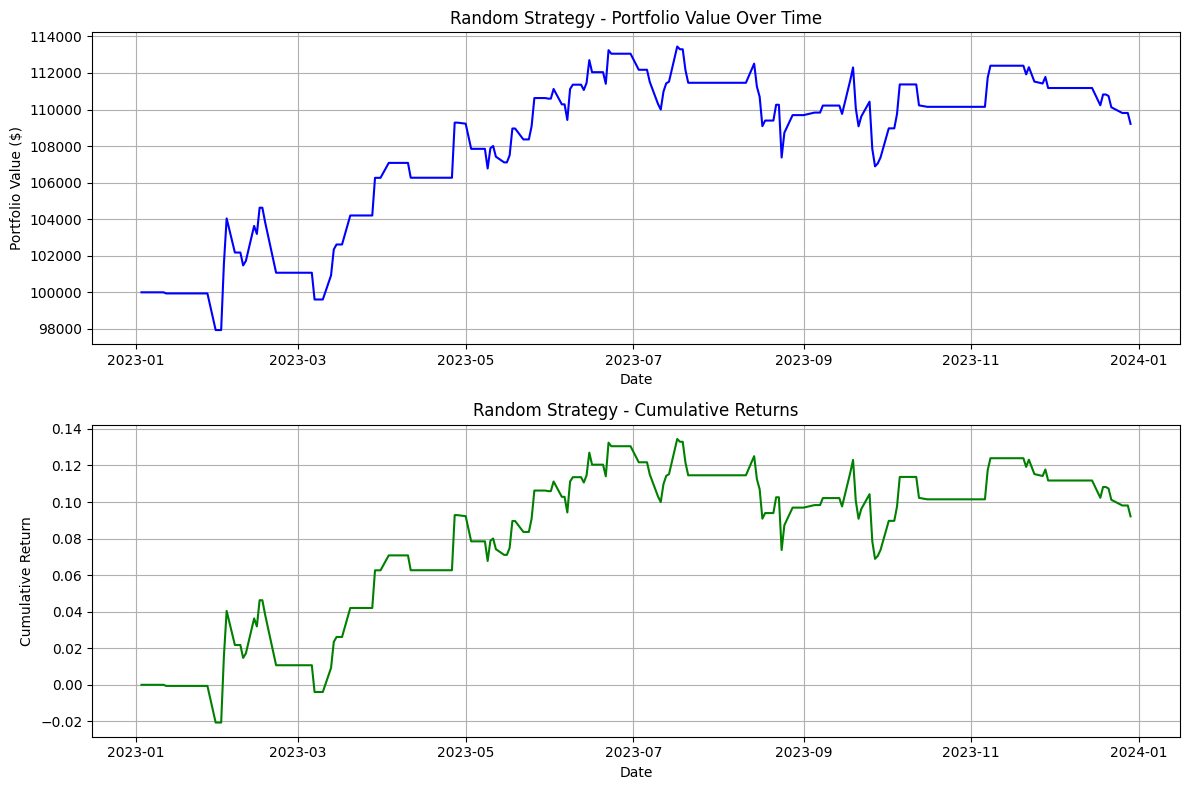

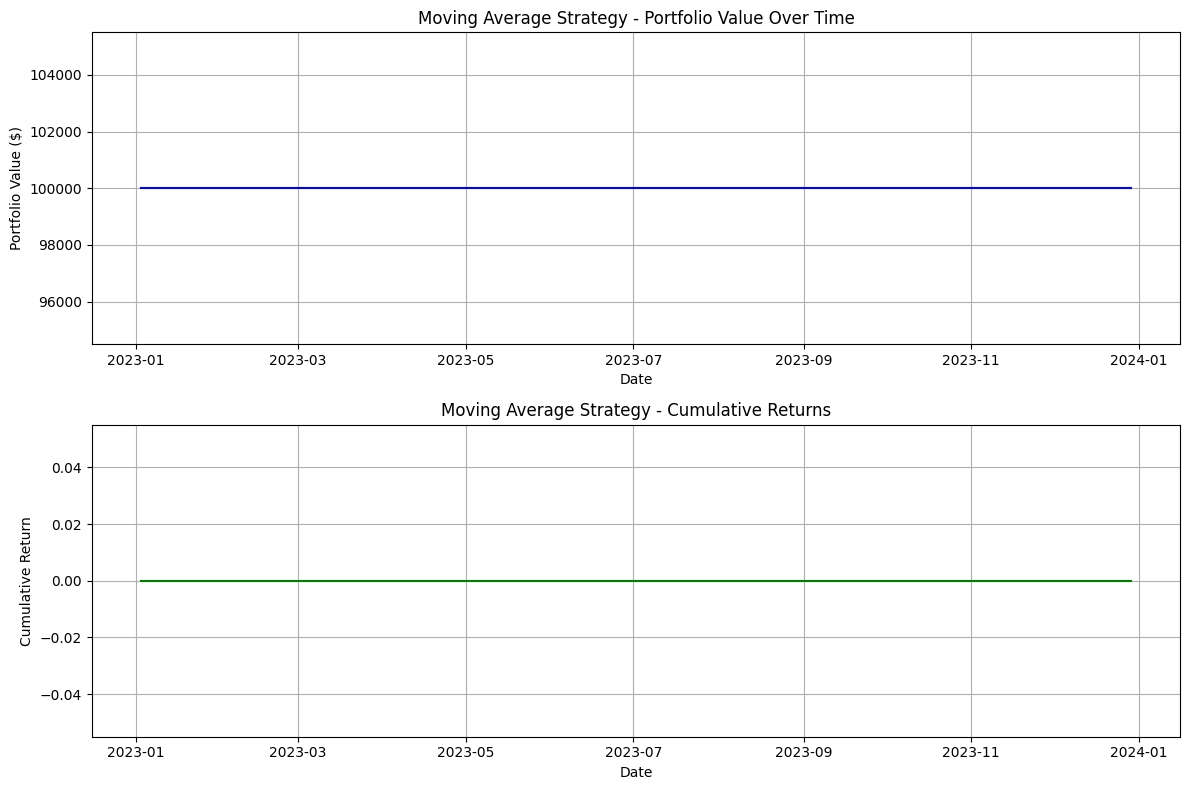

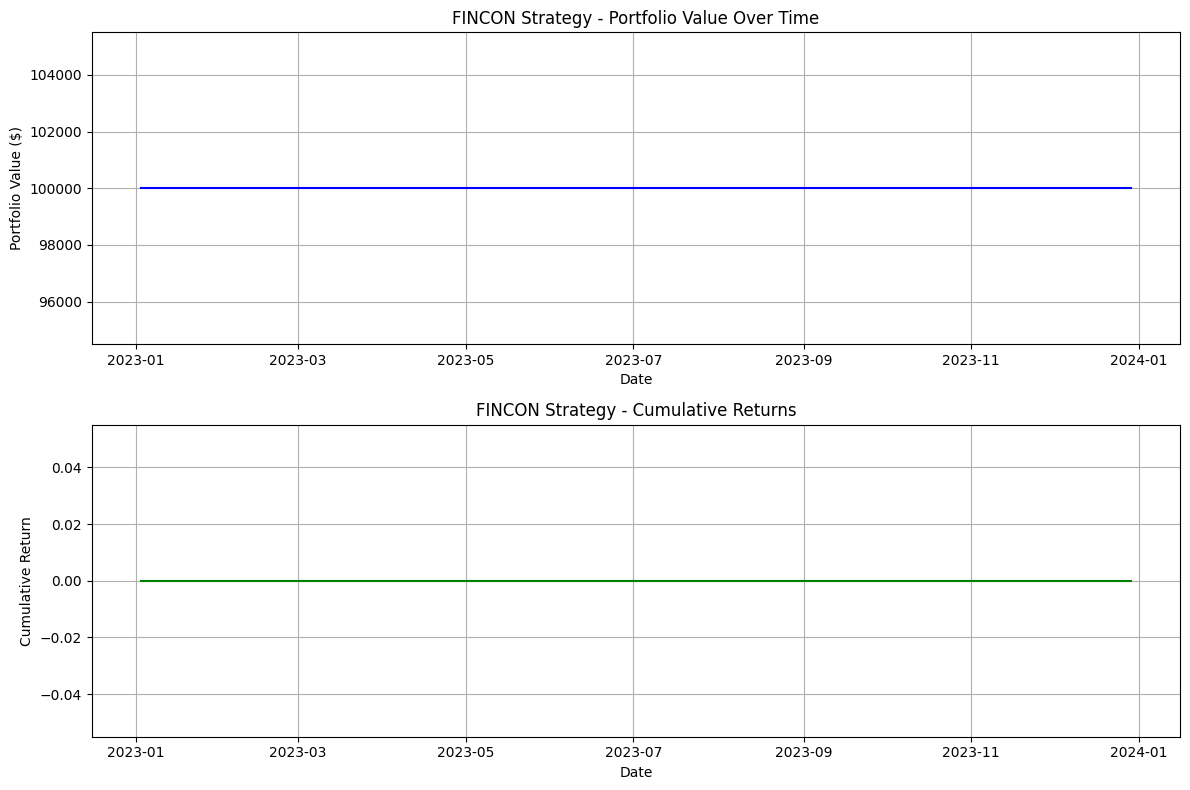

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import openai
import re
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib
from typing import Dict, List

# Replace with your actual OpenAI API key
openai.api_key = "sk-proj-ppMoAqZfoX35JduabVIST3BlbkFJEzhAS21mxB5wMemtX5N7"

# Choose a currently available OpenAI model.  "gpt-3.5-turbo-instruct" is a good alternative.
MODEL_NAME = "gpt-3.5-turbo-instruct"

# -----------------------------------------------------------------------------
# 1. Data Sources (SEC EDGAR remains from prior code)
# -----------------------------------------------------------------------------

def get_financial_report(ticker: str, filing_type: str = '10-K', year: int = 2023) -> str:
    """
    Получает финансовые отчеты из базы данных SEC EDGAR с обходом защиты от ботов.
    """
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
        'Accept-Encoding': 'gzip, deflate'
    }

    try:
        # 1. Поиск отчетов
        base_url = "https://www.sec.gov/cgi-bin/browse-edgar"
        params = {
            'action': 'getcompany',
            'CIK': ticker,
            'type': filing_type,
            'dateb': f'{year}1231',
            'owner': 'exclude',
            'count': '100'
        }

        response = requests.get(base_url, headers=headers, params=params, timeout=10)
        response.raise_for_status()

        # 2. Парсинг страницы результатов
        soup = BeautifulSoup(response.text, 'html.parser')
        filing_link = soup.select_one('table.tableFile2 td a[href*="/Archives/edgar/data/"]')
        if not filing_link:
            return "Отчет не найден"

        # 3. Получение документа
        doc_response = requests.get(
            f"https://www.sec.gov{filing_link['href']}",
            headers=headers,
            timeout=10
        )
        doc_response.raise_for_status()

        # 4. Извлечение текста
        doc_soup = BeautifulSoup(doc_response.text, 'html.parser')
        return doc_soup.get_text(separator='\n', strip=True)[:10000]

    except requests.exceptions.RequestException as e:
        return f"Ошибка запроса: {str(e)}"
    except Exception as e:
        return f"Ошибка обработки: {str(e)}"

def get_stock_data(ticker: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Gets historical stock data from Yahoo Finance and returns a DataFrame.
    """
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if not data.empty:
            # Ensure the DataFrame has a DatetimeIndex
            data.index = pd.to_datetime(data.index)
            data.index.name = 'Date'
            return data
        else:
            print(f"No stock data found for {ticker} in the specified date range.")
            return None
    except Exception as e:
        print(f"Error getting stock data for {ticker}: {e}")
        return None

def get_financial_news(ticker: str, api_key: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Gets financial news articles from News API and returns a DataFrame.
    """
    url = f"https://newsapi.org/v2/everything?q={ticker}&from={start_date}&to={end_date}&sortBy=relevancy&apiKey={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        articles = data['articles']
        df = pd.DataFrame(articles)

        if not df.empty:
            # Select and rename columns
            df = df[['title', 'description', 'content', 'publishedAt']]
            df.rename(columns={'title': 'Title', 'description': 'Description', 'content': 'Content', 'publishedAt': 'PublishedAt'}, inplace=True)

            # Convert 'PublishedAt' to datetime
            df['PublishedAt'] = pd.to_datetime(df['PublishedAt'])

            return df
        else:
            print(f"No news articles found for {ticker} in the specified date range.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error getting news for {ticker}: {e}")
        return None
    except KeyError:
        print(f"Error parsing news data for {ticker}: Invalid response format")
        return None

def get_earnings_call_transcript(ticker: str) -> str:
    """
    Scrapes earnings call transcripts from a website (example: Seeking Alpha).
    This is a simplified example and might need adjustments based on the website structure.
    Returns raw text.
    """
    url = f"https://seekingalpha.com/symbol/{ticker}/earnings/transcripts"  # Example URL structure
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Example: Find the transcript content (adjust based on actual HTML structure)
        transcript_div = soup.find('div', class_='article-body')  # Replace with actual class
        if transcript_div:
            transcript = transcript_div.get_text(separator='\n', strip=True)
            return transcript
        else:
            return "Transcript not found on the page."

    except requests.exceptions.RequestException as e:
        print(f"Error getting earnings call transcript for {ticker}: {e}")
        return "Error fetching transcript."
    except Exception as e:
        print(f"Error processing earnings call transcript for {ticker}: {e}")
        return "Error processing transcript."

def get_alpaca_news(ticker: str, alpaca_api_key: str, alpaca_secret_key: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Gets news articles from the Alpaca News API and returns a DataFrame.
    """
    url = "https://data.alpaca.markets/v1beta1/news"
    headers = {
        "APCA-API-KEY-ID": alpaca_api_key,
        "APCA-API-SECRET-KEY": alpaca_secret_key
    }
    params = {
        "symbols": ticker,
        "start": start_date,
        "end": end_date
    }

    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()
        news_data = response.json()

        articles = news_data.get('news', [])  # Safely get the 'news' list
        df = pd.DataFrame(articles)

        if not df.empty:
            # Select and rename columns
            df = df[['headline', 'summary', 'created_at', 'source']]
            df.rename(columns={'headline': 'Title', 'summary': 'Description', 'created_at': 'PublishedAt', 'source': 'Source'}, inplace=True)

            # Convert 'PublishedAt' to datetime
            df['PublishedAt'] = pd.to_datetime(df['PublishedAt'])
            return df
        else:
            print(f"No Alpaca news found for {ticker} in the specified date range.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error getting Alpaca news for {ticker}: {e}")
        return None
    except (KeyError, TypeError) as e:
        print(f"Error parsing Alpaca news data for {ticker}: {e}")
        return None

# -----------------------------------------------------------------------------
# 2. Analyst Agents
# -----------------------------------------------------------------------------

class DataAnalysisAnalyst:
    """
    Computes financial metrics from tabular time series data.
    """
    def __init__(self):
        self.name = "DataAnalysisAnalyst"
        self.description = "Computes financial metrics from tabular time series data."

    def analyze(self, time_series_data: pd.DataFrame) -> dict:  # Return a dict
        """
        Computes momentum from the time series data.
        """
        try:
            # Calculate momentum (example: 3-month momentum)
            momentum = self.calculate_momentum(time_series_data['Close'], window=60)  # Roughly 3 months
            return {"momentum": momentum} # Return as a dictionary
        except Exception as e:
            print(f"Error analyzing time series data: {e}")
            return {"momentum": None} # Return None if there's an error

    def calculate_momentum(self, prices: pd.Series, window: int) -> float:
        """
        Calculates momentum over a given window.
        """
        if len(prices) < window:
            return 0.0  # Not enough data

        return prices.iloc[-1] / prices.iloc[-window] - 1

class NewsSentimentAnalyst:
    """
    Analyzes news articles and extracts sentiment using OpenAI.
    """
    def __init__(self):
        self.name = "NewsSentimentAnalyst"
        self.description = "Extracts sentiment from news articles using OpenAI."

    def analyze(self, news_headline: str) -> float:
        """
        Analyzes the news headline and returns a sentiment score (-1 to 1).
        """
        try:
            response = openai.completions.create(
                model=MODEL_NAME,  # Use the chosen model
                prompt=f"What is the sentiment of this news headline: {news_headline}? Answer strictly with one of these words: Positive, Negative, or Neutral.",
                max_tokens=10,  # Reduced max_tokens
                n=1,
                stop=None,
                temperature=0.2,
            )
            sentiment_text = response.choices[0].text.strip().lower()

            if "positive" in sentiment_text:
                return 1.0
            elif "negative" in sentiment_text:
                return -1.0
            else:
                return 0.0 # Neutral
        except Exception as e:
            print(f"Error analyzing sentiment: {e}")
            return 0.0  # Default to neutral on error

class FilingAnalysisAgent:
    """
    Analyzes 10-Q/10-K filings and extracts key information.
    """
    def __init__(self):
        self.name = "FilingAnalysisAgent"
        self.description = "Extracts key information from 10-Q/10-K filings using LLMs."

    def analyze(self, filing_text: str) -> Dict[str, str]:
        """
        Analyzes the filing text and returns key information in a dictionary.
        """
        try:
            # 1. Extract Key Financial Metrics (Example)
            revenue = self.extract_financial_metric(filing_text, "Revenue")
            net_income = self.extract_financial_metric(filing_text, "Net Income")

            # 2. Extract Management Discussion (Example)
            management_discussion = self.extract_management_discussion(filing_text)

            # 3. Extract Risk Factors (Example)
            risk_factors = self.extract_risk_factors(filing_text)

            return {
                "Revenue": revenue,
                "Net Income": net_income,
                "Management Discussion": management_discussion,
                "Risk Factors": risk_factors,
            }

        except Exception as e:
            print(f"Error analyzing filing: {e}")
            return {}

    def extract_financial_metric(self, filing_text: str, metric_name: str) -> str:
        """
        Extracts a specific financial metric from the filing text using LLMs.
        """
        try:
            response = openai.completions.create(
                model=MODEL_NAME,
                prompt=f"Extract the value of {metric_name} from the following financial report:\n\n{filing_text}\n\nValue:",
                max_tokens=50,
                n=1,
                stop=None,
                temperature=0.3,
            )
            return response.choices[0].text.strip()
        except Exception as e:
            print(f"Error extracting {metric_name}: {e}")
            return "N/A"

    def extract_management_discussion(self, filing_text: str) -> str:
          """
          Extracts key points from the Management Discussion and Analysis (MD&A) section.
          """
          try:
              response = openai.completions.create(
                  model=MODEL_NAME,
                  prompt=f"Summarize the key points from the Management Discussion and Analysis (MD&A) section of the following financial report:\n\n{filing_text}\n\nSummary:",
                  max_tokens=200,
                  n=1,
                  stop=None,
                  temperature=0.4,
              )
              return response.choices[0].text.strip()
          except Exception as e:
              print(f"Error extracting MD&A: {e}")
              return "N/A"

    def extract_risk_factors(self, filing_text: str) -> str:
        """
        Identifies and lists the key risk factors discussed in the filing.
        """
        try:
            response = openai.completions.create(
                model=MODEL_NAME,
                prompt=f"List the key risk factors discussed in the following financial report:\n\n{filing_text}\n\nRisk Factors:",
                max_tokens=150,
                n=1,
                stop=None,
                temperature=0.3,
            )
            return response.choices[0].text.strip()
        except Exception as e:
            print(f"Error extracting risk factors: {e}")
            return "N/A"

# -----------------------------------------------------------------------------
# 3. Trading Strategies
# -----------------------------------------------------------------------------

def random_trading_strategy(data: pd.DataFrame) -> pd.DataFrame:
    """
    A random trading strategy for comparison.
    """
    signals = np.random.choice([-1, 0, 1], size=len(data)) # -1: sell, 0: hold, 1: buy
    data['Signal'] = signals
    return data

def moving_average_strategy(data: pd.DataFrame, short_window: int, long_window: int) -> pd.DataFrame:
    """
    A simple moving average crossover strategy.
    """
    data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window).mean()
    data['Signal'] = 0.0
    data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1.0, 0.0)
    data['Position'] = data['Signal'].diff()
    return data

def fincon_trading_strategy(data: pd.DataFrame, momentum: float, news_sentiment: float) -> pd.DataFrame:
    """
    A simplified FINCON trading strategy that uses momentum and news sentiment.
    """
    data['Signal'] = 0.0  # Default to hold

    # Combine momentum and sentiment
    if momentum is not None and news_sentiment is not None:
        # Create a combined signal Series with the same index as the data DataFrame
        combined_signal = pd.Series(momentum + news_sentiment, index=data.index) # Changed this line!

        # Use .loc to set the 'Signal' column based on the combined_signal
        data.loc[combined_signal > 0.2, 'Signal'] = 1  # Buy
        data.loc[combined_signal < -0.2, 'Signal'] = -1  # Sell

    return data

# -----------------------------------------------------------------------------
# 4. Performance Evaluation
# -----------------------------------------------------------------------------

def evaluate_strategy(data: pd.DataFrame, initial_capital: float = 100000) -> dict:
    """
    Evaluates the performance of a trading strategy.
    """
    # Initialize positions and portfolio DataFrames
    positions = pd.DataFrame(index=data.index, data={'Holdings': np.zeros(len(data))})
    portfolio = pd.DataFrame(index=data.index, data={'Cash': np.zeros(len(data)), 'Total': np.zeros(len(data))})

    # Set initial portfolio values
    portfolio['Cash'].iloc[0] = initial_capital
    portfolio['Total'].iloc[0] = initial_capital

    # Add a 'Shares' column
    data['Shares'] = 0

    shares = 0
    cumulative_returns = [0.0]  # Initialize cumulative returns list
    for i in range(1, len(data)):
        signal = data['Signal'].iloc[i]
        closing_price = data['Close'].iloc[i]

        if signal == 1:  # Buy
            shares_to_buy = int(portfolio['Cash'].iloc[i-1] / closing_price)
            shares += shares_to_buy
            portfolio['Cash'].iloc[i] = portfolio['Cash'].iloc[i-1] - shares_to_buy * closing_price
            data['Shares'].iloc[i] = shares_to_buy  # Record the number of shares bought
        elif signal == -1: # Sell
            portfolio['Cash'].iloc[i] = portfolio['Cash'].iloc[i-1] + shares * closing_price
            shares = 0
            data['Shares'].iloc[i] = -shares # Record selling all shares (negative value)
        else: # Hold
            portfolio['Cash'].iloc[i] = portfolio['Cash'].iloc[i-1]

        positions['Holdings'].iloc[i] = shares * closing_price
        portfolio['Total'].iloc[i] = portfolio['Cash'].iloc[i] + positions['Holdings'].iloc[i]

        # Calculate cumulative return
        cumulative_return = (portfolio['Total'].iloc[i] - initial_capital) / initial_capital
        cumulative_returns.append(cumulative_return)

    returns = portfolio['Total'].pct_change()
    sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std()) if returns.std() > 0 else 0

    # Calculate drawdown
    peak = portfolio['Total'].expanding().max()
    drawdown = (portfolio['Total'] - peak) / peak
    max_drawdown = drawdown.min()

    final_portfolio_value = portfolio['Total'].iloc[-1]
    profit = final_portfolio_value - initial_capital

    # Add cumulative returns to the results dictionary
    results = {
        'Final Portfolio Value': final_portfolio_value,
        'Profit': profit,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown,
        'Portfolio': portfolio, # Return the portfolio DataFrame
        'Data': data, # Return the trading data DataFrame
        'Cumulative Returns': cumulative_returns  # Added cumulative returns
    }
    return results

# -----------------------------------------------------------------------------
# 5. Plotting Function
# -----------------------------------------------------------------------------

def plot_trading_results(strategy_name: str, results: dict):
    """
    Plots the portfolio value and cumulative returns for a given trading strategy.
    """
    portfolio = results['Portfolio']
    data = results['Data']
    cumulative_returns = results['Cumulative Returns'] # Get the returns

    # Create figure and axes
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    # Plot portfolio value
    axes[0].plot(portfolio['Total'], label=strategy_name, color='blue')
    axes[0].set_title(f'{strategy_name} - Portfolio Value Over Time')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Portfolio Value ($)')
    axes[0].grid(True)

    # Plot cumulative returns
    axes[1].plot(data.index, cumulative_returns, label=strategy_name, color='green')  # Fixed line here
    axes[1].set_title(f'{strategy_name} - Cumulative Returns')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Cumulative Return')
    axes[1].grid(True)

    # Add trade markers to portfolio value plot
    for i in range(1, len(data)):
        if data['Shares'].iloc[i] != 0:  # If a trade occurred
            axes[0].axvline(x=data.index[i], color='red', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------------
# 6. Main Execution
# -----------------------------------------------------------------------------

if __name__ == "__main__":
    # Define the ticker and date range
    ticker = "AAPL"
    start_date = "2023-01-01"
    end_date = "2024-01-01"

    # 1. Get stock data
    stock_data = get_stock_data(ticker, start_date, end_date)
    if stock_data is not None:
        print(f"Stock Data for {ticker}:\n", stock_data.head())

        # 2. Get financial news
        news_api_key = "fb63178174ab47459a26782d7f798d0e"
        news_articles = get_financial_news(ticker, news_api_key, start_date, end_date)

        # 3. Get 10K filing
        filing_agent = FilingAnalysisAgent()
        filing_text = get_financial_report(ticker, filing_type='10-K', year=2023)

        # 4. Analyze the filing
        filing_data = filing_agent.analyze(filing_text)
        print(f"Filing Data: {filing_data}")

        # 5. Data Analysis with DataAnalysisAnalyst
        data_analysis_analyst = DataAnalysisAnalyst()
        analysis_result = data_analysis_analyst.analyze(stock_data)
        momentum = analysis_result["momentum"] # Extract momentum
        print(f"Momentum: {momentum}")

        # 6. News Sentiment Analysis
        news_sentiment = 0.0  # Default
        if news_articles is not None and not news_articles.empty:
            news_sentiment_analyst = NewsSentimentAnalyst()
            #  For simplicity, use sentiment of the *latest* article.  A more robust approach would average over multiple articles.
            news_sentiment = news_sentiment_analyst.analyze(news_articles['Title'].iloc[-1])  # Analyze the latest headline
            print(f"News Sentiment: {news_sentiment}")

        # 7. Implement Trading Strategies
        # a. Random Trading Strategy
        random_data = stock_data.copy()
        random_data = random_trading_strategy(random_data)

        # b. Moving Average Strategy
        ma_data = stock_data.copy()
        ma_data = moving_average_strategy(ma_data, short_window=20, long_window=50)

        # c. FINCON (Simplified)
        fincon_data = stock_data.copy()
        fincon_data = fincon_trading_strategy(fincon_data, momentum, news_sentiment)

        # 8. Evaluate Strategies
        print("\nEvaluating Random Trading Strategy:")
        random_results = evaluate_strategy(random_data)
        print(random_results)

        print("\nEvaluating Moving Average Strategy:")
        ma_results = evaluate_strategy(ma_data)
        print(ma_results)

        print("\nEvaluating FINCON (Simplified) Strategy:")
        fincon_results = evaluate_strategy(fincon_data)
        print(fincon_results)

        # 9. Plot Results
        plot_trading_results("Random Strategy", random_results)
        plot_trading_results("Moving Average Strategy", ma_results)
        plot_trading_results("FINCON Strategy", fincon_results)


[*********************100%***********************]  1 of 1 completed


Stock Data for AAPL:
 Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.632530  129.395518  122.742873  128.782649  112117500
2023-01-04  124.907700  127.181268  123.642412  125.431607   89113600
2023-01-05  123.583099  126.301493  123.326093  125.668849   80962700
2023-01-06  128.130219  128.792516  123.454587  124.561717   87754700
2023-01-09  128.654144  131.876686  128.397138  128.970474   70790800
Error getting news for AAPL: 426 Client Error: Upgrade Required for url: https://newsapi.org/v2/everything?q=AAPL&from=2023-01-01&to=2024-01-01&sortBy=relevancy&apiKey=fb63178174ab47459a26782d7f798d0e
Filing Data: {'Revenue': 'N/A', 'Net Income': 'Unable to extract.', 'Management Discussion': "The Management Discussion and Analysis (MD&A) section of the financial report for Apple Inc. discusses the company's financ

<ipython-input-5-7213aa3cad0c>:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1.0, 0.0)
<ipython-input-5-7213aa3cad0c>:390: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perfor

{'Final Portfolio Value': np.float64(124593.14479064941), 'Profit': np.float64(24593.144790649414), 'Sharpe Ratio': np.float64(1.6971403763959123), 'Max Drawdown': -0.09295871676062842, 'Portfolio':                      Cash          Total
Date                                    
2023-01-03  100000.000000  100000.000000
2023-01-04  100000.000000  100000.000000
2023-01-05      21.272614  100000.000000
2023-01-06  103678.619385  103678.619385
2023-01-09  103678.619385  103678.619385
...                   ...            ...
2023-12-22      94.355392  124606.008575
2023-12-26      94.355392  124252.279175
2023-12-27      94.355392  124316.588226
2023-12-28  124593.144791  124593.144791
2023-12-29  124593.144791  124593.144791

[250 rows x 2 columns], 'Data': Price            Close        High         Low        Open     Volume Signal  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL          
Date                                                                       

<ipython-input-5-7213aa3cad0c>:407: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  portfolio['Cash'].iloc[0] = initial_capital
<ipython-input-5-7213aa3cad0c>:408: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You

{'Final Portfolio Value': np.float64(100000.0), 'Profit': np.float64(0.0), 'Sharpe Ratio': 0, 'Max Drawdown': 0.0, 'Portfolio':                 Cash     Total
Date                          
2023-01-03  100000.0  100000.0
2023-01-04  100000.0  100000.0
2023-01-05  100000.0  100000.0
2023-01-06  100000.0  100000.0
2023-01-09  100000.0  100000.0
...              ...       ...
2023-12-22  100000.0  100000.0
2023-12-26  100000.0  100000.0
2023-12-27  100000.0  100000.0
2023-12-28  100000.0  100000.0
2023-12-29  100000.0  100000.0

[250 rows x 2 columns], 'Data': Price            Close        High         Low        Open     Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL   
Date                                                                    
2023-01-03  123.632530  129.395518  122.742873  128.782649  112117500   
2023-01-04  124.907700  127.181268  123.642412  125.431607   89113600   
2023-01-05  123.583099  126.301493  123.326093  125.668849   80962700  

<ipython-input-5-7213aa3cad0c>:407: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  portfolio['Cash'].iloc[0] = initial_capital
<ipython-input-5-7213aa3cad0c>:408: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You

{'Final Portfolio Value': np.float64(100000.0), 'Profit': np.float64(0.0), 'Sharpe Ratio': 0, 'Max Drawdown': 0.0, 'Portfolio':                 Cash     Total
Date                          
2023-01-03  100000.0  100000.0
2023-01-04  100000.0  100000.0
2023-01-05  100000.0  100000.0
2023-01-06  100000.0  100000.0
2023-01-09  100000.0  100000.0
...              ...       ...
2023-12-22  100000.0  100000.0
2023-12-26  100000.0  100000.0
2023-12-27  100000.0  100000.0
2023-12-28  100000.0  100000.0
2023-12-29  100000.0  100000.0

[250 rows x 2 columns], 'Data': Price            Close        High         Low        Open     Volume Signal  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL          
Date                                                                           
2023-01-03  123.632530  129.395518  122.742873  128.782649  112117500    0.0   
2023-01-04  124.907700  127.181268  123.642412  125.431607   89113600    0.0   
2023-01-05  123.583099  126.301493  

<ipython-input-5-7213aa3cad0c>:407: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  portfolio['Cash'].iloc[0] = initial_capital
<ipython-input-5-7213aa3cad0c>:408: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You

{'Final Portfolio Value': np.float64(100000.0), 'Profit': np.float64(0.0), 'Sharpe Ratio': 0, 'Max Drawdown': 0.0, 'Portfolio':                 Cash     Total
Date                          
2023-01-03  100000.0  100000.0
2023-01-04  100000.0  100000.0
2023-01-05  100000.0  100000.0
2023-01-06  100000.0  100000.0
2023-01-09  100000.0  100000.0
...              ...       ...
2023-12-22  100000.0  100000.0
2023-12-26  100000.0  100000.0
2023-12-27  100000.0  100000.0
2023-12-28  100000.0  100000.0
2023-12-29  100000.0  100000.0

[250 rows x 2 columns], 'Data': Price            Close        High         Low        Open     Volume Signal  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL          
Date                                                                           
2023-01-03  123.632530  129.395518  122.742873  128.782649  112117500      0   
2023-01-04  124.907700  127.181268  123.642412  125.431607   89113600      0   
2023-01-05  123.583099  126.301493  

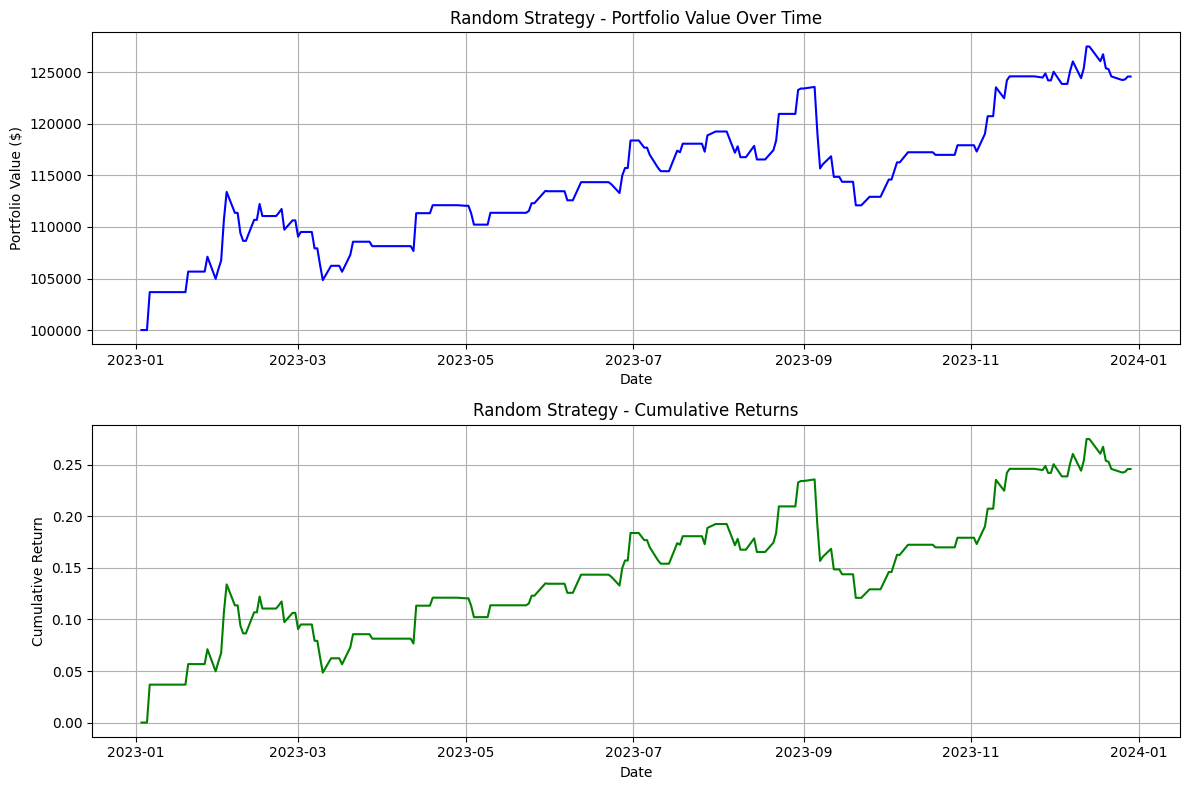

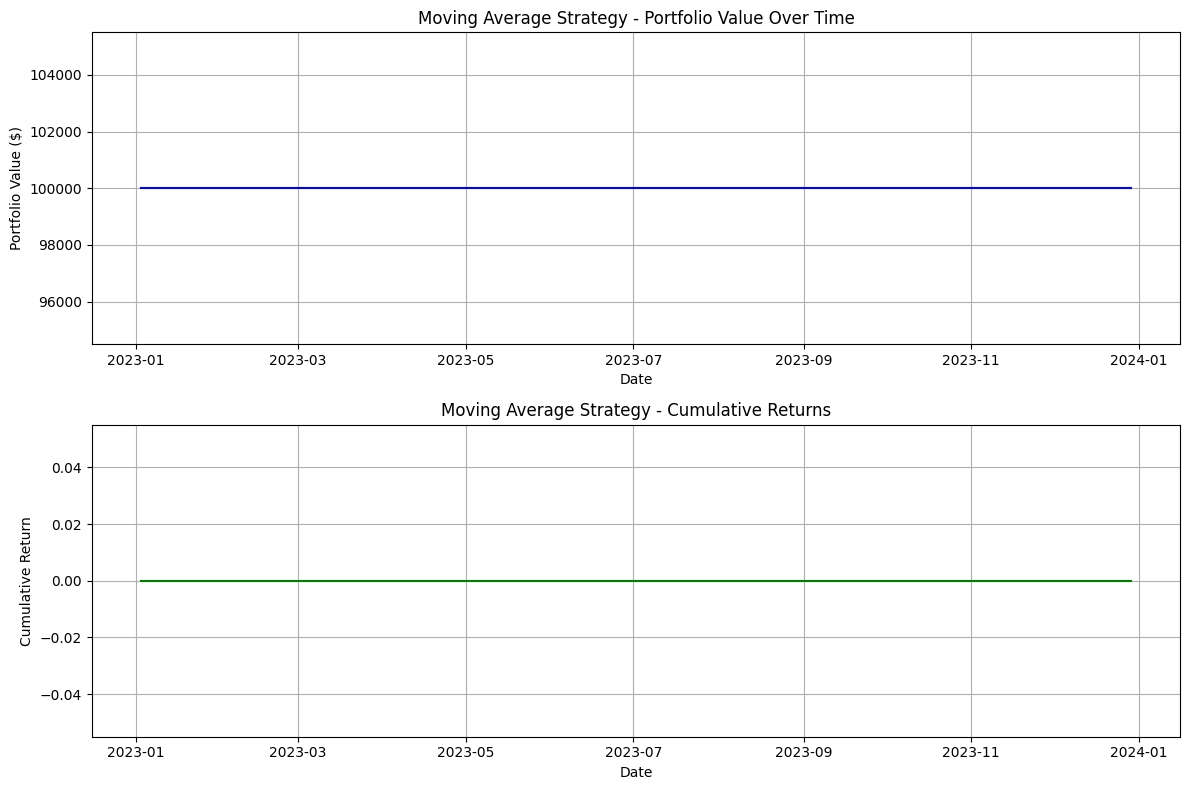

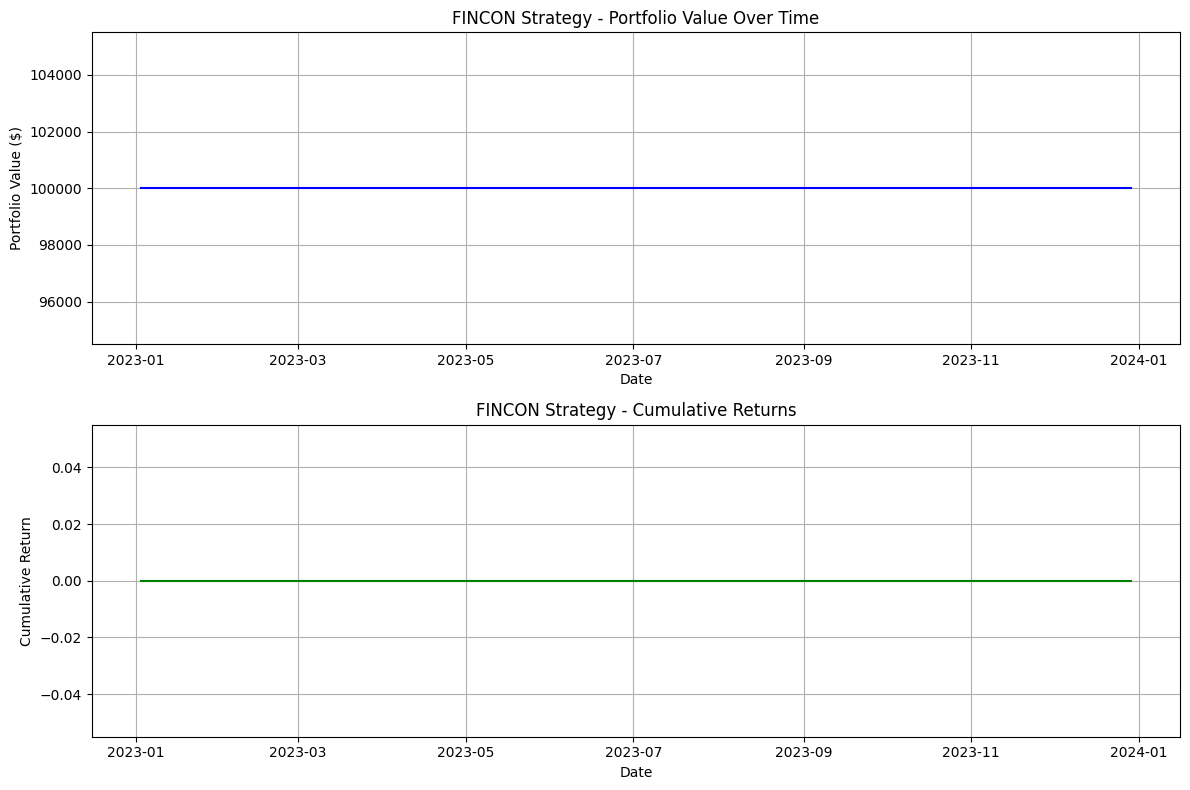

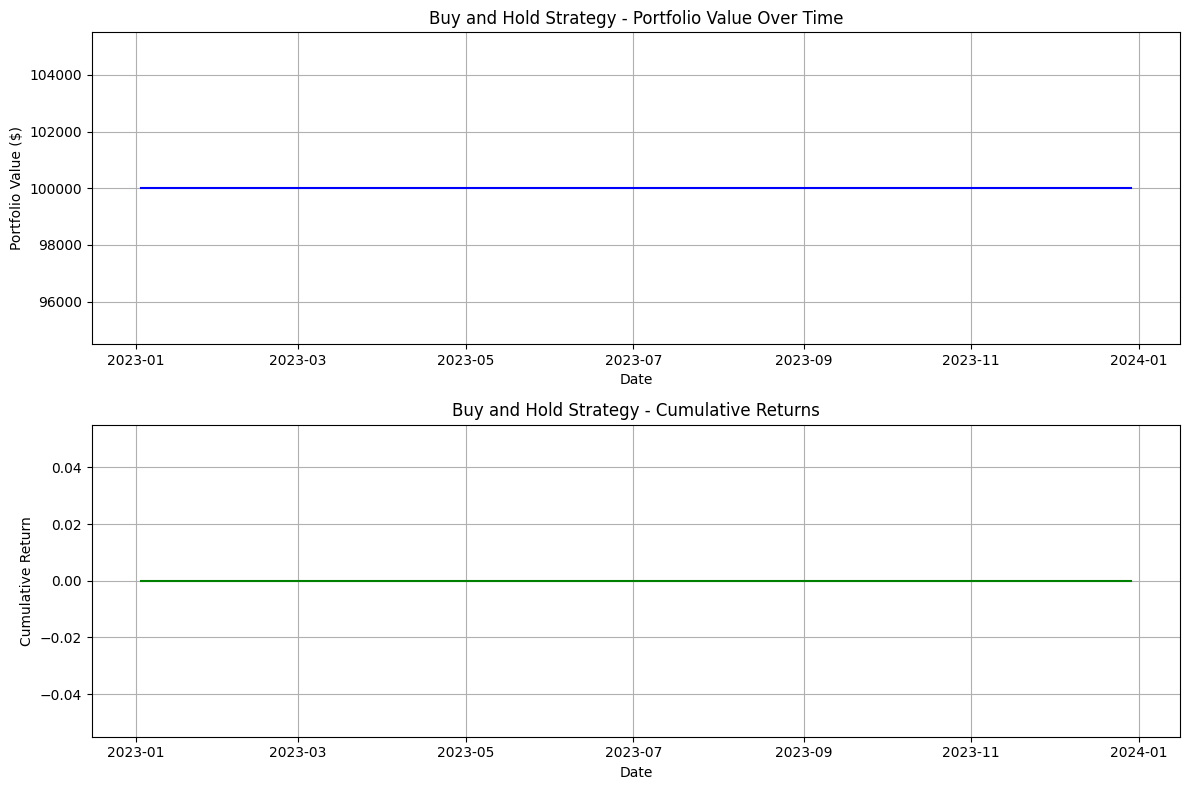

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import openai
import re
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib
from typing import Dict, List

# Replace with your actual OpenAI API key
openai.api_key = "sk-proj-ppMoAqZfoX35JduabVIST3BlbkFJEzhAS21mxB5wMemtX5N7"

# Choose a currently available OpenAI model.  "gpt-3.5-turbo-instruct" is a good alternative.
MODEL_NAME = "gpt-3.5-turbo-instruct"

# -----------------------------------------------------------------------------
# 1. Data Sources (SEC EDGAR remains from prior code)
# -----------------------------------------------------------------------------

def get_financial_report(ticker: str, filing_type: str = '10-K', year: int = 2023) -> str:
    """
    Получает финансовые отчеты из базы данных SEC EDGAR с обходом защиты от ботов.
    """
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
        'Accept-Encoding': 'gzip, deflate'
    }

    try:
        # 1. Поиск отчетов
        base_url = "https://www.sec.gov/cgi-bin/browse-edgar"
        params = {
            'action': 'getcompany',
            'CIK': ticker,
            'type': filing_type,
            'dateb': f'{year}1231',
            'owner': 'exclude',
            'count': '100'
        }

        response = requests.get(base_url, headers=headers, params=params, timeout=10)
        response.raise_for_status()

        # 2. Парсинг страницы результатов
        soup = BeautifulSoup(response.text, 'html.parser')
        filing_link = soup.select_one('table.tableFile2 td a[href*="/Archives/edgar/data/"]')
        if not filing_link:
            return "Отчет не найден"

        # 3. Получение документа
        doc_response = requests.get(
            f"https://www.sec.gov{filing_link['href']}",
            headers=headers,
            timeout=10
        )
        doc_response.raise_for_status()

        # 4. Извлечение текста
        doc_soup = BeautifulSoup(doc_response.text, 'html.parser')
        return doc_soup.get_text(separator='\n', strip=True)[:10000]

    except requests.exceptions.RequestException as e:
        return f"Ошибка запроса: {str(e)}"
    except Exception as e:
        return f"Ошибка обработки: {str(e)}"

def get_stock_data(ticker: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Gets historical stock data from Yahoo Finance and returns a DataFrame.
    """
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if not data.empty:
            # Ensure the DataFrame has a DatetimeIndex
            data.index = pd.to_datetime(data.index)
            data.index.name = 'Date'
            return data
        else:
            print(f"No stock data found for {ticker} in the specified date range.")
            return None
    except Exception as e:
        print(f"Error getting stock data for {ticker}: {e}")
        return None

def get_financial_news(ticker: str, api_key: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Gets financial news articles from News API and returns a DataFrame.
    """
    url = f"https://newsapi.org/v2/everything?q={ticker}&from={start_date}&to={end_date}&sortBy=relevancy&apiKey={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        articles = data['articles']
        df = pd.DataFrame(articles)

        if not df.empty:
            # Select and rename columns
            df = df[['title', 'description', 'content', 'publishedAt']]
            df.rename(columns={'title': 'Title', 'description': 'Description', 'content': 'Content', 'publishedAt': 'PublishedAt'}, inplace=True)

            # Convert 'PublishedAt' to datetime
            df['PublishedAt'] = pd.to_datetime(df['PublishedAt'])

            return df
        else:
            print(f"No news articles found for {ticker} in the specified date range.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error getting news for {ticker}: {e}")
        return None
    except KeyError:
        print(f"Error parsing news data for {ticker}: Invalid response format")
        return None

def get_earnings_call_transcript(ticker: str) -> str:
    """
    Scrapes earnings call transcripts from a website (example: Seeking Alpha).
    This is a simplified example and might need adjustments based on the website structure.
    Returns raw text.
    """
    url = f"https://seekingalpha.com/symbol/{ticker}/earnings/transcripts"  # Example URL structure
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Example: Find the transcript content (adjust based on actual HTML structure)
        transcript_div = soup.find('div', class_='article-body')  # Replace with actual class
        if transcript_div:
            transcript = transcript_div.get_text(separator='\n', strip=True)
            return transcript
        else:
            return "Transcript not found on the page."

    except requests.exceptions.RequestException as e:
        print(f"Error getting earnings call transcript for {ticker}: {e}")
        return "Error fetching transcript."
    except Exception as e:
        print(f"Error processing earnings call transcript for {ticker}: {e}")
        return "Error processing transcript."

def get_alpaca_news(ticker: str, alpaca_api_key: str, alpaca_secret_key: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Gets news articles from the Alpaca News API and returns a DataFrame.
    """
    url = "https://data.alpaca.markets/v1beta1/news"
    headers = {
        "APCA-API-KEY-ID": alpaca_api_key,
        "APCA-API-SECRET-KEY": alpaca_secret_key
    }
    params = {
        "symbols": ticker,
        "start": start_date,
        "end": end_date
    }

    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()
        news_data = response.json()

        articles = news_data.get('news', [])  # Safely get the 'news' list
        df = pd.DataFrame(articles)

        if not df.empty:
            # Select and rename columns
            df = df[['headline', 'summary', 'created_at', 'source']]
            df.rename(columns={'headline': 'Title', 'summary': 'Description', 'created_at': 'PublishedAt', 'source': 'Source'}, inplace=True)

            # Convert 'PublishedAt' to datetime
            df['PublishedAt'] = pd.to_datetime(df['PublishedAt'])
            return df
        else:
            print(f"No Alpaca news found for {ticker} in the specified date range.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error getting Alpaca news for {ticker}: {e}")
        return None
    except (KeyError, TypeError) as e:
        print(f"Error parsing Alpaca news data for {ticker}: {e}")
        return None

# -----------------------------------------------------------------------------
# 2. Analyst Agents
# -----------------------------------------------------------------------------

class DataAnalysisAnalyst:
    """
    Computes financial metrics from tabular time series data.
    """
    def __init__(self):
        self.name = "DataAnalysisAnalyst"
        self.description = "Computes financial metrics from tabular time series data."

    def analyze(self, time_series_data: pd.DataFrame) -> dict:  # Return a dict
        """
        Computes momentum from the time series data.
        """
        try:
            # Calculate momentum (example: 3-month momentum)
            momentum = self.calculate_momentum(time_series_data['Close'], window=60)  # Roughly 3 months
            return {"momentum": momentum} # Return as a dictionary
        except Exception as e:
            print(f"Error analyzing time series data: {e}")
            return {"momentum": None} # Return None if there's an error

    def calculate_momentum(self, prices: pd.Series, window: int) -> float:
        """
        Calculates momentum over a given window.
        """
        if len(prices) < window:
            return 0.0  # Not enough data

        return prices.iloc[-1] / prices.iloc[-window] - 1

class NewsSentimentAnalyst:
    """
    Analyzes news articles and extracts sentiment using OpenAI.
    """
    def __init__(self):
        self.name = "NewsSentimentAnalyst"
        self.description = "Extracts sentiment from news articles using OpenAI."

    def analyze(self, news_headline: str) -> float:
        """
        Analyzes the news headline and returns a sentiment score (-1 to 1).
        """
        try:
            response = openai.completions.create(
                model=MODEL_NAME,  # Use the chosen model
                prompt=f"What is the sentiment of this news headline: {news_headline}? Answer strictly with one of these words: Positive, Negative, or Neutral.",
                max_tokens=10,  # Reduced max_tokens
                n=1,
                stop=None,
                temperature=0.2,
            )
            sentiment_text = response.choices[0].text.strip().lower()

            if "positive" in sentiment_text:
                return 1.0
            elif "negative" in sentiment_text:
                return -1.0
            else:
                return 0.0 # Neutral
        except Exception as e:
            print(f"Error analyzing sentiment: {e}")
            return 0.0  # Default to neutral on error

class FilingAnalysisAgent:
    """
    Analyzes 10-Q/10-K filings and extracts key information.
    """
    def __init__(self):
        self.name = "FilingAnalysisAgent"
        self.description = "Extracts key information from 10-Q/10-K filings using LLMs."

    def analyze(self, filing_text: str) -> Dict[str, str]:
        """
        Analyzes the filing text and returns key information in a dictionary.
        """
        try:
            # 1. Extract Key Financial Metrics (Example)
            revenue = self.extract_financial_metric(filing_text, "Revenue")
            net_income = self.extract_financial_metric(filing_text, "Net Income")

            # 2. Extract Management Discussion (Example)
            management_discussion = self.extract_management_discussion(filing_text)

            # 3. Extract Risk Factors (Example)
            risk_factors = self.extract_risk_factors(filing_text)

            return {
                "Revenue": revenue,
                "Net Income": net_income,
                "Management Discussion": management_discussion,
                "Risk Factors": risk_factors,
            }

        except Exception as e:
            print(f"Error analyzing filing: {e}")
            return {}

    def extract_financial_metric(self, filing_text: str, metric_name: str) -> str:
        """
        Extracts a specific financial metric from the filing text using LLMs.
        """
        try:
            response = openai.completions.create(
                model=MODEL_NAME,
                prompt=f"Extract the value of {metric_name} from the following financial report:\n\n{filing_text}\n\nValue:",
                max_tokens=50,
                n=1,
                stop=None,
                temperature=0.3,
            )
            return response.choices[0].text.strip()
        except Exception as e:
            print(f"Error extracting {metric_name}: {e}")
            return "N/A"

    def extract_management_discussion(self, filing_text: str) -> str:
          """
          Extracts key points from the Management Discussion and Analysis (MD&A) section.
          """
          try:
              response = openai.completions.create(
                  model=MODEL_NAME,
                  prompt=f"Summarize the key points from the Management Discussion and Analysis (MD&A) section of the following financial report:\n\n{filing_text}\n\nSummary:",
                  max_tokens=200,
                  n=1,
                  stop=None,
                  temperature=0.4,
              )
              return response.choices[0].text.strip()
          except Exception as e:
              print(f"Error extracting MD&A: {e}")
              return "N/A"

    def extract_risk_factors(self, filing_text: str) -> str:
        """
        Identifies and lists the key risk factors discussed in the filing.
        """
        try:
            response = openai.completions.create(
                model=MODEL_NAME,
                prompt=f"List the key risk factors discussed in the following financial report:\n\n{filing_text}\n\nRisk Factors:",
                max_tokens=150,
                n=1,
                stop=None,
                temperature=0.3,
            )
            return response.choices[0].text.strip()
        except Exception as e:
            print(f"Error extracting risk factors: {e}")
            return "N/A"

# -----------------------------------------------------------------------------
# 3. Trading Strategies
# -----------------------------------------------------------------------------

def random_trading_strategy(data: pd.DataFrame) -> pd.DataFrame:
    """
    A random trading strategy for comparison.
    """
    signals = np.random.choice([-1, 0, 1], size=len(data)) # -1: sell, 0: hold, 1: buy
    data['Signal'] = signals
    return data

def moving_average_strategy(data: pd.DataFrame, short_window: int, long_window: int) -> pd.DataFrame:
    """
    A simple moving average crossover strategy.
    """
    data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window).mean()
    data['Signal'] = 0.0
    data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1.0, 0.0)
    data['Position'] = data['Signal'].diff()
    return data

def fincon_trading_strategy(data: pd.DataFrame, momentum: float, news_sentiment: float) -> pd.DataFrame:
    """
    A simplified FINCON trading strategy that uses momentum and news sentiment.
    """
    data['Signal'] = 0.0  # Default to hold

    # Combine momentum and sentiment
    if momentum is not None and news_sentiment is not None:
        # Create a combined signal Series with the same index as the data DataFrame
        combined_signal = pd.Series(momentum + news_sentiment, index=data.index) # Changed this line!

        # Use .loc to set the 'Signal' column based on the combined_signal
        data.loc[combined_signal > 0.2, 'Signal'] = 1  # Buy
        data.loc[combined_signal < -0.2, 'Signal'] = -1  # Sell

    return data

def buy_and_hold_strategy(data: pd.DataFrame) -> pd.DataFrame:
    """
    A Buy and Hold strategy.
    """
    data['Signal'] = 0  # Default to hold

    # Buy at the beginning and hold till the end
    data['Signal'].iloc[0] = 1  # Buy signal on the first day

    return data

# -----------------------------------------------------------------------------
# 4. Performance Evaluation
# -----------------------------------------------------------------------------

def evaluate_strategy(data: pd.DataFrame, initial_capital: float = 100000) -> dict:
    """
    Evaluates the performance of a trading strategy.
    """
    # Initialize positions and portfolio DataFrames
    positions = pd.DataFrame(index=data.index, data={'Holdings': np.zeros(len(data))})
    portfolio = pd.DataFrame(index=data.index, data={'Cash': np.zeros(len(data)), 'Total': np.zeros(len(data))})

    # Set initial portfolio values
    portfolio['Cash'].iloc[0] = initial_capital
    portfolio['Total'].iloc[0] = initial_capital

    # Add a 'Shares' column
    data['Shares'] = 0

    shares = 0
    cumulative_returns = [0.0]  # Initialize cumulative returns list
    for i in range(1, len(data)):
        signal = data['Signal'].iloc[i]
        closing_price = data['Close'].iloc[i]

        if signal == 1:  # Buy
            shares_to_buy = int(portfolio['Cash'].iloc[i-1] / closing_price)
            shares += shares_to_buy
            portfolio['Cash'].iloc[i] = portfolio['Cash'].iloc[i-1] - shares_to_buy * closing_price
            data['Shares'].iloc[i] = shares_to_buy  # Record the number of shares bought
        elif signal == -1: # Sell
            portfolio['Cash'].iloc[i] = portfolio['Cash'].iloc[i-1] + shares * closing_price
            shares = 0
            data['Shares'].iloc[i] = -shares # Record selling all shares (negative value)
        else: # Hold
            portfolio['Cash'].iloc[i] = portfolio['Cash'].iloc[i-1]

        positions['Holdings'].iloc[i] = shares * closing_price
        portfolio['Total'].iloc[i] = portfolio['Cash'].iloc[i] + positions['Holdings'].iloc[i]

        # Calculate cumulative return
        cumulative_return = (portfolio['Total'].iloc[i] - initial_capital) / initial_capital
        cumulative_returns.append(cumulative_return)

    returns = portfolio['Total'].pct_change()
    sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std()) if returns.std() > 0 else 0

    # Calculate drawdown
    peak = portfolio['Total'].expanding().max()
    drawdown = (portfolio['Total'] - peak) / peak
    max_drawdown = drawdown.min()

    final_portfolio_value = portfolio['Total'].iloc[-1]
    profit = final_portfolio_value - initial_capital

    # Add cumulative returns to the results dictionary
    results = {
        'Final Portfolio Value': final_portfolio_value,
        'Profit': profit,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown,
        'Portfolio': portfolio, # Return the portfolio DataFrame
        'Data': data, # Return the trading data DataFrame
        'Cumulative Returns': cumulative_returns  # Added cumulative returns
    }
    return results

# -----------------------------------------------------------------------------
# 5. Plotting Function
# -----------------------------------------------------------------------------

def plot_trading_results(strategy_name: str, results: dict):
    """
    Plots the portfolio value and cumulative returns for a given trading strategy.
    """
    portfolio = results['Portfolio']
    data = results['Data']
    cumulative_returns = results['Cumulative Returns'] # Get the returns

    # Create figure and axes
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    # Plot portfolio value
    axes[0].plot(portfolio['Total'], label=strategy_name, color='blue')
    axes[0].set_title(f'{strategy_name} - Portfolio Value Over Time')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Portfolio Value ($)')
    axes[0].grid(True)

    # Plot cumulative returns
    axes[1].plot(data.index, cumulative_returns, label=strategy_name, color='green')  # Fixed line here
    axes[1].set_title(f'{strategy_name} - Cumulative Returns')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Cumulative Return')
    axes[1].grid(True)

    # Add trade markers to portfolio value plot
    for i in range(1, len(data)):
        if data['Shares'].iloc[i] != 0:  # If a trade occurred
            axes[0].axvline(x=data.index[i], color='red', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------------
# 6. Main Execution
# -----------------------------------------------------------------------------

if __name__ == "__main__":
    # Define the ticker and date range
    ticker = "AAPL"
    start_date = "2023-01-01"
    end_date = "2024-01-01"

    # 1. Get stock data
    stock_data = get_stock_data(ticker, start_date, end_date)
    if stock_data is not None:
        print(f"Stock Data for {ticker}:\n", stock_data.head())

        # 2. Get financial news
        news_api_key = "fb63178174ab47459a26782d7f798d0e"
        news_articles = get_financial_news(ticker, news_api_key, start_date, end_date)

        # 3. Get 10K filing
        filing_agent = FilingAnalysisAgent()
        filing_text = get_financial_report(ticker, filing_type='10-K', year=2023)

        # 4. Analyze the filing
        filing_data = filing_agent.analyze(filing_text)
        print(f"Filing Data: {filing_data}")

        # 5. Data Analysis with DataAnalysisAnalyst
        data_analysis_analyst = DataAnalysisAnalyst()
        analysis_result = data_analysis_analyst.analyze(stock_data)
        momentum = analysis_result["momentum"] # Extract momentum
        print(f"Momentum: {momentum}")

        # 6. News Sentiment Analysis
        news_sentiment = 0.0  # Default
        if news_articles is not None and not news_articles.empty:
            news_sentiment_analyst = NewsSentimentAnalyst()
            #  For simplicity, use sentiment of the *latest* article.  A more robust approach would average over multiple articles.
            news_sentiment = news_sentiment_analyst.analyze(news_articles['Title'].iloc[-1])  # Analyze the latest headline
            print(f"News Sentiment: {news_sentiment}")

        # 7. Implement Trading Strategies
        # a. Random Trading Strategy
        random_data = stock_data.copy()
        random_data = random_trading_strategy(random_data)

        # b. Moving Average Strategy
        ma_data = stock_data.copy()
        ma_data = moving_average_strategy(ma_data, short_window=20, long_window=50)

        # c. FINCON (Simplified)
        fincon_data = stock_data.copy()
        fincon_data = fincon_trading_strategy(fincon_data, momentum, news_sentiment)

        # d. Buy and Hold Strategy
        bh_data = stock_data.copy()
        bh_data = buy_and_hold_strategy(bh_data)


        # 8. Evaluate Strategies
        print("\nEvaluating Random Trading Strategy:")
        random_results = evaluate_strategy(random_data)
        print(random_results)

        print("\nEvaluating Moving Average Strategy:")
        ma_results = evaluate_strategy(ma_data)
        print(ma_results)

        print("\nEvaluating FINCON (Simplified) Strategy:")
        fincon_results = evaluate_strategy(fincon_data)
        print(fincon_results)

        print("\nEvaluating Buy and Hold Strategy:")
        bh_results = evaluate_strategy(bh_data)
        print(bh_results)

        # 9. Plot Results
        plot_trading_results("Random Strategy", random_results)
        plot_trading_results("Moving Average Strategy", ma_results)
        plot_trading_results("FINCON Strategy", fincon_results)
        plot_trading_results("Buy and Hold Strategy", bh_results)


In [ ]:
insights = {}
sentiment = {}

for ticker, data in filing_data.items():
    print(data)
    # insights_one_ticker = []
    # sentiment_one_ticker = []
    # for row_idx in range(data['content'].shape[0]):
    # # for row_idx in range(5):
    #     news_article = data['content'].iloc[row_idx]

    #     response_insights = openai.Completion.create(
    #         engine="gpt-3.5-turbo-instruct",
    #         prompt=f"You are the investment analysts for news. Your responsibilities are to distill investment insights and other indicators like financial sentiment for {ticker}. Extract insights from this news article\n\n{news_article}\n",
    #         max_tokens=50,
    #         n=1,
    #         stop=None,
    #         temperature=0.2,
    #     )

    #     # chat = client.chat.completions.create(
    #     #     model="gpt-3.5-turbo",
    #     #     messages=[ {"role": "user", "content": f"You are the investment analysts for news. Your responsibilities are to distill investment insights and other indicators like financial sentiment for {ticker}. Extract insights from this news article\n\n{news_article}\n"} ]
    #     #     )

    #     insights_one_ticker_one_row = response_insights.choices[0].text.strip()
    #     insights_one_ticker.append(insights_one_ticker_one_row)

    #     response_sentiment = openai.Completion.create(
    #         engine="gpt-3.5-turbo-instruct",
    #         prompt=f"You are the investment analysts for news. Your responsibilities are to distill investment insights and other indicators like financial sentiment for {ticker}. What is the sentiment (positive, negative, or neutral) of this news article?\n\n{news_article}\n",
    #         max_tokens=50,
    #         n=1,
    #         stop=None,
    #         temperature=0.2,
    #     )
    #     sentiment_one_ticker_one_row = response_sentiment.choices[0].text.strip()
    #     sentiment_one_ticker.append(sentiment_one_ticker_one_row)

    # insights_one_ticker = pd.DataFrame(insights_one_ticker)
    # insights.update([(ticker, insights_one_ticker)])

    # sentiment_one_ticker = pd.DataFrame(sentiment_one_ticker)
    # sentiment.update([(ticker, sentiment_one_ticker)])
# print(insights, sentiment)


{'10-K':                                                    0
0  Filing(company='Meta Platforms, Inc.', cik=132..., '10-Q':                                                    0
0  Filing(company='Meta Platforms, Inc.', cik=132...}
{'10-K':                                                    0
0  Filing(company='PFIZER INC', cik=78003, form='..., '10-Q':                                                    0
0  Filing(company='PFIZER INC', cik=78003, form='...}
{'10-K':                                                    0
0  Filing(company='JPMORGAN CHASE & CO', cik=1961..., '10-Q':                                                    0
0  Filing(company='JPMORGAN CHASE & CO', cik=1961...}
{'10-K':                                                    0
0  Filing(company='Tesla, Inc.', cik=1318605, for..., '10-Q':                                                    0
0  Filing(company='Tesla, Inc.', cik=1318605, for...}
{'10-K':                                                    0
0  Filing(comp

In [ ]:
# import re

# def parse_zacks_report(text):
#     """
#     Парсит текст отчёта Zacks Equity Research и извлекает ключевые разделы.

#     Args:
#         text (str): Текст отчёта.

#     Returns:
#         dict: Словарь с выделенными данными.
#     """
#     # Регулярные выражения для поиска разделов
#     patterns = {
#         "Zacks Rank": r"Zacks Rank[:\s]*(.+?)(?=\n[A-Z][a-z]+|\n\n|$)",
#         "Zacks Recommendation": r"Zacks Recommendation[:\s]*(.+?)(?=\n[A-Z][a-z]+|\n\n|$)",
#         "Reasons to Buy": r"Reasons to Buy[:\s]*([\s\S]+?)(?=\nReasons to Sell|Target Price|Valuation|Style Scores|$)",
#         "Reasons to Sell": r"Reasons to Sell[:\s]*([\s\S]+?)(?=\nTarget Price|Valuation|Style Scores|$)",
#         "Target Price": r"Target Price[:\s]*(.+?)(?=\n[A-Z][a-z]+|\n\n|$)",
#         "Valuation": r"Valuation[:\s]*([\s\S]+?)(?=\nStyle Scores|$)",
#         "Style Scores": r"Style Scores[:\s]*([\s\S]+?)(?=\n|$)",
#         "Risk": r"Risk[:\s]*([\s\S]+?)(?=\n|$)"
#     }

#     data = {}
#     for key, pattern in patterns.items():
#         match = re.search(pattern, text, re.IGNORECASE)
#         if match:
#             # Очищаем текст от лишних пробелов и переносов строк
#             content = match.group(1).strip()
#             data[key] = content
#         else:
#             data[key] = None

#     return data


# # Пример использования
# if __name__ == "__main__":
#     # Замените 'report.txt' на путь к вашему текстовому файлу с отчётом
#     with open("report.txt", "r", encoding="utf-8") as file:
#         report_text = file.read()

#     parsed_data = parse_zacks_report(report_text)

#     # Выводим результаты
#     for section, content in parsed_data.items():
#         print(f"=== {section} ===")
#         if content:
#             print(content)
#         else:
#             print("Данные отсутствуют.")
#         print("\n")


In [ ]:
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait, Select
# from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time
import requests

# # Путь к chromedriver (скачайте и укажите ваш путь)
# chromedriver_path = r'C:\Users\pismo\Downloads\chromedriver-win64\chromedriver.exe'

# # Настройка драйвера
# service = Service(chromedriver_path)
# options = webdriver.ChromeOptions()
# options.add_argument('--headless')  # запуск без открытия окна браузера
# options.add_argument('--disable-gpu')
# options.add_argument('start-maximized')
# options.add_argument('log-level=3')  # отключить логи

# driver = webdriver.Chrome(service=service, options=options)
reports = {}
# try:

symbol = 'META'  # тикер акции
url = f'https://www.zacks.com/stock/research/{symbol}/earnings-calendar'
response = requests.get(url)
print(response)
# data = response.json()
response.json().get('articles', [])
print(data)
    # articles = [article['content'] for article in data['articles'] if article['content']]  # Extract content
    # reports[ticker] = articles

    # driver.get(url)

    # wait = WebDriverWait(driver, 10)

    # # Ждём появления выпадающего списка с выбором количества строк
    # dropdown = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, '#earnings_announcements_earnings_table_length select')))

    # # Выбираем 100 строк из дропдауна
    # select = Select(dropdown)
    # select.select_by_visible_text('100')

    # # Ждём обновления таблицы (можно увеличить время при необходимости)
    # time.sleep(3)

    # # Получаем HTML таблицы
    # table_element = driver.find_element(By.ID, 'earnings_announcements_earnings_table')

    # # Сохраняем таблицу в pandas DataFrame
    # table_html = table_element.get_attribute('outerHTML')
    # df = pd.read_html(table_html)[0]

    # print(df.head(10))  # вывод первых 10 строк

# finally:
#   pass
    # driver.quit()

<Response [403]>


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
import requests

url = 'https://www.zacks.com/stock/research/AAPL/earnings-calendar'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Referer': 'https://www.zacks.com/',
    'Connection': 'keep-alive',
}

response = requests.get(url, headers=headers)

print(response.status_code)
print(response.text)  # первые 500 символов страницы

200
<!DOCTYPE html>
<html>
    <head>
        <noscript>
            <title>Pardon Our Interruption</title>
        </noscript>

        <meta name="viewport" content="width=1000">
        <meta name="robots" content="noindex, nofollow">
        <meta http-equiv="cache-control" content="no-cache, no-store, must-revalidate">
        <meta http-equiv="pragma" content="no-cache">
        <meta http-equiv="expires" content="0">

        <style>
            .container { max-width: 800px; margin: auto; font-family: 'Helvetica Neue',Helvetica,Arial,sans-serif; color: #7a838c; }
            h1 { color: #2a2d30; font-weight: 500; }
            li { margin: 0 0 10px; }
            a { color: #428bca; }
            a:hover, a:focus { color: #2a6496; }
        </style>

        <script>
          var isSpa = new URLSearchParams(window.location.search).get('X-SPA') === '1' || window.isImpervaSpaSupport;
        </script>

        <!-- This head template should be placed before the following script 

In [ ]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 36.4 MB/s eta 0:00:00


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
options.headless = True  # без окна браузера
driver = webdriver.Chrome(options=options)

driver.get("https://www.zacks.com/stock/research/AAPL/earnings-calendar")
html = driver.page_source

print(html)

driver.quit()

SessionNotCreatedException: Message: session not created: probably user data directory is already in use, please specify a unique value for --user-data-dir argument, or don't use --user-data-dir
Stacktrace:
#0 0x5c42bb0e4cca <unknown>
#1 0x5c42bab955f0 <unknown>
#2 0x5c42babcf0db <unknown>
#3 0x5c42babcae2f <unknown>
#4 0x5c42bac1af9e <unknown>
#5 0x5c42bac1a4c6 <unknown>
#6 0x5c42bac0c433 <unknown>
#7 0x5c42babd8ea3 <unknown>
#8 0x5c42babd9b01 <unknown>
#9 0x5c42bb0a9b1b <unknown>
#10 0x5c42bb0ada01 <unknown>
#11 0x5c42bb090c12 <unknown>
#12 0x5c42bb0ae574 <unknown>
#13 0x5c42bb074ecf <unknown>
#14 0x5c42bb0d2d78 <unknown>
#15 0x5c42bb0d2f56 <unknown>
#16 0x5c42bb0e3b16 <unknown>
#17 0x7df732f14ac3 <unknown>


# черновик

In [ ]:
# Эта функция использует библиотеку edgartools для загрузки company form 10-Q, 10-K из SEC.

def get_filings_data(tickers: list[str], start_date: str, end_date: str) -> dict[str, pd.DataFrame]:
    """
    Gets 10-Q/ 10-K forms from SEC.
    """
    # 2. Tell the SEC who you are
    set_identity("mike@indigo.com")

    try:
        filing_data = {}
        for ticker in tickers:
          filings_10_q = Company(ticker).get_filings(form="10-Q", date=f"{start_date}:{end_date}")
          filings_10_k = Company(ticker).get_filings(form="10-K", date=f"{start_date}:{end_date}")

          filing_data[ticker] = pd.DataFrame({
                                  "10-K": filings_10_k,
                                  "10-Q": filings_10_q
                                 })

        return filing_data
    except Exception as e:
        print(f"Error getting stock data for {ticker}: {e}")
        return None


all_stocks = ["META", "PFE", "JPM", "TSLA", "XOM", "GS", "BA", "C", "CVX", "MRNA", "GM", "F", "AAPL", "ВАВА", "MS",
               "AAL", "BAC", "NVDA", "JNJ", "WMT", "AMZN", "DIS", "MSFT", "INTC", "DAL", "WFC", "MRK", "BLK", "GOOG",
               "UAL", "UBER", "BX", "COIN", "NFLX", "NIO", "BKR", "T", "AMD", "LLY", "OXY", "LUV", "LMT"]


# start_date = "2022-01-03"
# end_date = "2022-06-10"

start_date = "2025-03-22"
end_date = "2025-04-22"

# Yahoo Finance
stock_prices = get_stock_data(all_stocks, start_date, end_date)

stock_selection_agent = StockSelectionAnalyst()
select_stocks_labels = stock_selection_agent.analyze(stock_prices)
print(f"Selected stocks: {select_stocks_labels}")

# SEC
filing_data = get_filings_data(select_stocks_labels, start_date, end_date)
print

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:

Selected stocks: ['LMT', 'T', 'PFE', 'JNJ', 'MRK']


In [ ]:
def get_filings_data(tickers: list[str], start_date: str, end_date: str) -> dict[str, pd.DataFrame]:
    """
    Gets 10-Q/ 10-K forms from SEC.
    """
    # 2. Tell the SEC who you are
    set_identity("mike@indigo.com")

    try:
        filing_data = {}
        for ticker in tickers:

          filings_10_q = Company(ticker).get_filings(form="10-Q", date=f"{start_date}:{end_date}")
          # filings_10_q = Company(ticker).get_filings(form="10-Q")
          print(filings_10_q[0].html)
          filings_10_k = Company(ticker).get_filings(form="10-K", date=f"{start_date}:{end_date}")
          # filings_10_k = Company(ticker).get_filings(form="10-K")
          print(filings_10_k[0].homepage)

          filing_data[ticker] = pd.DataFrame({
                                  "10-K": filings_10_k,
                                  "10-Q": filings_10_q
                                 })

        return filing_data
    except Exception as e:
        print(f"Error getting stock data for {ticker}: {e}")
        return None

start_date = "2022-01-03"
end_date = "2022-06-10"

# SEC
filing_data = get_filings_data(select_stocks_labels, start_date, end_date)
print(filing_data)

<bound method Filing.html of ╭───────────── Form 10-Q LOCKHEED MARTIN CORP [936468] LMT ─────────────╮
│                                                                       │
│   Accession Number       Filing Date   Period of Report   Documents   │
│  ───────────────────────────────────────────────────────────────────  │
│   0000936468-22-000048   2022-04-20    2022-03-27         77          │
│                                                                       │
│                                                                       │
│                                                                       │
│                                                                       │
╰──────────────── Quarterly report for public companies ────────────────╯
>


╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                     Attachments                                                 │
│ ╭─────┬──────────────────────────┬──────────────────────────────────────────────────────────────┬────────────── │
│ │ Seq │ Document                 │ Description                                                  │ Type          │
│ ├─────┼──────────────────────────┼──────────────────────────────────────────────────────────────┼────────────── │
│ │ 1   │ lmt-20211231.htm         │ 10-K                                                         │ 📜  10-K      │
│ │ 2   │ ex41q42021.htm           │ EX-4.1                                                       │ 📋  EX-4.1    │
│ │ 3   │ ex21q42021.htm           │ EX-21                                                        │ 📋  EX-21     │
│ │ 4   │ ex23q42021.htm           │ EX-23                                 

<bound method Filing.html of ╭─────────────────── Form 10-Q AT&T INC. [732717] T ────────────────────╮
│                                                                       │
│   Accession Number       Filing Date   Period of Report   Documents   │
│  ───────────────────────────────────────────────────────────────────  │
│   0000732717-22-000042   2022-05-03    2022-03-31         87          │
│                                                                       │
│                                                                       │
│                                                                       │
│                                                                       │
╰──────────────── Quarterly report for public companies ────────────────╯
>


╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                     Attachments                                                 │
│ ╭─────┬──────────────────────────┬──────────────────────────────────────────────────────────────┬────────────── │
│ │ Seq │ Document                 │ Description                                                  │ Type          │
│ ├─────┼──────────────────────────┼──────────────────────────────────────────────────────────────┼────────────── │
│ │ 1   │ t-20211231.htm           │ 10-K AT&T INC. 2021                                          │ 📜  10-K      │
│ │ 2   │ ex-4xiye2021.htm         │ EX-4.I DESC OF AT&T'S SECURITIES REGISTERED UNDER SECTION 12 │ 📋  EX-4.I    │
│ │     │                          │ OF THE EXCHANGE ACT                                          │               │
│ │ 3   │ ex-10xgye2021.htm        │ EX-10.G 2005 SUPPLEMENTAL EMPLOYEE RE

<bound method Filing.html of ╭────────────────── Form 10-Q PFIZER INC [78003] PFE ───────────────────╮
│                                                                       │
│   Accession Number       Filing Date   Period of Report   Documents   │
│  ───────────────────────────────────────────────────────────────────  │
│   0000078003-22-000071   2022-05-11    2022-04-03         93          │
│                                                                       │
│                                                                       │
│                                                                       │
│                                                                       │
╰──────────────── Quarterly report for public companies ────────────────╯
>


╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                       Attachments                                               │
│ ╭─────┬─────────────────────────────┬──────────────────────────────────────────────────────────────┬─────────── │
│ │ Seq │ Document                    │ Description                                                  │ Type       │
│ ├─────┼─────────────────────────────┼──────────────────────────────────────────────────────────────┼─────────── │
│ │ 1   │ pfe-20211231.htm            │ 10-K                                                         │ 📜  10-K   │
│ │ 2   │ pfe-exh424x12312021x10k.htm │ EX-4.24                                                      │ 📋  EX-4.2 │
│ │ 3   │ pfe-exh21x12312021x10k.htm  │ EX-21                                                        │ 📋  EX-21  │
│ │ 4   │ pfe-exh23x12312021x10k.htm  │ EX-23                              

<bound method Filing.html of ╭────────────── Form 10-Q JOHNSON & JOHNSON [200406] JNJ ───────────────╮
│                                                                       │
│   Accession Number       Filing Date   Period of Report   Documents   │
│  ───────────────────────────────────────────────────────────────────  │
│   0000200406-22-000048   2022-04-29    2022-04-03         82          │
│                                                                       │
│                                                                       │
│                                                                       │
│                                                                       │
╰──────────────── Quarterly report for public companies ────────────────╯
>


╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                        Attachments                                              │
│ ╭─────┬────────────────────────────────┬──────────────────────────────────────────────────────────────┬──────── │
│ │ Seq │ Document                       │ Description                                                  │ Type    │
│ ├─────┼────────────────────────────────┼──────────────────────────────────────────────────────────────┼──────── │
│ │ 1   │ jnj-20220102.htm               │ 10-K                                                         │ 📜  10- │
│ │ 2   │ ex21-subsidiariesxform10xk.htm │ EX-21 SUBSIDIARIES                                           │ 📋  EX- │
│ │ 3   │ ex23-pwcconsentxform10xkx2.htm │ EX-23                                                        │ 📋  EX- │
│ │ 4   │ ex311-302certofceoxform10x.htm │ EX-31.1 CEO                     

<bound method Filing.html of ╭────────────── Form 10-Q Merck & Co., Inc. [310158] MRK ───────────────╮
│                                                                       │
│   Accession Number       Filing Date   Period of Report   Documents   │
│  ───────────────────────────────────────────────────────────────────  │
│   0000310158-22-000011   2022-05-05    2022-03-31         85          │
│                                                                       │
│                                                                       │
│                                                                       │
│                                                                       │
╰──────────────── Quarterly report for public companies ────────────────╯
>


╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                        Attachments                                              │
│ ╭─────┬────────────────────────────────┬──────────────────────────────────────────────────────────────┬──────── │
│ │ Seq │ Document                       │ Description                                                  │ Type    │
│ ├─────┼────────────────────────────────┼──────────────────────────────────────────────────────────────┼──────── │
│ │ 1   │ mrk-20211231.htm               │ 10-K                                                         │ 📜  10- │
│ │ 2   │ exhibit1017-planfordeferre.htm │ EXHIBIT-10.17 PLAN FOR DEFERRED PAYMENT OF DIRECTORS         │ 📋  EX- │
│ │     │                                │ COMPENSATION                                                 │         │
│ │ 3   │ exhibit1024-2022annualnqso.htm │ EXHIBIT-10.24 2022 ANNUAL NQSO 

In [ ]:
filing_data['LMT']['10-K']

RangeIndex(start=0, stop=1, step=1)

In [ ]:
# For simplicity, select top 3 stocks with lowest volatility

stock_data = stock_prices

volatilities = {ticker: float(data['Close'].pct_change().std().iloc[0]) for ticker, data in stock_data.items()}
sorted_stocks = sorted(volatilities.items(), key=lambda x: x[1])
selected_stocks = [ticker for ticker, _ in sorted_stocks[:5]]

print(f"Selected stocks: {', '.join(selected_stocks)}")

Selected stocks: JNJ, MRK, LLY, LMT, PFE


In [ ]:
def calculate_cvar(returns: pd.Series, alpha: float = 0.05) -> float:
      """
      Calculates the Conditional Value at Risk (CVaR).
      """
      var = np.percentile(returns, alpha * 100)
      cvar = returns[returns <= var].mean()
      return cvar

momentum = {}
# returns = {}
cvar = {}
time_series_data = stock_prices
for ticker, data in time_series_data.items():
    if len(data['Close']) > 0:
      print(len(data['Close']))
      print(float(data['Close'].iloc[-20].iloc[0]))
      momentum_one_ticker =  float(data['Close'].iloc[-1].iloc[0]) / float(data['Close'].iloc[-20].iloc[0]) - 1.0
      momentum.update([(ticker, momentum_one_ticker)])

      returns_one_ticker = data['Close'].pct_change().dropna()
      cvar_one_ticker = float(calculate_cvar(returns_one_ticker, alpha=0.05).iloc[0])
      cvar.update([(ticker, cvar_one_ticker)])

    elif len(data['Close']) == 0:
      pass


# Calculate momentum (example: 3-month momentum)
# momentum = {ticker: (data['Close'].iloc[-1] / data['Close'].iloc[-60] - 1) for ticker, data in time_series_data.items()}
# momentum = time_series_data['Close'].iloc[-1] / time_series_data['Close'].iloc[-60] - 1  # Roughly 3 months

# Calculate CVaR (Conditional Value at Risk)

# returns = time_series_data['Close'].pct_change().dropna()
# cvar = self.calculate_cvar(returns, alpha=0.05)

# return f"Momentum: {momentum:.4f}, CVaR (95%): {cvar:.4f}"
print(momentum, cvar)


20
618.8499755859375
20
26.139999389648438
20
246.5414276123047
20
278.3900146484375
20
115.80000305175781
20
580.0999755859375
20
180.89999389648438
20
74.04000091552734
20
165.02000427246094
20
34.16999816894531
20
51.459999084472656
20
10.25
20
220.72999572753906
20
124.2699966430664
20
11.829999923706055
20
43.06999969482422
20
121.41000366210938
20
163.2899932861328
20
87.48999786376953
20
203.25999450683594
20
100.18000030517578
20
393.0799865722656
20
24.219999313354492
20
48.880001068115234
20
74.27999877929688
20
92.30999755859375
20
963.5
20
169.92999267578125
20
80.22000122070312
20
76.51000213623047
20
152.0800018310547
20
203.0399932861328
20
971.989990234375
20
4.380000114440918
20
44.599998474121094
20
26.67685317993164
20
113.8499984741211
20
864.9000244140625
20
47.91999816894531
20
34.84000015258789
20
434.9800109863281
{'META': -0.21683764598483635, 'PFE': -0.15684768821168038, 'JPM': -0.07119055928702123, 'TSLA': -0.18280114936127834, 'XOM': -0.09024183335268132, 'G

In [ ]:
print(type(stock_prices))

<class 'dict'>


In [ ]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 30.5 MB/s eta 0:00:00


In [ ]:
import requests

url = 'https://www.zacks.com/stock/research/AAPL/earnings-calendar'  # пример страницы

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Referer': 'https://www.zacks.com/',
}

response = requests.get(url, headers=headers)

print(data)
if response.status_code == 200:
    html = response.text
    print(html)  # вывод первых 1000 символов страницы
else:
    print(f"Ошибка запроса: {response.status_code}")


Price            Close        High         Low        Open   Volume
Ticker             LMT         LMT         LMT         LMT      LMT
Date                                                               
2025-03-24  434.980011  435.769989  424.299988  425.630005  3015400
2025-03-25  442.070007  444.010010  433.000000  436.769989  1600200
2025-03-26  445.170013  451.200012  443.000000  444.279999  1349700
2025-03-27  442.279999  448.140015  440.220001  446.029999  1559300
2025-03-28  441.489990  445.760010  439.559998  442.230011  1595700
2025-03-31  446.709991  451.059998  440.739990  441.570007  1690000
2025-04-01  448.640015  451.250000  444.480011  448.000000  1042400
2025-04-02  452.869995  455.920013  445.010010  446.220001  1270300
2025-04-03  454.779999  461.880005  450.799988  453.510010  1813800
2025-04-04  432.149994  454.929993  432.130005  450.000000  2392700
2025-04-07  430.820007  438.910004  418.880005  422.200012  1968100
2025-04-08  443.359985  451.390015  437.429993  

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time
import requests

# # Путь к chromedriver (скачайте и укажите ваш путь)
# chromedriver_path = r'C:\Users\pismo\Downloads\chromedriver-win64\chromedriver.exe'

# # Настройка драйвера
# service = Service(chromedriver_path)
# options = webdriver.ChromeOptions()
# options.add_argument('--headless')  # запуск без открытия окна браузера
# options.add_argument('--disable-gpu')
# options.add_argument('start-maximized')
# options.add_argument('log-level=3')  # отключить логи

# driver = webdriver.Chrome(service=service, options=options)
reports = {}
try:
    symbol = 'AAPL'  # тикер акции
    url = f'https://www.zacks.com/stock/research/{symbol}/earnings-calendar'
    response = requests.get(url)
    print(response)
    data = response.json()
    print(data)
    # articles = [article['content'] for article in data['articles'] if article['content']]  # Extract content
    # reports[ticker] = articles

    # driver.get(url)

    # wait = WebDriverWait(driver, 10)

    # # Ждём появления выпадающего списка с выбором количества строк
    # dropdown = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, '#earnings_announcements_earnings_table_length select')))

    # # Выбираем 100 строк из дропдауна
    # select = Select(dropdown)
    # select.select_by_visible_text('100')

    # # Ждём обновления таблицы (можно увеличить время при необходимости)
    # time.sleep(3)

    # # Получаем HTML таблицы
    # table_element = driver.find_element(By.ID, 'earnings_announcements_earnings_table')

    # # Сохраняем таблицу в pandas DataFrame
    # table_html = table_element.get_attribute('outerHTML')
    # df = pd.read_html(table_html)[0]

    # print(df.head(10))  # вывод первых 10 строк

finally:
  pass
    # driver.quit()


ModuleNotFoundError: No module named 'selenium'

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import openai

# Replace with your actual OpenAI API key
openai.api_key = os.environ.get("OPENAI_API_KEY")

In [ ]:
# # Эта функция использует библиотеку yfinance для загрузки исторических данных о ценах акций из Yahoo Finance.

# def get_stock_data(tickers: List[str], start_date: str, end_date: str) -> Dict[str, pd.DataFrame]:
#     """
#     Gets historical stock data from Yahoo Finance.
#     """
#     try:
#         historical_data = {}
#         for ticker in tickers:

#           data = yf.download(ticker, start=start_date, end=end_date)
#           historical_data[ticker] = data

#         return historical_data
#     except Exception as e:
#         print(f"Error getting stock data for {ticker}: {e}")
#         return None

In [ ]:
# def load_sample_data(tickers: List[str]) -> Dict[str, pd.DataFrame]:
#     """
#     Loads sample historical data for the given tickers.
#     For demonstration purposes, this function generates synthetic data.
#     In a real application, you would load data from a reliable source.
#     """
#     historical_data = {}
#     for ticker in tickers:
#         # Generate a date range for the last 100 days
#         end_date = datetime.datetime.now()
#         start_date = end_date - datetime.timedelta(days=100)
#         dates = pd.date_range(start_date, end_date)

#         # Generate random closing prices
#         prices = np.random.rand(len(dates)) * 100

#         # Create a DataFrame
#         df = pd.DataFrame({'Close': prices}, index=dates)
#         historical_data[ticker] = df
#     return historical_data

In [ ]:
# tickers = ["TSLA", "AMZN", "NIO", "MSFT"]

# historical_data = get_stock_data(tickers, "2022-01-03", "2022-06-10")
# print(historical_data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

{'TSLA': Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2022-01-03  399.926666  400.356659  378.679993  382.583344  103931400
2022-01-04  383.196655  402.666656  374.350006  396.516663  100248300
2022-01-05  362.706665  390.113342  360.336670  382.216675   80119800
2022-01-06  354.899994  362.666656  340.166656  359.000000   90336600
2022-01-07  342.320007  360.309998  336.666656  360.123322   84164700
...                ...         ...         ...         ...        ...
2022-06-03  234.516663  247.796661  233.416672  243.226669  112393800
2022-06-06  238.279999  244.866669  234.350006  244.353333   84204600
2022-06-07  238.886673  239.996674  230.093338  234.000000   72808500
2022-06-08  241.866669  249.963333  239.176666  240.086670   76210500
2022-06-09  239.706665  255.546661  239.326660  249.339996   96491400

[110 rows 

In [ ]:
# Эта функция использует News API для получения последних новостей о конкретной акции. Вам нужно получить API ключ из News API.

def get_financial_news(tickers: list[str], api_key: str, start_date, end_date) -> dict[str, pd.DataFrame]:
    """
    Gets financial news articles from News API.
    """

    news_articles = {}
    for ticker in tickers:
      # url = f"https://newsapi.org/v2/everything?q={ticker}&sortBy=relevancy&apiKey={api_key}"
      url = f"https://newsapi.org/v2/everything?q={ticker}&from={start_date}&to={end_date}&sortBy=publishedAt&apiKey={api_key}"

      try:
          response = requests.get(url)
          response.raise_for_status()  # Raise an exception for bad status codes
          data = response.json()
          articles = [article['content'] for article in data['articles'] if article['content']]  # Extract content
          news_articles[ticker] = articles

      except requests.exceptions.RequestException as e:
          print(f"Error getting news for {ticker}: {e}")
          return []
      except KeyError:
          print(f"Error parsing news data for {ticker}: Invalid response format")
          return []

    return news_articles

In [ ]:
api_key = "fb63178174ab47459a26782d7f798d0e"

news_articles = get_financial_news(select_stockes, api_key, start_date, end_date)
print(news_articles)

Error getting news for META: 426 Client Error: Upgrade Required for url: https://newsapi.org/v2/everything?q=META&from=2022-01-03&to=2022-06-10&sortBy=publishedAt&apiKey=fb63178174ab47459a26782d7f798d0e
[]


In [ ]:
# def generate_sample_news(tickers: List[str]) -> Dict[str, List[str]]:
#     """
#     Generates sample news articles for the given tickers.
#     """
#     news_articles = {}
#     for ticker in tickers:
#         news_articles[ticker] = [f"Positive news about {ticker}: Stock price surged!",
#                                  f"Analyst upgrades {ticker}, citing strong growth potential."]
#     return news_articles

In [ ]:
# def get_alpaca_news(ticker: str, alpaca_api_key: str, alpaca_secret_key: str, start_date: str, end_date: str) -> list:
def get_alpaca_news(ticker: str, alpaca_api_key: str, start_date: str, end_date: str) -> list:
    """
    Gets news articles from the Alpaca News API.
    """
    url = "https://data.alpaca.markets/v1beta1/news"
    headers = {
        "APCA-API-KEY-ID": alpaca_api_key,
        # "APCA-API-SECRET-KEY": alpaca_secret_key
    }
    params = {
        "symbols": ticker,
        "start": start_date,
        "end": end_date
    }

    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()
        news_data = response.json()
        articles = [article['headline'] + " " + article['summary'] for article in news_data['news']]
        return articles
    except requests.exceptions.RequestException as e:
        print(f"Error getting Alpaca news for {ticker}: {e}")
        return []
    except (KeyError, TypeError) as e:
        print(f"Error parsing Alpaca news data for {ticker}: {e}")
        return []


In [ ]:
# financial_reports


In [ ]:
class FinancialReportAnalyst(AnalystAgent):
    """
    Analyzes financial reports and extracts key insights.
    """
    def __init__(self):
        super().__init__(name="FinancialReportAnalyst",
                         description="Extracts insights from financial reports.")

    def analyze(self, financial_report: str) -> str:
        """
        Analyzes the financial report and returns key insights.
        """
        try:
            response = openai.Completion.create(
                engine="text-davinci-003",
                prompt=f"Extract key insights from the following financial report:\n\n{financial_report}\n\nInsights:",
                max_tokens=150,
                n=1,
                stop=None,
                temperature=0.3,
            )
            insights = response.choices[0].text.strip()
            return f"Financial report insights: {insights}"
        except Exception as e:
            print(f"Error analyzing financial report: {e}")
            return "Financial report analysis failed."

In [ ]:
get_financial_report("TSLA", '10-K', 2023)

'Ошибка запроса: 403 Client Error: Forbidden for url: https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=TSLA&type=10-K&dateb=20231231&owner=exclude&count=100'

In [ ]:
!pip install edgartools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 15.1 MB/s eta 0:00:00


In [ ]:
# 1. Import the necessary functions from edgartools
from edgar import *

# # 2. Tell the SEC who you are
set_identity("mike@indigo.com")

# 3. Start using the library
filings = get_filings()

# c = Company("AAPL")
# Company("AAPL").latest("10-Q").obj()

In [ ]:
filings_filt = filings.filter(form="10-K")
filing = filings_filt[3]
print(filings_filt)

╭────────────────────────────────────────────────── SEC Filings ──────────────────────────────────────────────────╮
│                                                                                                                 │
│    Form             CIK   Ticker   Company                                  Filing Date   Accession Number      │
│  ─────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│    10-K            8947   AZZ      AZZ INC                                  2025-04-21    0000008947-25-0000…   │
│    10-K         1646972   ACI      Albertsons Companies, Inc.               2025-04-21    0001646972-25-0000…   │
│    10-K         1409197   BSPK     Bespoke Extracts, Inc.                   2025-04-21    0001213900-25-0336…   │
│    10-K         1673481   LTRY     Lottery.com Inc.                         2025-04-21    0001641172-25-0054…   │
│    10-K         1077688   HOFT     HOOKER FURNISHINGS Corp            

In [ ]:
thirteenf = filing.obj()
print(thirteenf)

TenK('Lottery.com Inc.')


In [ ]:
from urllib.request import urlopen
import certifi
import json

response = urlopen("https://financialmodelingprep.com/api/v3/sec_filings/AMZN?page=0&apikey=aa478b6f376879bc58349bd2a6f9d5eb", cafile=certifi.where())
data = response.read().decode("utf-8")
print(json.loads(data))
list_ = []

print(list(json.loads(data)))

for p_id in list(json.loads(data)):

  print(p_id)
  if p_id['type'] == '10-K':
    print(p_id['finalLink'])
    list_.append((p_id['finalLink']))

print(list_)

#print(get_jsonparsed_data(url))

<ipython-input-3-7f952d1b100a>:5: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen("https://financialmodelingprep.com/api/v3/sec_filings/AMZN?page=0&apikey=aa478b6f376879bc58349bd2a6f9d5eb", cafile=certifi.where())


[{'symbol': 'AMZN', 'fillingDate': '2025-04-16 00:00:00', 'acceptedDate': '2025-04-16 14:11:49', 'cik': '0001018724', 'type': 'PX14A6G', 'link': 'https://www.sec.gov/Archives/edgar/data/1018724/000109690625000526/0001096906-25-000526-index.htm', 'finalLink': 'https://www.sec.gov/Archives/edgar/data/1018724/000109690625000526/nlpc_px14a6g.htm'}, {'symbol': 'AMZN', 'fillingDate': '2025-04-14 00:00:00', 'acceptedDate': '2025-04-14 16:28:10', 'cik': '0001018724', 'type': 'SCHEDULE 13G/A', 'link': 'https://www.sec.gov/Archives/edgar/data/1018724/000110465925034700/0001104659-25-034700-index.htm', 'finalLink': 'https://www.sec.gov/Archives/edgar/data/894081/000110465925034700/xslSCHEDULE_13G_X01/primary_doc.xml'}, {'symbol': 'AMZN', 'fillingDate': '2025-04-14 00:00:00', 'acceptedDate': '2025-04-14 16:14:15', 'cik': '0001018724', 'type': '4', 'link': 'https://www.sec.gov/Archives/edgar/data/1018724/000110465925034684/0001104659-25-034684-index.htm', 'finalLink': 'https://www.sec.gov/Archives/

In [ ]:
!pip install sec_api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 2.1 MB/s eta 0:00:00


In [ ]:
from sec_api import QueryApi

YOUR_API_KEY = "aa478b6f376879bc58349bd2a6f9d5eb"

queryApi = QueryApi(api_key="YOUR_API_KEY")

"""
On each search request, the PLACEHOLDER in the base_query is replaced
with our form type filter and with a date range filter.
"""
base_query = {
  "query": {
      "query_string": {
          "query": "PLACEHOLDER", # this will be set during runtime
          "time_zone": "America/New_York"
      }
  },
  "from": "0",
  "size": "200", # dont change this
  # sort returned filings by the filedAt key/value
  "sort": [{ "filedAt": { "order": "desc" } }]
}

# open the file we use to store the filing URLs
log_file = open("filing_urls.txt", "a")

# start with filings filed in 2022, then 2020, 2019, ... up to 2010
# uncomment next line to fetch all filings filed from 2022-2010
# for year in range(2022, 2009, -1):
for year in range(2022, 2020, -1):
  print("Starting download for year {year}".format(year=year))

  # a single search universe is represented as a month of the given year
  for month in range(1, 13, 1):
    # get 10-Q and 10-Q/A filings filed in year and month
    # resulting query example: "formType:\"10-Q\" AND filedAt:[2021-01-01 TO 2021-01-31]"
    universe_query = \
        "formType:(\"10-K\", \"10-KT\", \"10KSB\", \"10KT405\", \"10KSB40\", \"10-K405\") AND " + \
        "filedAt:[{year}-{month:02d}-01 TO {year}-{month:02d}-31]" \
        .format(year=year, month=month)

    # set new query universe for year-month combination
    base_query["query"]["query_string"]["query"] = universe_query;

    # paginate through results by increasing "from" parameter
    # until we don't find any matches anymore
    # uncomment next line to fetch all 10,000 filings
    # for from_batch in range(0, 9800, 200):
    for from_batch in range(0, 400, 200):
      # set new "from" starting position of search
      base_query["from"] = from_batch;

      response = queryApi.get_filings(base_query)

      # no more filings in search universe
      if len(response["filings"]) == 0:
        break;

      # for each filing, only save the URL pointing to the filing itself
      # and ignore all other data.
      # the URL is set in the dict key "linkToFilingDetails"
      urls_list = list(map(lambda x: x["linkToFilingDetails"], response["filings"]))

      # transform list of URLs into one string by joining all list elements
      # and add a new-line character between each element.
      urls_string = "\n".join(urls_list) + "\n"

      log_file.write(urls_string)

    print("Filing URLs downloaded for {year}-{month:02d}".format(year=year, month=month))

log_file.close()

print("All URLs downloaded")

Starting download for year 2022


Exception: API error: 403 - {"status":403,"error":"API token invalid. Please get a valid token from sec-api.io"}

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

def get_financial_report(ticker: str, filing_type: str = '10-K', year: int = 2023, quarter: int = None) -> str:
    """
    Scrapes financial reports from SEC EDGAR database.
    """
    # 1. Construct the EDGAR search URL
    base_url = "https://www.sec.gov/cgi-bin/browse-edgar"
    params = {
        'action': 'getcompany',
        'CIK': ticker,
        'type': filing_type,
        'dateb': f'{year}1231',  # End date for the search
        'owner': 'exclude',
        'count': '100',  # Number of filings to retrieve
    }

    try:
        # 2. Fetch the search results page
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # 3. Find the filing link
        table = soup.find('table', class_='tableFile2')
        if not table:
            return "No filings found for the given criteria."

        rows = table.find_all('tr')
        if len(rows) <= 1:
            return "No filings found in the table."

        # Assuming the first filing is the one we want
        filing_link = rows[1].find_all('td')[2].find('a')['href']
        full_filing_url = f"https://www.sec.gov{filing_link}"

        # 4. Fetch the filing document page
        filing_response = requests.get(full_filing_url)
        filing_response.raise_for_status()
        filing_soup = BeautifulSoup(filing_response.content, 'html.parser')

        # 5. Find the primary document link (the actual 10-K/10-Q)
        document_table = filing_soup.find('table', class_='tableFile')
        if not document_table:
            return "Could not find document table in filing page."

        document_rows = document_table.find_all('tr')
        if len(document_rows) <= 1:
            return "No documents found in the document table."

        # Find the row with the "Document" type
        document_link = None
        for row in document_rows:
            cells = row.find_all('td')
            if len(cells) > 3 and cells[3].text.strip() == 'Document':
                document_link = cells[2].find('a')['href']
                break

        if not document_link:
            return "No primary document found in the filing."

        full_document_url = f"https://www.sec.gov{document_link}"

        # 6. Fetch the document content
        document_response = requests.get(full_document_url)
        document_response.raise_for_status()
        document_content = document_response.content

        # Try different encodings to decode the content
        for encoding in ['utf-8', 'latin-1', 'ascii', 'cp1252']:
            try:
                document_text = document_content.decode(encoding, errors='replace')
                break
            except UnicodeDecodeError:
                continue  # Try the next encoding
        else:
            return "Unable to decode document content with common encodings."

        # 7. Extract text from HTML (crude, needs improvement)
        document_soup = BeautifulSoup(document_text, 'html.parser')

        # Remove script and style elements
        for script in document_soup(["script", "style"]):
            script.extract()

        # get text
        text = document_soup.get_text()

        # break into line
        lines = (line.strip() for line in text.splitlines())
        # break multi-headlines into a line each
        chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
        # drop blank lines
        text = '\n'.join(chunk for chunk in chunks if chunk)

        return text[:10000]  # Return the first 10000 characters


    except requests.exceptions.RequestException as e:
        print(f"Error during request: {e}")
        return f"Error fetching data from SEC EDGAR: {e}"
    except Exception as e:
        print(f"Error processing the data: {e}")
        return f"Error processing SEC filing: {e}"



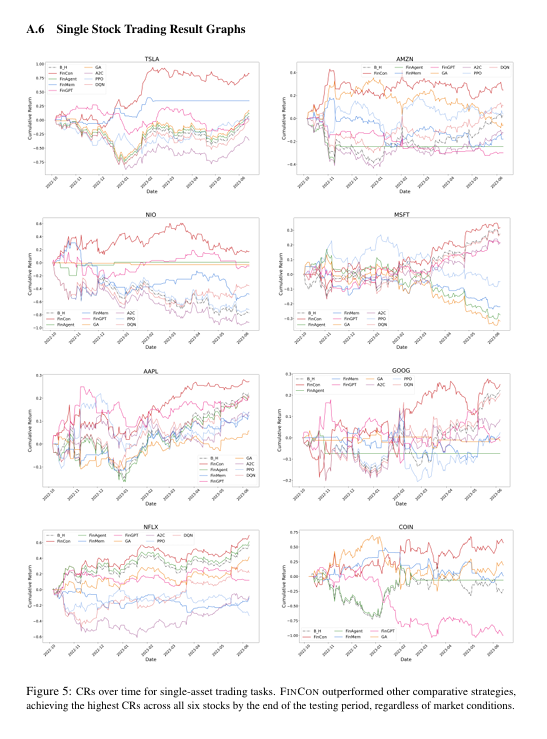